Swaranjana Nayak, 14/11/2021

In [1]:
import glob
import nltk
import spacy
import os
import string
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/dataset')  #don't remove r and give extra space
myFiles = glob.glob('*.txt')
# print(myFiles)  #prints text file names

In [3]:
dict_words={}
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# TOKENIZING THE CORPUS

In [4]:
for filename in myFiles:
    # print(filename)
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word 
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words=list(set(words))
    dict_words[filename]=words
    words=[]
    file.close()

#print(dict_words)

In [5]:
B = pd.read_csv('C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/BlacklistedFile1.csv')
#print(B)

value=B['Index'].tolist()
key=B['Sensitivity'].tolist()

#print(value)
#print(key)

In [6]:
Ref_dict=dict(zip(value,key))
#print(Ref_dict)      #Data Dictionary


# Clustering
less_sensitive=[]
avg_sensitive=[]
high_sensitive=[]

for name, words in dict_words.items():
    max=0
    for x in words:
        if(max==3):
            break
        for value, key in Ref_dict.items():
            if(x==value):
                if(max<key):
                    max=int(key)
                if(max==3):
                    print(name,"has High Senstive data")
                    high_sensitive.append(name)
                    break
    if(max==0):
        print(name,"has No Sensitive data")
    if(max==1):
        print(name,"has Less Sensitive data")
        less_sensitive.append(name)
    if(max==2):
        print(name,"has Average Sensitive data")
        avg_sensitive.append(name)
                
print()
print("CLUSTER LESS-SENSITIVE:",less_sensitive)
print("CLUSTER AVG-SENSITIVE:",avg_sensitive)
print("CLUSTER HIGH-SENSITIVE:",high_sensitive)

001-2015beyondobamanewcongressneed.txt has High Senstive data
002-2015willamericacontinueitsslow.txt has High Senstive data
003-2015willnewcongressgetseriousa.txt has High Senstive data
004-300poundsjobreferenceexploitat.txt has No Sensitive data
005-actorartistphilanthropistmymot.txt has Average Sensitive data
006-afghanistanatcrucialjuncture.txt has High Senstive data
007-afghanistanconferencewonrock.txt has High Senstive data
008-afghanistanreadydrawdown.txt has High Senstive data
009-aftercharliehebdoattackisla.txt has High Senstive data
010-americanevertortureagainlawsci.txt has Average Sensitive data
011-amnesiaimmigrationeuropelesson.txt has Average Sensitive data
012-anotherclimatechangesummitd.txt has High Senstive data
013-anxiousbritainsuccourtvleadere.txt has Average Sensitive data
014-areelectedlnpwithoutcampbellne.txt has Average Sensitive data
015-areyoudrinkingbecauseyourework.txt has High Senstive data
016-argentinadebtcrisiscountryturn.txt has Less Sensitive data
017-

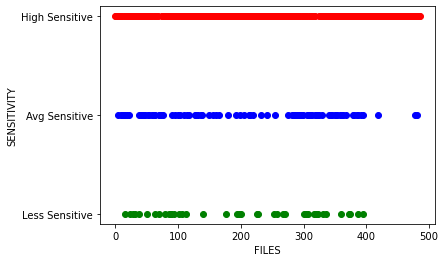

In [7]:
x=[i for i in range(len(myFiles))]
y=[]
for i in x:
    if(myFiles[i] in less_sensitive):
        y.append(1)
    elif(myFiles[i] in avg_sensitive):
        y.append(2)
    elif(myFiles[i] in high_sensitive):
        y.append(3)
    else:
        y.append(None)
plt.yticks([1,2,3],["Less Sensitive","Avg Sensitive","High Sensitive"])
# plt.xticks(rotation=45, ha='right')
plt.ylabel("SENSITIVITY")
plt.xlabel("FILES")
for i in range(0,len(x)):
    if(y[i]==3):
        plt.scatter(x[i],y[i],color="red")
    if(y[i]==2):
        plt.scatter(x[i],y[i],color="blue")
    if(y[i]==1):
        plt.scatter(x[i],y[i],color="green")

## IMPORTING REQUIREMENTS FOR FURTHER STEPS

In [8]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

np.random.seed(500)

# CYBER SECURITY DICTIONARY

In [9]:
# Define dictionary with related to cyber security and digital forensic domains.
all_terms = ['access control', 'anti-virus', 'anti-malware', 'antivirus software', 'apt', 'advanced persistent threat', 'asset', 
            'authentication', 'authorization', 'backing up', 'bcp', 'business continuity planning', 'behavior monitoring',
            'blacklist', 'block cipher', 'botnet', 'bug', 'byod', 'bring your own device', 'ciphertext', 'clickjacking', 'cloud computing',
            'cnd', 'computer network defense', 'cracker', 'critical infrastructure', 'cve', 'common vulnerabilities and exposures',
            'cryptography', 'cyberattack', 'cyber ecosystem', 'cyberespionage', 'cybersecurity', 'cyber teams', 'data breach',
            'data integrity', 'data mining', 'data theft', 'ddos attack', 'distributed denial of service attack', 'decrypt',
            'digital certificate', 'digital forensics', 'dlp', 'data loss prevention', 'dmz', 'demilitarized zone', 'dos',
            'denial of service', 'drive-by download', 'eavesdropping', 'encode', 'encryption key', 'firewall', 'hacker', 'hacktivism',
            'honeypot', 'iaas', 'infrastructure-as-a-service', 'identity cloning', 'identity fraud', 'ids', 'intrusion detection system',
            'information security policy', 'insider threat', 'ips', 'intrusion prevention system', 'isp', 'internet service provider',
            'jboh', 'javascript-binding-over-http', 'keylogger', 'lan', 'local area network', 'link jacking', 'malware', 'malicious software',
            'outsider threat', 'outsourcing', 'owasp', 'open web application security project', 'paas', 'platform-as-a-service',
            'packet sniffing', 'patch', 'patch management', 'payment card skimmers', 'pen testing', 'phishing', 'pki', 'public key infrastructure',
            'pos intrusions', 'point of sale intrusions', 'ransomware', 'restore', 'risk assessment', 'risk management', 'saas',
            'software-as-a-service', 'sandboxing', 'scada', 'supervisory control and data acquisition', 'security control',
            'security perimeter', 'siem', 'security information and event management', 'sniffing', 'social engineering', 'spam',
            'spear phishing', 'spoof', 'spoofing', 'spyware', 'supply chain', 'threat assessment', 'trojan horse', 'trojan',
            'two-factor authentication', 'two-step authentication', 'unauthorized access', 'vpn', 'virtual private network',
            'virus', 'vishing', 'vulnerability', 'whitelist', 'wi-fi', 'worm', 'zombie']

In [10]:
# Performing dictionary look up on the sentences stored in the dataset containing terms defined in our dictionary.
def process_review(review):
    processed_token = []
    for token in review.split():
        token = ''.join(e.lower() for e in token if e.isalnum())
        processed_token.append(token)
    return ' '.join(processed_token)

def find_terms(text):
    terms = []
    review = process_review(text)
    for token in review.split():
          if token in all_terms:
            terms.append(token) 
    return terms

# PREPROCESSING THE CORPUS

In [11]:
# Lemmatizing the File:Token dictionary
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

preproc = {}

for fil,ls in dict_words.items():
    for i in range(len(ls)):
        ls[i] = lemmatizer.lemmatize(ls[i])
    preproc[fil] = ' '.join(ls)

In [12]:
corpus = pd.DataFrame.from_dict(preproc, orient = 'index')
corpus.reset_index(level = 0, inplace = True)
corpus.columns = ['File', 'TokensLemmas']
corpus['LookUpCBS'] = corpus['TokensLemmas'].apply(find_terms)
corpus['Sensitivity'] = y
# df1 = corpus[corpus.isna().any(axis=1)]
# df1
# corpus.dropna(inplace = True)
corpus

File  \
0    001-2015beyondobamanewcongressneed.txt   
1    002-2015willamericacontinueitsslow.txt   
2    003-2015willnewcongressgetseriousa.txt   
3    004-300poundsjobreferenceexploitat.txt   
4    005-actorartistphilanthropistmymot.txt   
..                                      ...   
481                                cs-5.txt   
482                                cs-6.txt   
483                                cs-7.txt   
484                                cs-8.txt   
485                                cs-9.txt   

                                          TokensLemmas  \
0    attitude play selfishness pig stock family vie...   
1    take differently violate name claimed steadfas...   
2    threat finally last recent arm maintain tough ...   
3    bottle seeing economic say person assumption d...   
4    know career laughter knowing example done impa...   
..                                                 ...   
481  properly id luna backported control list appro...   
482  east reveals actor custom matrix convinced cyb...   
483  directive frequent may know ilan example guard...   
484  custom fabricator team uk work science secret ...   
485  actor server may support ticketing retrieve or...   

                                             LookUpCBS  Sensitivity  
0                                                   []          3.0  
1                                                   []          3.0  
2                                              [asset]          3.0  
3                                                   []          NaN  
4                                                   []          2.0  
..                                                 ...          ...  
481  [patch, isp, vulnerability, vulnerability, cve...          2.0  
482                        [cybersecurity, ransomware]          3.0  
483                  [ransomware, hacker, cyberattack]          3.0  
484                                           [hacker]          3.0  
485    [asset, bug, vulnerability, vulnerability, cve]          3.0  

[486 rows x 4 columns]

In [13]:
# for i in range(len(corpus)):
#     if len(corpus.loc[i,'LookUpCBS'])!=0:
#       print(corpus.loc[i,'LookUpCBS'])

In [14]:
def file_type(matches):
    if len(matches) <= 1:
        return 0 # not related to cyber security
    else:
        return 1 # related to cyber security
    
corpus['FileType'] = corpus['LookUpCBS'].apply(file_type)
corpus

File  \
0    001-2015beyondobamanewcongressneed.txt   
1    002-2015willamericacontinueitsslow.txt   
2    003-2015willnewcongressgetseriousa.txt   
3    004-300poundsjobreferenceexploitat.txt   
4    005-actorartistphilanthropistmymot.txt   
..                                      ...   
481                                cs-5.txt   
482                                cs-6.txt   
483                                cs-7.txt   
484                                cs-8.txt   
485                                cs-9.txt   

                                          TokensLemmas  \
0    attitude play selfishness pig stock family vie...   
1    take differently violate name claimed steadfas...   
2    threat finally last recent arm maintain tough ...   
3    bottle seeing economic say person assumption d...   
4    know career laughter knowing example done impa...   
..                                                 ...   
481  properly id luna backported control list appro...   
482  east reveals actor custom matrix convinced cyb...   
483  directive frequent may know ilan example guard...   
484  custom fabricator team uk work science secret ...   
485  actor server may support ticketing retrieve or...   

                                             LookUpCBS  Sensitivity  FileType  
0                                                   []          3.0         0  
1                                                   []          3.0         0  
2                                              [asset]          3.0         0  
3                                                   []          NaN         0  
4                                                   []          2.0         0  
..                                                 ...          ...       ...  
481  [patch, isp, vulnerability, vulnerability, cve...          2.0         1  
482                        [cybersecurity, ransomware]          3.0         1  
483                  [ransomware, hacker, cyberattack]          3.0         1  
484                                           [hacker]          3.0         0  
485    [asset, bug, vulnerability, vulnerability, cve]          3.0         1  

[486 rows x 5 columns]

# SUPPORT VECTOR MACHINE

### SVM USING SENSITIVITY CLUSTER FROM BLACKLISTEDFILE1.CSV

In [15]:
# Train test split and encoding
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus['TokensLemmas'],corpus['Sensitivity'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# TF-IDF Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['TokensLemmas'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  72.6027397260274


### SVM ON FILE TYPE EVALUATED BY DICTIONARY LOOKUP AGAINST KEYWORDS

In [16]:
# Train test split and encoding
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus['TokensLemmas'],corpus['FileType'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# TF-IDF Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['TokensLemmas'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  94.52054794520548


In [17]:
sensitive = pd.DataFrame(columns=['CyberSecurityFile', 'Content', 'Match'])
unsensitive = pd.DataFrame(columns=['NonCyberSecFile', 'Content'])
row_list1 = []
row_list2 = []

for i in range(len(corpus)):
    if len(corpus.loc[i,'LookUpCBS'])>1:
      row_list1.append({'CyberSecurityFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas'],
                       'Match':corpus.loc[i,'LookUpCBS']})
    else:
      row_list2.append({'NonCyberSecFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas']})
sensitive = pd.DataFrame(row_list1)
unsensitive = pd.DataFrame(row_list2)

In [18]:
sensitive.head()

CyberSecurityFile  \
0  034-cameronobamabanencryptionimpro.txt   
1  040-chaplainpunishedforsharinghisf.txt   
2  086-fivereasonswhyeuropeancentralb.txt   
3                                   1.txt   
4                                 103.txt   

                                             Content  \
0  cameron eff underground take finally example t...   
1  commander great handed group north may know pe...   
2  gradually augment may oil voter south lack eur...   
3  generates proceeds team exchange sector cybers...   
4  andor loss oil lack maintain intruder provides...   

                                               Match  
0                            [cybersecurity, hacker]  
1                     [vulnerability, authorization]  
2                                   [asset, restore]  
3  [cybersecurity, ransomware, hacker, blacklist,...  
4  [hacker, cybersecurity, worm, asset, cyberatta...

In [19]:
unsensitive.head()

NonCyberSecFile  \
0  001-2015beyondobamanewcongressneed.txt   
1  002-2015willamericacontinueitsslow.txt   
2  003-2015willnewcongressgetseriousa.txt   
3  004-300poundsjobreferenceexploitat.txt   
4  005-actorartistphilanthropistmymot.txt   

                                             Content  
0  attitude play selfishness pig stock family vie...  
1  take differently violate name claimed steadfas...  
2  threat finally last recent arm maintain tough ...  
3  bottle seeing economic say person assumption d...  
4  know career laughter knowing example done impa...

# PART OF SENTENCE TAGGING AND TAG TREES

In [20]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree,tree2conlltags
from pprint import pprint
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\S K Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [21]:
def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    return sent

In [22]:
sensitive.shape

(174, 3)

In [123]:
# UNCOMMENT AND RUN LATER -- TAKES A LOT OF TIME

for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    sent = preprocess(text)
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent)
    iob_tagged = tree2conlltags(cs)
    # pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
    doc=nlp(text)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    len(doc.ents)
    labels = [x.label_ for x in doc.ents]
    Counter(labels)
    items = [x.text for x in doc.ents]
    print(Counter(items).most_common(3))
    
    sentences = [x for x in doc.sents]
    ttemp = len(sentences) - 1
    displacy.render(nlp(str(sentences[ttemp])),jupyter=True, style='ent')
    displacy.render(nlp(str(sentences[ttemp])), style='dep', jupyter = True, options = {'distance': 120})
    
    [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[ttemp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
    dict([(str(x), x.label_) for x in nlp(str(sentences[ttemp])).ents])
    print([(x, x.ent_iob_, x.ent_type_) for x in sentences[ttemp]])
    file.close()

[('Cameron', 7), ('UK', 5), ('Obama', 5)]


[(Even, 'O', ''), (full, 'O', ''), (government, 'O', ''), (gridlock, 'O', ''), (would, 'O', ''), (be, 'O', ''), (better, 'O', ''), (than, 'O', ''), (that, 'O', ''), (., 'O', '')]
[('Army', 8), ('Lawhorn', 5), ('Georgia', 3)]


[(", 'O', ''), (

, 'O', ''), (I, 'O', ''), (find, 'O', ''), (it, 'O', ''), (both, 'O', ''), (repulsive, 'O', ''), (and, 'O', ''), (heartbreaking, 'O', ''), (to, 'O', ''), (know, 'O', ''), (that, 'O', ''), (we, 'O', ''), (have, 'O', ''), (a, 'O', ''), (military, 'O', ''), (that, 'O', ''), (frowns, 'O', ''), (upon, 'O', ''), (a, 'O', ''), (chaplain, 'O', ''), (using, 'O', ''), (a, 'O', ''), (Bible, 'B', 'WORK_OF_ART'), (to, 'O', ''), (save, 'O', ''), (a, 'O', ''), (soldier, 'O', ''), ('s, 'O', ''), (life, 'O', ''), (., 'O', '')]
[('Fed', 4), ('QE', 4), ('Greece', 4)]


[(In, 'O', ''), (the, 'O', ''), (end, 'O', ''), (,, 'O', ''), (the, 'O', ''), (EU, 'B', 'ORG'), (and, 'O', ''), (ECB, 'O', ''), (lacks, 'O', ''), (what, 'O', ''), (the, 'O', ''), (Fed, 'B', 'ORG'), (enjoys, 'O', ''), (--, 'O', ''), (the, 'O', ''), (punch, 'O', ''), (of, 'O', ''), (a, 'O', ''), (national, 'O', ''), (government, 'O', ''), (that, 'O', ''), (ran, 'O', ''), (large, 'O', ''), (deficits, 'O', ''), (to, 'O', ''), (augment, 'O', ''), (its, 'O', ''), (efforts, 'O', ''), (to, 'O', ''), (pull, 'O', ''), (the, 'O', ''), (U.S, 'B', 'GPE'), ( , 'O', ''), (economy, 'O', ''), (out, 'O', ''), (of, 'O', ''), (recession, 'O', ''), (and, 'O', ''), (national, 'O', ''), (credit, 'O', ''), (,, 'O', ''), (housing, 'O', ''), (and, 'O', ''), (labor, 'O', ''), (markets, 'O', ''), (that, 'O', ''), (made, 'O', ''), (monetary, 'O', ''), (policies, 'O', ''), (--, 'O', ''), (like, 'O', ''), (QE, 'B', 'ORG'), (--, 'O', ''), (reasonably, 'O', ''), (effective, 'O', ''), (., 'O', '')]
[('Robinson', 9), ('

[(

   


 , 'O', '')]
[('IoT', 87), ('IEEE', 14), ('2011', 14)]


[(Auditing, 'O', ''), (
, 'O', ''), (2.3.7, 'B', 'CARDINAL'), (Non, 'O', ''), (-, 'O', ''), (repudiation, 'O', ''), (
, 'O', ''), (2.3.8, 'B', 'CARDINAL'), (Privacy, 'O', ''), (goals, 'O', ''), (
, 'O', ''), (3, 'B', 'CARDINAL'), (Intruders, 'B', 'NORP'), (,, 'O', ''), (Motivations, 'B', 'PERSON'), (and, 'O', ''), (Capabilities, 'O', ''), (
, 'O', ''), (3.1, 'B', 'CARDINAL'), (Purpose, 'B', 'ORG'), (and, 'O', ''), (Motivation, 'O', ''), (of, 'O', ''), (Attack, 'O', ''), (
, 'O', ''), (3.2, 'B', 'CARDINAL'), (Classification, 'B', 'ORG'), (of, 'I', 'ORG'), (Possible, 'I', 'ORG'), (Intruders, 'I', 'ORG'), (
, 'O', ''), (3.2.1, 'O', ''), (Individuals, 'O', ''), (
, 'O', ''), (3.2.2, 'B', 'PRODUCT'), (Organized, 'I', 'PRODUCT'), (groups, 'O', ''), (
, 'O', ''), (3.2.3, 'O', ''), (Intelligence, 'B', 'ORG'), (agency, 'O', ''), (
, 'O', ''), (4, 'B', 'CARDINAL'), (Discussion, 'O', ''), (and, 'O', ''), (Conclusions, 'O', ''), (
, 'O', ''), (4.1, 'B', 'PERCENT'), (Discussion, 'I', 'PERCENT'), (


[(

, 'O', '')]
[('AdSecure', 6), ('US', 2), ('recent weeks', 2)]


[(

, 'O', ''), (RELATED, 'O', ''), (Swiss, 'O', ''), (CERT, 'O', ''), (warns, 'O', ''), (of, 'O', ''), (spear, 'O', ''), (-, 'O', ''), (phishing, 'O', ''), (campaign, 'O', ''), (targeting, 'O', ''), (webmasters, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('EU', 7), ('DDoS', 2), ('Borrell', 2)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Exclusive, 'O', ''), (:, 'O', ''), (Meet, 'O', ''), (the, 'O', ''), (cybersecurity, 'O', ''), (volunteers, 'O', ''), (helping, 'O', ''), (to, 'O', ''), (protect, 'O', ''), (the, 'O', ''), (healthcare, 'O', ''), (industry, 'O', ''), (during, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (outbreak, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('MDM', 5), ('Check Point', 5), ('C&C', 3)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Split, 'O', ''), (opens, 'O', ''), (up, 'O', ''), (in, 'O', ''), (Europe, 'B', 'LOC'), (on, 'O', ''), (privacy, 'O', ''), (control, 'O', ''), (for, 'O', ''), (Covid-19, 'O', ''), (contact, 'O', ''), (-, 'O', ''), (tracing, 'O', ''), (apps, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Banner Health', 5), ('US', 2), ('Arizona', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (LA, 'B', 'GPE'), (respiratory, 'O', ''), (hospital, 'O', ''), (hit, 'O', ''), (by, 'O', ''), (supplier, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Salt', 5), ('Digicert', 2), ('The Daily Swig', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Salt, 'B', 'ORG'), (DevOps, 'I', 'ORG'), (framework, 'O', ''), (shaken, 'O', ''), (by, 'O', ''), (data, 'O', ''), (center, 'O', ''), (server, 'O', ''), (security, 'O', ''), (flaws, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('FPCC', 5), ('Taiwan', 3), ('the same week', 1)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Salt, 'O', ''), (framework, 'O', ''), (security, 'O', ''), (flaws, 'O', ''), (used, 'O', ''), (to, 'O', ''), (attack, 'O', ''), (multiple, 'O', ''), (targets, 'O', ''), (


, 'O', ''), (Charlie, 'B', 'PERSON'), (Osborne, 'I', 'PERSON'), (



, 'O', ''), (@SecurityCharlie, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Unacademy', 6), ('Cyble', 3), ('around 11 million', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Secure, 'O', ''), (communication, 'O', ''), (:, 'O', ''), (Indian, 'B', 'NORP'), (government, 'O', ''), (seeks, 'O', ''), (home, 'O', ''), (-, 'O', ''), (grown, 'O', ''), (Zoom, 'B', 'ORG'), (alternative, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('US', 3), ('Atlas VPN', 3), ('Microsoft', 2)]


[(

, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Exclusive, 'O', ''), (:, 'O', ''), (Nintendo, 'B', 'ORG'), (hacker, 'O', ''), (sentencing, 'O', ''), (postponed, 'O', ''), (due, 'O', ''), (to, 'O', ''), (coronavirus, 'O', ''), (-, 'O', ''), (related, 'O', ''), (court, 'O', ''), (delays, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DDoS', 15), ('Kaspersky', 3), ('2020', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (EU, 'B', 'ORG'), (calls, 'O', ''), (for, 'O', ''), (ceasefire, 'O', ''), (on, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attacks, 'O', ''), (exploiting, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Charlie, 'B', 'PERSON'), (Osborne, 'I', 'PERSON'), (



, 'O', ''), (@SecurityCharlie, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('NTT', 6), ('2019', 3), ('today', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Security, 'O', ''), (software, 'O', ''), (discovery, 'O', ''), (tops, 'O', ''), (latest, 'O', ''), (Mitre, 'B', 'PERSON'), (ATT&CK, 'O', ''), (threat, 'O', ''), (list, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('third', 2), ('zero', 2), ('Gasparis', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Yearn, 'O', ''), (Finance, 'O', ''), (launches, 'O', ''), (bug, 'O', ''), (bounty, 'O', ''), (program, 'O', ''), (with, 'O', ''), (payouts, 'O', ''), (potentially, 'O', ''), (reaching, 'O', ''), ($, 'O', ''), (200k, 'B', 'MONEY'), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('NSW', 6), ('47', 2), ('Australian', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Data, 'O', ''), (breach, 'O', ''), (at, 'O', ''), (Indian, 'B', 'NORP'), (learning, 'O', ''), (platform, 'O', ''), (Unacademy, 'B', 'GPE'), (exposes, 'O', ''), (millions, 'B', 'CARDINAL'), (of, 'O', ''), (user, 'O', ''), (accounts, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Azure AD', 12), ('Mollema', 6), ('Palhière', 5)]


[(Azure, 'O', ''), (environments, 'O', ''), (at, 'O', ''), (risk, 'O', ''), (from, 'O', ''), (on, 'O', ''), (-, 'O', ''), (prem, 'O', ''), (privilege, 'O', ''), (escalation, 'O', ''), (attack, 'O', ''), (


, 'O', ''), (Ben, 'B', 'PERSON'), (Dickson, 'I', 'PERSON'), (



, 'O', ''), (@bendee983, 'B', 'ORG'), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('NAS', 8), ('Huang', 6), ('PHP', 3)]


[(

, 'O', ''), (RELATED, 'O', ''), (BIND, 'O', ''), (9, 'B', 'CARDINAL'), (security, 'O', ''), (releases, 'O', ''), (address, 'O', ''), (two, 'B', 'CARDINAL'), (high, 'O', ''), (severity, 'O', ''), (vulnerabilities, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('US', 2), ('Home Chef', 1), ('eight million', 1)]


[(
, 'O', ''), (INSIGHT, 'O', ''), (Web, 'O', ''), (application, 'O', ''), (attacks, 'O', ''), (rise, 'O', ''), (to, 'O', ''), (account, 'O', ''), (for, 'O', ''), (almost, 'B', 'CARDINAL'), (half, 'I', 'CARDINAL'), (of, 'O', ''), (all, 'O', ''), (data, 'O', ''), (breaches, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('SIM', 20), ('one', 4), ('UK', 4)]


[(The, 'O', ''), (latest, 'O', ''), (government, 'O', ''), (data, 'O', ''), (breaches, 'O', ''), (in, 'O', ''), (2019/2020, 'B', 'DATE'), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ACSC', 3), ('dozens', 1), ('The Australian Cyber Security Centre', 1)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Going, 'O', ''), (deep, 'O', ''), (:, 'O', ''), (How, 'O', ''), (advances, 'O', ''), (in, 'O', ''), (machine, 'O', ''), (learning, 'O', ''), (can, 'O', ''), (improve, 'O', ''), (DDoS, 'B', 'ORG'), (attack, 'O', ''), (detection, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cybereason', 3), ('US', 2), ('Dahan', 2)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Web, 'O', ''), (application, 'O', ''), (attacks, 'O', ''), (rise, 'O', ''), (to, 'O', ''), (account, 'O', ''), (for, 'O', ''), (almost, 'B', 'CARDINAL'), (half, 'I', 'CARDINAL'), (of, 'O', ''), (all, 'O', ''), (data, 'O', ''), (breaches, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('FBI', 10), ('one', 6), ('Bitcoin', 5)]


[(
, 'O', ''), (NPR, 'B', 'ORG'), (thanks, 'O', ''), (our, 'O', ''), (sponsors, 'O', ''), (
, 'O', ''), (Become, 'O', ''), (an, 'O', ''), (NPR, 'B', 'ORG'), (sponsor, 'O', ''), (
, 'O', '')]
[('McAfee', 4), ('between January and April', 2), ('Nigel Hawthorn', 2)]


[(

, 'O', ''), (This, 'O', ''), (story, 'O', ''), (has, 'O', ''), (been, 'O', ''), (updated, 'O', ''), (to, 'O', ''), (add, 'O', ''), (comment, 'O', ''), (from, 'O', ''), (McAfee, 'B', 'ORG'), ('s, 'O', ''), (Nigel, 'B', 'PERSON'), (Hawthorn, 'I', 'PERSON'), (


, 'O', ''), (RECOMMENDED, 'O', ''), (Dark, 'O', ''), (web, 'O', ''), (vendors, 'O', ''), (feel, 'O', ''), (the, 'O', ''), (pinch, 'O', ''), (as, 'O', ''), (coronavirus, 'O', ''), (lockdown, 'O', ''), (restrictions, 'O', ''), (impact, 'O', ''), (underground, 'O', ''), (operations, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Malwarebytes', 3), ('recent m

[(
, 'O', ''), (RELATED, 'O', ''), (Google, 'O', ''), (partners, 'O', ''), (with, 'O', ''), (US, 'B', 'GPE'), (victim, 'O', ''), (support, 'O', ''), (network, 'O', ''), (to, 'O', ''), (fight, 'O', ''), (Covid-19, 'O', ''), (scams, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cloudflare', 8), ('the weekend', 6), ('George Floyd', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Cybercrime, 'O', ''), (report, 'O', ''), (:, 'O', ''), (Malware, 'O', ''), (slingers, 'O', ''), (riding, 'O', ''), (the, 'O', ''), (crest, 'O', ''), (of, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Java', 6), ('JIMAGE', 3), ('Tycoon', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Cloudflare, 'O', ''), (tracks, 'O', ''), (massive, 'O', ''), (spike, 'O', ''), (in, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attacks, 'O', ''), (as, 'O', ''), (protests, 'O', ''), (rage, 'O', ''), (against, 'O', ''), (George, 'B', 'PERSON'), (Floyd, 'I', 'PERSON'), (death, 'O', ''), (


, 'O', ''), (James, 'B', 'PERSON'), (Walker, 'I', 'PERSON'), (



, 'O', ''), (@jameswalk_er, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Maze', 6), ('US', 3), ('first', 3)]


[(
, 'O', ''), (RELATED, 'O', ''), (Tycoon, 'O', ''), (ransomware, 'O', ''), (poses, 'O', ''), (new, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (education, 'O', ''), (,, 'O', ''), (IT, 'O', ''), (organizations, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Life Healthcare', 3), ('South African', 2), ('dozens', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (US, 'B', 'GPE'), (healthcare, 'O', ''), (admin, 'O', ''), (firm, 'O', ''), (admits, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (


, 'O', ''), (James, 'B', 'PERSON'), (Walker, 'I', 'PERSON'), (



, 'O', ''), (@jameswalk_er, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DevOps', 4), ('Brian Fox', 3), ('Apache Maven', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Shodan, 'O', ''), (founder, 'O', ''), (John, 'B', 'PERSON'), (Matherly, 'I', 'PERSON'), (on, 'O', ''), (IoT, 'B', 'ORG'), (security, 'O', ''), (and, 'O', ''), (dual, 'O', ''), (-, 'O', ''), (purpose, 'O', ''), (hacking, 'O', ''), (tools, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cybereason', 6), ('ICS', 4), ('Barak', 3)]


[(Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ML', 6), ('Chen', 6), ('AI', 5)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Going, 'O', ''), (deep, 'O', ''), (:, 'O', ''), (How, 'O', ''), (advances, 'O', ''), (in, 'O', ''), (machine, 'O', ''), (learning, 'O', ''), (can, 'O', ''), (improve, 'O', ''), (DDoS, 'B', 'ORG'), (attack, 'O', ''), (detection, 'O', ''), (


, 'O', ''), (Ben, 'B', 'PERSON'), (Dickson, 'I', 'PERSON'), (



, 'O', ''), (@bendee983, 'B', 'ORG'), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DDoS', 5), ('Neustar', 5), ('DNS', 4)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Adversarial, 'O', ''), (attacks, 'O', ''), (against, 'O', ''), (machine, 'O', ''), (learning, 'O', ''), (systems, 'O', ''), (–, 'O', ''), (everything, 'O', ''), (you, 'O', ''), (need, 'O', ''), (to, 'O', ''), (know, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Amtrak', 3), ('weekly', 2), ('May 29, 2020', 1)]


[(
, 'O', '')]
[('CMA', 14), ('UK', 10), ('The Daily Swig', 6)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Declassified, 'O', ''), (:, 'O', ''), (GCHQ, 'B', 'ORG'), (celebrates, 'O', ''), (100, 'B', 'DATE'), (years, 'I', 'DATE'), (of, 'O', ''), (secrets, 'O', ''), (well, 'O', ''), (kept, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Harris', 4), ('ICT', 3), ('the Australian Capital Territory', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Australian, 'B', 'ORG'), (Cyber, 'I', 'ORG'), (Collaboration, 'I', 'ORG'), (Centre, 'I', 'ORG'), (set, 'O', ''), (to, 'O', ''), (open, 'O', ''), (with, 'O', ''), (focus, 'O', ''), (on, 'O', ''), (security, 'O', ''), (testing, 'O', ''), (,, 'O', ''), (training, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Delhi', 5), ('Kerala Cyber Warriors', 3), ('Indian', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Meet, 'O', ''), (the, 'O', ''), (cybersecurity, 'O', ''), (volunteers, 'O', ''), (helping, 'O', ''), (to, 'O', ''), (protect, 'O', ''), (the, 'O', ''), (healthcare, 'O', ''), (industry, 'O', ''), (during, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (outbreak, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('The Daily Swig', 4), ('UK', 4), ('US', 4)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Tor, 'O', ''), (security, 'O', ''), (:, 'O', ''), (Peeling, 'O', ''), (back, 'O', ''), (the, 'O', ''), (layers, 'O', ''), (of, 'O', ''), (the, 'O', ''), (onion, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('RCE', 4), ('Thursday', 2), ('NCC Group', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Salt, 'O', ''), (framework, 'O', ''), (security, 'O', ''), (flaws, 'O', ''), (used, 'O', ''), (to, 'O', ''), (attack, 'O', ''), (multiple, 'O', ''), (targets, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Firefox Send', 4), ('The Daily Swig', 2), ('one', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Cybercrime, 'O', ''), (report, 'O', ''), (:, 'O', ''), (Malware, 'O', ''), (slingers, 'O', ''), (riding, 'O', ''), (the, 'O', ''), (crest, 'O', ''), (of, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DDoS', 7), ('GGPoker', 4), ('July 20', 3)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Security, 'O', ''), (firms, 'O', ''), (track, 'O', ''), (‘, 'O', ''), (dramatic, 'O', ''), (rise, 'O', ''), (’, 'O', ''), (in, 'O', ''), (DDoS, 'B', 'GPE'), (attacks, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Israel', 7), ('India', 5), ('INCD', 3)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Cloud, 'O', ''), (-, 'O', ''), (based, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attacks, 'O', ''), (flaring, 'O', ''), (up, 'O', ''), (during, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Adif', 4), ('REvil', 4), ('Travelex', 4)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Major, 'O', ''), (Rail, 'B', 'PERSON'), (Europe, 'I', 'PERSON'), (breach, 'O', ''), (lasted, 'O', ''), (three, 'B', 'DATE'), (months, 'I', 'DATE'), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Satoshi', 3), ('one', 2), ('Bachelor', 1)]


[(
, 'O', '')]
[('DUT', 52), ('2020', 52), ('first', 34)]


[(
        
, 'O', '')]
[('4', 19), ('2020', 19), ('Fig', 19)]


[(
        
, 'O', '')]
[('London', 11), ('Scotland', 4), ('Murphy', 3)]


[(And, 'O', ''), (some, 'O', ''), (people, 'O', ''), (need, 'O', ''), (to, 'O', ''), (be, 'O', ''), (prepared, 'O', ''), (to, 'O', ''), (stand, 'O', ''), (up, 'O', ''), (for, 'O', ''), (London, 'B', 'GPE'), (in, 'O', ''), (this, 'O', ''), (important, 'O', ''), (debate, 'O', ''), (., 'O', '')]
[('ICS', 58), ('2020', 26), ('2017', 23)]


[(
        
, 'O', '')]
[('quantum', 35), ('quantum circuit', 33), ('QAA', 32)]


[(
        
, 'O', '')]
[('OSS', 108), ('2020', 60), ('two', 50)]


[(
        
, 'O', '')]
[('ESRFuzzer', 33), ('SOHO', 27), ('two', 27)]


[(
        
, 'O', '')]
[('2019', 26), ('2020', 19), ('EK', 15)]


[(
        
, 'O', '')]
[('2016', 36), ('2017', 31), ('USA', 20)]


[(
        
, 'O', '')]
[('2017', 23), ('VAECGAN', 17), ('2018', 11)]


[(
        
, 'O', '')]
[('OSS', 170), ('Google Scholar', 57), ('2009', 44)]


[(
        
, 'O', '')]
[('Mandia', 6), ('CNBC', 5), ('Colonial Pipeline', 2)]


[(
, 'O', ''), (Data, 'O', ''), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('Google Scholar', 41), ('2014', 17), ('2007', 15)]


[(
        
, 'O', '')]
[('2018', 23), ('two', 21), ('2016', 20)]


[(
        
, 'O', '')]
[('first', 79), ('AES', 53), ('MixColumns', 20)]


[(
        
, 'O', '')]
[('DeepMal', 48), ('2017', 29), ('CNN', 24)]


[(
        
, 'O', '')]
[('GM', 33), ('zero', 27), ('two', 25)]


[(
        
, 'O', '')]
[('2017', 35), ('KCA', 31), ('TKCA', 29)]


[(
        
, 'O', '')]
[('2019', 12), ('CRF', 10), ('Google Scholar', 10)]


[(
        
, 'O', '')]
[('2020', 47), ('2018', 44), ('SWaT', 43)]


[(
        
, 'O', '')]
[('PTP', 99), ('Fig', 31), ('2', 25)]


[(
        
, 'O', '')]
[('2017', 28), ('TRN', 24), ('2018', 22)]


[(
        
, 'O', '')]
[('Poly Network', 2), ('Binance', 2), ('some $600m', 1)]


[(

, 'O', '')]
[('IoT', 186), ('Article\xa0\n    \n                    Google Scholar', 41), ('2018', 33)]


[(
        
, 'O', '')]
[('PL', 128), ('Neutron', 49), ('NMT', 31)]


[(
        
, 'O', '')]
[('IoT', 24), ('128', 15), ('curve25519', 11)]


[(
        
, 'O', '')]
[('SVM', 23), ('2018', 16), ('2017', 14)]


[(
        
, 'O', '')]
[('SWaT', 73), ('WADI', 67), ('Fig', 24)]


[(
        
, 'O', '')]
[('IoT', 42), ('SLVP', 29), ('CAS', 28)]


[(
        
, 'O', '')]
[('GRC', 15), ('IoT', 12), ('Eq', 10)]


[(
        
, 'O', '')]
[('\\mathsf', 43), ('PPT', 42), ('2016', 16)]


[(
        
, 'O', '')]
[('Article\xa0\n    \n                    Google Scholar', 15), ('2019', 13), ('two', 12)]


[(
        
, 'O', '')]
[('2020', 62), ('CSC', 42), ('June 2020', 31)]


[(
        
, 'O', '')]
[('CNBC', 7), ('Colonial', 5), ('Kennedy', 5)]


[(
, 'O', ''), (Data, 'O', ''), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('2018', 25), ('GCNN', 19), ('2019', 17)]


[(
        
, 'O', '')]
[('Springer', 28), ('Agrawal', 22), ('2010', 22)]


[(
        
, 'O', '')]
[('2020', 19), ('2018', 9), ('2014', 8)]


[(
        
, 'O', '')]
[('2019', 22), ('n.d.', 18), ('2016', 15)]


[(
        
, 'O', '')]
[('Google Scholar', 56), ('2013', 16), ('SCADA', 15)]


[(
        
, 'O', '')]
[('IO2BO', 32), ('KINT', 20), ('ELAID', 18)]


[(
        
, 'O', '')]
[('TPU', 108), ('\\mathfrak', 106), ('LightCom', 69)]


[(
        
, 'O', '')]
[('Deep Learning', 102), ('2018', 100), ('2017', 94)]


[(
        
, 'O', '')]
[('2018', 23), ('2016', 18), ('2017', 17)]


[(
        
, 'O', '')]
[('iCloud', 5), ('Paris Hilton', 4), ('Republican', 4)]


[(
, 'O', ''), (In, 'O', ''), (a, 'O', ''), (similar, 'O', ''), (incident, 'O', ''), (in, 'O', ''), (2008, 'B', 'DATE'), (,, 'O', ''), (Chinese, 'B', 'NORP'), (hackers, 'O', ''), (gained, 'O', ''), (access, 'O', ''), (to, 'O', ''), (campaign, 'O', ''), (documents, 'O', ''), (of, 'O', ''), (Obama, 'B', 'GPE'), (and, 'O', ''), (Republican, 'B', 'NORP'), (candidate, 'O', ''), (,, 'O', ''), (John, 'B', 'PERSON'), (McCain, 'I', 'PERSON'), (., 'O', ''), (
, 'O', '')]
[('DNS', 3), ('today', 2), ('JS', 1)]


[(
, 'O', ''), (RELATED, 'O', ''), (Potential, 'O', ''), (remote, 'O', ''), (code, 'O', ''), (execution, 'O', ''), (vulnerability, 'O', ''), (uncovered, 'O', ''), (in, 'O', ''), (Node.js, 'B', 'GPE'), (apps, 'O', ''), (



, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Verkada', 2), ('up to 150,000', 1), ('Jenkins', 1)]


[(Browse, 'O', ''), (our, 'O', ''), (latest, 'O', ''), (issue, 'O', ''), (
, 'O', ''), (View, 'B', 'ORG'), (Magazine, 'I', 'ORG'), (Archive, 'I', 'ORG'), (
, 'O', '')]
[('Francis', 6), ('Rushdie', 6), ('France', 5)]


[(For, 'O', ''), (me, 'O', ''), (,, 'O', ''), (living, 'O', ''), (together, 'O', ''), (,, 'O', ''), (given, 'O', ''), (the, 'O', ''), (originality, 'O', ''), (of, 'O', ''), (our, 'O', ''), (historical, 'O', ''), (moment, 'O', ''), (,, 'O', ''), (involves, 'O', ''), (the, 'O', ''), (construction, 'O', ''), (of, 'O', ''), (overlapping, 'O', ''), (political, 'O', ''), (communities, 'O', ''), (of, 'O', ''), (destiny, 'O', ''), (-, 'O', ''), (from, 'O', ''), (family, 'O', ''), (to, 'O', ''), (world, 'O', ''), (,, 'O', ''), (with, 'O', ''), (a, 'O', ''), (major, 'O', ''), (focus, 'O', ''), (on, 'O', ''), (the, 'O', ''), (national, 'O', ''), (political, 'O', ''), (community, 'O', ''), (combined, 'O', ''), (with, 'O', ''), (a, 'O', ''), (greater, 'O', ''), (effort, 'O', ''), (to, 'O', ''), (establish, 'O', ''), (a, 'O', ''), (global, 'O', ''), (political, 'O', ''), (community, 'O', ''), (so, 'O', ''), (that, 'O', ''), (challenges, 'O', ''), (posed, 'O', ''), (by, 'O', ''), (climate, 'O', ''), 

[(
, 'O', ''), (Data, 'O', ''), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('iCloud', 5), ('Paris Hilton', 4), ('Republican', 4)]


[(
, 'O', ''), (In, 'O', ''), (a, 'O', ''), (similar, 'O', ''), (incident, 'O', ''), (in, 'O', ''), (2008, 'B', 'DATE'), (,, 'O', ''), (Chinese, 'B', 'NORP'), (hackers, 'O', ''), (gained, 'O', ''), (access, 'O', ''), (to, 'O', ''), (campaign, 'O', ''), (documents, 'O', ''), (of, 'O', ''), (Obama, 'B', 'GPE'), (and, 'O', ''), (Republican, 'B', 'NORP'), (candidate, 'O', ''), (,, 'O', ''), (John, 'B', 'PERSON'), (McCain, 'I', 'PERSON'), (., 'O', ''), (
, 'O', '')]
[('EU', 6), ('Russia', 4), ('Russian', 4)]


[( , 'O', ''), (Hybrid, 'O', ''), (warfare, 'O', ''), (is, 'O', ''), (a, 'O', ''), (vast, 'O', ''), (,, 'O', ''), (complex, 'O', ''), (and, 'O', ''), (fast, 'O', ''), (-, 'O', ''), (moving, 'O', ''), (threat, 'O', ''), (–, 'O', ''), (which, 'O', ''), (requires, 'O', ''), (a, 'O', ''), (proportionate, 'O', ''), (response, 'O', ''), (if, 'O', ''), (nations, 'O', ''), (are, 'O', ''), (going, 'O', ''), (to, 'O', ''), (defend, 'O', ''), (themselves, 'O', ''), (against, 'O', ''), (., 'O', '')]
[('US', 5), ('RFJ', 2), ('up to $10 million', 1)]


[(
, 'O', ''), (Advertisement, 'O', ''), (
, 'O', '')]
[('US', 5), ('BBC', 4), ('Taliban', 4)]


[(
, 'O', '')]
[('20 October 2021', 4), ('IFA', 3), ('Defence Science and Technology', 2)]


[(


                    , 'O', ''), (Open, 'O', ''), (Government, 'O', ''), (Licence, 'O', ''), (
                  

, 'O', ''), (All, 'O', ''), (content, 'O', ''), (is, 'O', ''), (available, 'O', ''), (under, 'O', ''), (the, 'B', 'LAW'), (Open, 'I', 'LAW'), (Government, 'I', 'LAW'), (Licence, 'I', 'LAW'), (v3.0, 'I', 'LAW'), (,, 'O', ''), (except, 'O', ''), (where, 'O', ''), (otherwise, 'O', ''), (stated, 'O', ''), (
, 'O', '')]
[('Social Security', 2), ('Thousands', 1), ('New York', 1)]


[(
, 'O', ''), (READ, 'O', ''), (Data, 'O', ''), (breach, 'O', ''), (class, 'O', ''), (actions, 'O', ''), (:, 'O', ''), (US, 'B', 'ORG'), (Supreme, 'I', 'ORG'), (Court, 'I', 'ORG'), (decision, 'O', ''), (may, 'O', ''), (tilt, 'O', ''), (the, 'O', ''), (odds, 'O', ''), (in, 'O', ''), (favor, 'O', ''), (of, 'O', ''), (defendant, 'O', ''), (organizations, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Kalay', 15), ('Mandiant', 11), ('ThroughTek', 10)]


[(
 



, 'O', '')]
[('IP', 5), ('DDoS', 3), ('the University of Maryland', 1)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Research, 'O', ''), (:, 'O', ''), (Hundreds, 'B', 'CARDINAL'), (of, 'O', ''), (high, 'O', ''), (-, 'O', ''), (traffic, 'O', ''), (web, 'O', ''), (domains, 'O', ''), (vulnerable, 'O', ''), (to, 'O', ''), (same, 'O', ''), (-, 'O', ''), (site, 'O', ''), (attacks, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('White Hat', 4), ('Poly Network', 3), ('500,000', 3)]


[(

, 'O', '')]
[('earlier this month', 1), ('Wednesday', 1), ('July 29', 1)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (DDoS, 'B', 'ORG'), (attacks, 'O', ''), (recede, 'O', ''), (as, 'O', ''), (cryptocurrency, 'O', ''), (price, 'O', ''), (drops, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('US', 3), ('CFAA', 2), ('up to $10 million', 1)]


[(Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Mahoney', 5), ('LockBit', 3), ('500', 3)]


[(Attack, 'O', ''), (
, 'O', ''), (Ransomware, 'O', ''), (Group, 'O', ''), (Demanding, 'O', ''), ($, 'O', ''), (50, 'O', ''), (M, 'O', ''), (In, 'O', ''), (Accenture, 'O', ''), (Security, 'O', ''), (Breach, 'O', ''), (:, 'O', ''), (Cyber, 'O', ''), (Firm, 'O', ''), (
, 'O', ''), (The, 'O', ''), (20, 'B', 'CARDINAL'), (Hottest, 'O', ''), (Cybersecurity, 'O', ''), (Products, 'O', ''), (At, 'O', ''), (Black, 'O', ''), (Hat, 'O', ''), (2021, 'B', 'DATE'), (
, 'O', ''), (Microsoft, 'B', 'ORG'), (Releases, 'O', ''), (More, 'O', ''), (Updates, 'O', ''), (For, 'O', ''), (Windows, 'O', ''), (‘, 'O', ''), (PrintNightmare, 'O', ''), (’, 'O', ''), (Vulnerability, 'O', ''), (
, 'O', ''), (Microsoft, 'O', ''), (Discloses, 'O', ''), (Another, 'B', 'ORG'), (Windows, 'I', 'ORG'), (Print, 'I', 'ORG'), (Vulnerability, 'I', 'ORG'), (,, 'O', ''), (Underscoring, 'O', ''), (Cloud, 'O', ''), (Push, 'O', ''), (For, 'O', ''), (MSPs, 'O', ''), (
 

, 'O', '')]
[('India', 3), ('the previous year', 2), ('Instagram

[(Covid-19, 'B', 'ORG'), (has, 'O', ''), (triggered, 'O', ''), (a, 'O', ''), (consumer, 'O', ''), (shift, 'O', ''), (towards, 'O', ''), (branded, 'O', ''), (products, 'O', ''), (as, 'O', ''), ( , 'O', ''), (..., 'O', ''), (
, 'O', ''), (More, 'O', ''), (


, 'O', ''), (Companies, 'O', ''), (



, 'O', ''), (TRENDING, 'O', ''), (TODAY, 'O', ''), (


, 'O', ''), (TRENDING, 'O', ''), (THIS, 'B', 'DATE'), (WEEK, 'I', 'DATE'), (


, 'O', ''), (LATEST, 'B', 'ORG'), (NEWS, 'I', 'ORG'), (


, 'O', ''), (SECTIONS, 'B', 'ORG'), (


, 'O', ''), (GROUP, 'B', 'ORG'), (TOP, 'I', 'ORG'), (TRENDS, 'I', 'ORG'), (


, 'O', ''), (The, 'O', ''), (Hindu, 'B', 'ORG'), (


, 'O', ''), (Sportstar, 'O', ''), (

, 'O', '')]
[('India', 5), ('Afghanistan', 4), ('Black Lotus Labs', 3)]


[(For, 'O', ''), (reprint, 'O', ''), (rights, 'O', ''), (:, 'O', ''), (Syndications, 'O', ''), (Today, 'B', 'DATE'), (
, 'O', '')]
[('MD & CEO', 2), ('Tomorrow', 1), ('today', 1)]


[(In, 'O', ''), (/, 'O', ''), (Connect, 'O', ''), (with, 'O', ''), (:, 'O', ''), (
, 'O', ''), (Will, 'O', ''), (be, 'O', ''), (displayed, 'O', ''), (
, 'O', ''), (Will, 'O', ''), (not, 'O', ''), (be, 'O', ''), (displayed, 'O', ''), (
, 'O', ''), (Will, 'O', ''), (be, 'O', ''), (displayed, 'O', ''), (
, 'O', ''), (Stories, 'O', ''), (you, 'O', ''), (might, 'O', ''), (be, 'O', ''), (interested, 'O', ''), (in, 'O', ''), (
, 'O', '')]
[('Reuters', 4), ('CISA', 2), ('17', 1)]


[(
, 'O', '')]
[('India', 9), ('China', 5), ('Gen Rawat', 4)]


[(Construction, 'O', ''), (of, 'O', ''), (communication, 'O', ''), (towers, 'O', ''), (and, 'O', ''), (electricity, 'O', ''), (infrastructure, 'O', ''), (as, 'O', ''), (well, 'O', ''), (as, 'O', ''), (rail, 'O', ''), (,, 'O', ''), (roads, 'O', ''), (,, 'O', ''), (bridges, 'O', ''), (and, 'O', ''), (tunnels, 'O', ''), (in, 'O', ''), (border, 'O', ''), (states, 'O', ''), (must, 'O', ''), (also, 'O', ''), (be, 'O', ''), (done, 'O', ''), (with, 'O', ''), (specifications, 'O', ''), (that, 'O', ''), (facilitate, 'O', ''), (utilization, 'O', ''), (by, 'O', ''), (the, 'O', ''), (armed, 'O', ''), (forces, 'O', ''), (as, 'O', ''), (well, 'O', ''), (,, 'O', ''), (he, 'O', ''), (said, 'O', ''), (., 'O', '')]
[('Tokio Marine', 3), ('Tim Starks', 1), ('Japan', 1)]


[(
, 'O', '')]
[('Harmon', 5), ('Helix', 4), ('U.S.', 3)]


[(
, 'O', '')]
[('Illinois', 2), ('CDC', 2), ('Zhao', 2)]


[(
, 'O', '')]
[('STARTTLS', 6), ('TLS', 3), ('IMAP', 3)]


[(The, 'O', ''), (exploitation, 'O', ''), (of, 'O', ''), (these, 'O', ''), (vulnerabilities, 'O', ''), (could, 'O', ''), (lead, 'O', ''), (to, 'O', ''), (targeted, 'O', ''), (Man, 'O', ''), (-, 'O', ''), (in, 'O', ''), (-, 'O', ''), (the, 'O', ''), (-, 'O', ''), (Middle, 'O', ''), ((, 'O', ''), (MitM, 'O', ''), (), 'O', ''), (attacks, 'O', ''), (where, 'O', ''), (mailbox, 'O', ''), (content, 'O', ''), (can, 'O', ''), (be, 'O', ''), (forged, 'O', ''), (and, 'O', ''), (credentials, 'O', ''), (could, 'O', ''), (be, 'O', ''), (stolen, 'O', ''), (., 'O', ''), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (What, 'O', ''), (has, 'O', ''), (been, 'O', ''), (revealed, 'O', ''), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (The, 'O', ''), (flaws, 'O', ''), (have, 'O', ''), (been, 'O', ''), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (spotted, 'O', ''), (in, 'O', ''), (multiple, 'O', ''), (STARTTLS, 'B', 'ORG'), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (implementations, 'O', ''), (and, 'O', ''), (detaile

[(
, 'O', '')]
[('Management Resources', 3), ('Waste Management Resources', 2), ('third', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (International, 'O', ''), (cybercrime, 'O', ''), (gang, 'O', ''), (charged, 'O', ''), (with, 'O', ''), (Covid-19, 'O', ''), (business, 'O', ''), (email, 'O', ''), (compromise, 'O', ''), (fraud, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('RBI', 5), ('five', 2), ('The Reserve Bank', 1)]


[(
, 'O', '')]
[('DDoS', 4), ('2020', 4), ('Kaspersky', 2)]


[(
, 'O', '')]
[('US', 5), ('Russia', 4), ('SolarWinds', 3)]


[(
, 'O', ''), (SolarWinds, 'O', ''), (:, 'O', ''), (Why, 'O', ''), (the, 'O', ''), (Sunburst, 'B', 'PERSON'), (hack, 'O', ''), (matters, 'O', ''), (
, 'O', ''), (Russia, 'B', 'GPE'), (hacking, 'O', ''), (claims, 'O', ''), (pose, 'O', ''), (challenge, 'O', ''), (for, 'O', ''), (Biden, 'B', 'ORG'), (
, 'I', 'ORG'), (China, 'I', 'ORG'), (accused, 'O', ''), (of, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attack, 'O', ''), (on, 'O', ''), (Microsoft, 'B', 'ORG'), (
, 'O', ''), (Taliban, 'B', 'ORG'), (', 'O', ''), (carrying, 'O', ''), (out, 'O', ''), (door, 'O', ''), (-, 'O', ''), (to, 'O', ''), (-, 'O', ''), (door, 'O', ''), (manhunt, 'O', ''), (', 'O', ''), (
, 'O', '')]
[('US', 5), ('BBC', 4), ('Taliban', 4)]


[(
, 'O', '')]
[('Reuters', 8), ('Kaseya', 3), ('Friday', 3)]


[(All, 'O', ''), (rights, 'O', ''), (reserved, 'O', ''), (
, 'O', '')]
[('one', 5), ('REvil', 5), ('Colonial Pipeline', 4)]


[(

, 'O', '')]
[('IoT', 11), ('Nicholson', 5), ('Royal Holloway', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (IoT, 'B', 'ORG'), (security, 'O', ''), (:, 'O', ''), (Researchers, 'O', ''), (discover, 'O', ''), (Stem, 'B', 'PERSON'), (Audio, 'I', 'PERSON'), (smart, 'O', ''), (speaker, 'O', ''), (eavesdropping, 'O', ''), (risk, 'O', ''), (


, 'O', ''), (Charlie, 'B', 'PERSON'), (Osborne, 'I', 'PERSON'), (



, 'O', ''), (@SecurityCharlie, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('2021', 4), ('Facebook', 3), ('Scripps Health', 3)]


[(
 , 'O', ''), (Venkatnagaram.com, 'B', 'ORG'), (
, 'O', '')]
[('Mahoney', 5), ('LockBit', 3), ('500', 3)]


[(Attack, 'O', ''), (
, 'O', ''), (Ransomware, 'O', ''), (Group, 'O', ''), (Demanding, 'O', ''), ($, 'O', ''), (50, 'O', ''), (M, 'O', ''), (In, 'O', ''), (Accenture, 'O', ''), (Security, 'O', ''), (Breach, 'O', ''), (:, 'O', ''), (Cyber, 'O', ''), (Firm, 'O', ''), (
, 'O', ''), (The, 'O', ''), (20, 'B', 'CARDINAL'), (Hottest, 'O', ''), (Cybersecurity, 'O', ''), (Products, 'O', ''), (At, 'O', ''), (Black, 'O', ''), (Hat, 'O', ''), (2021, 'B', 'DATE'), (
, 'O', ''), (Microsoft, 'B', 'ORG'), (Releases, 'O', ''), (More, 'O', ''), (Updates, 'O', ''), (For, 'O', ''), (Windows, 'O', ''), (‘, 'O', ''), (PrintNightmare, 'O', ''), (’, 'O', ''), (Vulnerability, 'O', ''), (
, 'O', ''), (Microsoft, 'O', ''), (Discloses, 'O', ''), (Another, 'B', 'ORG'), (Windows, 'I', 'ORG'), (Print, 'I', 'ORG'), (Vulnerability, 'I', 'ORG'), (,, 'O', ''), (Underscoring, 'O', ''), (Cloud, 'O', ''), (Push, 'O', ''), (For, 'O', ''), (MSPs, 'O', ''), (
 

, 'O', '')]
[('Oliver', 11), ('Russian', 3), ('Last Week', 2)]


[(
, 'O', '')]
[('Check Point', 5), ('the last six months', 3), ('US', 3)]


[(
, 'O', ''), (Advertisement, 'O', ''), (
, 'O', '')]
[('US', 5), ('RFJ', 2), ('up to $10 million', 1)]


[(
, 'O', ''), (Advertisement, 'O', ''), (
, 'O', '')]
[('LockBit', 4), ('CNN', 2), ('2020', 2)]


[(
, 'O', '')]
[('Toshiba', 7), ('DarkSide', 4), ('Friday', 3)]


[(
, 'O', ''), (Colonial, 'O', ''), (Pipeline, 'O', ''), (Hacked, 'O', ''), (:, 'O', ''), (CEO, 'O', ''), (Blount, 'B', 'ORG'), (Confirms, 'I', 'ORG'), (Company, 'I', 'ORG'), (Paid, 'I', 'ORG'), ($, 'B', 'MONEY'), (4.4, 'I', 'MONEY'), (Million, 'I', 'MONEY'), (in, 'O', ''), (Ransom, 'B', 'ORG'), (to, 'O', ''), (Hackers, 'B', 'ORG'), (
, 'I', 'ORG'), (Hacker, 'I', 'ORG'), (Group, 'I', 'ORG'), (DarkSide, 'I', 'ORG'), (Suspected, 'I', 'ORG'), (of, 'I', 'ORG'), (Carrying, 'B', 'PERSON'), (Cyber, 'I', 'PERSON'), (Attack, 'I', 'PERSON'), (on, 'O', ''), (Top, 'O', ''), (US, 'O', ''), (Pipeline, 'O', ''), (Operator, 'O', ''), (Colonial, 'O', ''), (
, 'O', ''), (Read, 'O', ''), (all, 'O', ''), (the, 'B', 'ORG'), (Latest, 'I', 'ORG'), (News, 'I', 'ORG'), (,, 'O', ''), (Breaking, 'B', 'ORG'), (News, 'I', 'ORG'), (and, 'O', ''), (Coronavirus, 'B', 'ORG'), (News, 'I', 'ORG'), (here, 'O', ''), (
, 'O', '')]
[('India', 4), ('WannaCry', 2), ('the weekend', 2)]


[(

, 'O', '')]
[('WannaCry', 9), ('North Korean', 5), ('North Korea', 5)]


[(

, 'O', ''), ((, 'O', ''), (With, 'O', ''), (PTI, 'O', ''), (inputs, 'O', ''), (), 'O', ''), (
, 'O', '')]
[('Memorial Health System', 5), ('Scott Cantley', 2), ('Amy Phelps', 2)]


[(
, 'O', ''), (Today, 'B', 'DATE'), ('s, 'O', ''), (breaking, 'O', ''), (news, 'O', ''), (and, 'O', ''), (more, 'O', ''), (in, 'O', ''), (your, 'O', ''), (inbox, 'O', ''), (

, 'O', ''), (Copyright, 'O', ''), (©, 'O', ''), (Marietta, 'O', ''), (Times, 'O', ''), (|, 'O', ''), (https://www.mariettatimes.com, 'O', ''), (|, 'O', ''), (700, 'B', 'CARDINAL'), (Channel, 'B', 'ORG'), (Lane, 'I', 'ORG'), (,, 'O', ''), (Marietta, 'B', 'GPE'), (,, 'O', ''), (OH, 'B', 'DATE'), (45750, 'I', 'DATE'), (|, 'O', ''), (740, 'B', 'PRODUCT'), (-, 'I', 'PRODUCT'), (373, 'I', 'PRODUCT'), (-, 'I', 'PRODUCT'), (2121, 'I', 'PRODUCT'), (|, 'O', ''), (Ogden, 'O', ''), (Newspapers, 'O', ''), (|, 'O', ''), (The, 'O', ''), (Nutting, 'O', ''), (Company, 'O', ''), (
, 'O', '')]
[('Manchester United', 3), ('last week', 1), ('United FC', 1)]


[(
, 'O', '')]
[('first', 6), ('zero-days', 4), ('one', 3)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Finders, 'B', 'PERSON'), (,, 'O', ''), (cheaters, 'O', ''), (:, 'O', ''), (RCE, 'O', ''), (bug, 'O', ''), (in, 'O', ''), (Moodle, 'B', 'GPE'), (e, 'O', ''), (-, 'O', ''), (learning, 'O', ''), (platform, 'O', ''), (could, 'O', ''), (be, 'O', ''), (abused, 'O', ''), (to, 'O', ''), (steal, 'O', ''), (data, 'O', ''), (,, 'O', ''), (manipulate, 'O', ''), (results, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Ransom', 4), ('fifth', 2), ('more than 600,000', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Multiple, 'O', ''), (encryption, 'O', ''), (flaws, 'O', ''), (uncovered, 'O', ''), (in, 'O', ''), (Telegram, 'B', 'GPE'), (messaging, 'O', ''), (protocol, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Eurojust', 4), ('Interpol', 4), ('Amazon', 2)]


[(Cybercops, 'O', ''), (nab, 'O', ''), (Moroccan, 'B', 'NORP'), (phish, 'O', ''), (-, 'O', ''), (and, 'O', ''), (-, 'O', ''), (carding, 'O', ''), (kingpin, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Filesec.io', 3), ('The Daily Swig', 1), ('74', 1)]


[(Cybercops, 'O', ''), (nab, 'O', ''), (Moroccan, 'B', 'NORP'), (phish, 'O', ''), (-, 'O', ''), (and, 'O', ''), (-, 'O', ''), (carding, 'O', ''), (kingpin, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('EU', 3), ('The European Union', 1), ('the European Commission', 1)]


[(
, 'O', ''), (DON’T, 'O', ''), (FORGET, 'O', ''), (TO, 'O', ''), (READ, 'O', ''), (European, 'O', ''), (Commission, 'O', ''), (to, 'O', ''), (hold, 'O', ''), (‘, 'O', ''), (hackathon, 'O', ''), (’, 'O', ''), (in, 'O', ''), (bid, 'O', ''), (to, 'O', ''), (secure, 'O', ''), (data, 'O', ''), (sharing, 'O', ''), (across, 'O', ''), (EU, 'B', 'ORG'), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('HSE', 6), ('The Health Service Executive', 1), ('Health Service Executive', 1)]


[(Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('I4.0', 75), ('2015', 52), ('SME', 50)]


[(
        
, 'O', '')]
[('Rapid7', 5), ('FortiWeb', 2), ('SAML', 2)]


[(
, 'O', '')]
[('Iso-UniK', 73), ('MPK', 38), ('Nginx', 21)]


[(
        
, 'O', '')]
[('2017', 22), ('2014', 20), ('2018', 19)]


[(
        
, 'O', '')]
[('2018', 30), ('2016', 28), ('Collberg et al.', 17)]


[(
        
, 'O', '')]
[('2016', 30), ('2015', 24), ('Google Scholar', 22)]


[(
        
, 'O', '')]
[('2016', 32), ('2015', 29), ('2017', 29)]


[(
        
, 'O', '')]
[('DGA', 103), ('CNN', 32), ('2016', 18)]


[(
        
, 'O', '')]
[('GPU', 59), ('AES', 59), ('EM', 37)]


[(
        
, 'O', '')]
[('SGX', 84), ('2016', 49), ('2015', 45)]


[(
        
, 'O', '')]
[('NLP', 11), ('AI', 7), ('CyberStrong', 4)]


[(
, 'O', '')]
[('KDD', 3), ('zero-day', 3), ('Windows', 2)]


[(
, 'O', '')]
[('2.0', 4), ('South', 3), ('Central Asia', 3)]


[(However, 'O', ''), (,, 'O', ''), (since, 'O', ''), (most, 'O', ''), (of, 'O', ''), (the, 'O', ''), (attacks, 'O', ''), (rely, 'O', ''), (on, 'O', ''), (phishing, 'O', ''), (emails, 'O', ''), (as, 'O', ''), (a, 'O', ''), (part, 'O', ''), (of, 'O', ''), (the, 'O', ''), (initial, 'O', ''), (infection, 'O', ''), (vector, 'O', ''), (,, 'O', ''), (organizations, 'O', ''), (should, 'O', ''), (take, 'O', ''), (proactive, 'O', ''), (measures, 'O', ''), (in, 'O', ''), (detecting, 'O', ''), (such, 'O', ''), (emails, 'O', '')]
[('ML', 19), ('KDD', 18), ('DARPA', 14)]


[(
, 'O', '')]
[('Google Scholar', 84), ('AI', 36), ('NLP', 24)]


[(
, 'O', '')]
[('AI', 19), ('One', 2), ('AiThority - Artificial Intelligence', 1)]


[(


, 'O', '')]
[('AI', 15), ('IBM', 6), ('Watson', 3)]


[(
 , 'O', ''), (Read, 'O', ''), (the, 'O', ''), (case, 'O', ''), (study, 'O', ''), (

, 'O', ''), (Sogeti, 'B', 'PERSON'), (Luxembourg, 'I', 'PERSON'), (and, 'O', ''), (IBM, 'B', 'ORG'), (developed, 'O', ''), (an, 'O', ''), (alliance, 'O', ''), (to, 'O', ''), (provide, 'O', ''), (companies, 'O', ''), (with, 'O', ''), (a, 'O', ''), (security, 'O', ''), (operations, 'O', ''), (center, 'O', ''), ((, 'O', ''), (SOC, 'B', 'ORG'), (), 'O', ''), (that, 'O', ''), (could, 'O', ''), (uncover, 'O', ''), (advanced, 'O', ''), (persistent, 'O', ''), (threats, 'O', ''), (50, 'B', 'PERCENT'), (percent, 'I', 'PERCENT'), (faster, 'O', ''), (., 'O', ''), (


, 'O', '')]
[('AI', 8), ('China', 2), ('1Central', 1)]


[(
, 'O', '')]
[('healthcare', 1), ('payday', 1), ('hundreds of thousands', 1)]


[(And, 'O', ''), (they, 'O', ''), (are, 'O', ''), (not, 'O', ''), (just, 'O', ''), (a, 'O', ''), (significant, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (business, 'O', ''), (continuity, 'O', ''), (either, 'O', ''), (—, 'O', ''), (they, 'O', ''), (are, 'O', ''), (a, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (society, 'O', ''), (as, 'O', ''), (a, 'O', ''), (whole, 'O', '')]
[('Pakistan', 9), ('FBR', 7), ('Hackread.com', 4)]


[(For, 'O', ''), (instance, 'O', ''), (,, 'O', ''), (in, 'O', ''), (2019, 'B', 'DATE'), (,, 'O', ''), (the, 'O', ''), (official, 'O', ''), (passport, 'O', ''), (application, 'O', ''), (tracking, 'O', ''), (website, 'O', ''), (of, 'O', ''), (Pakistan, 'B', 'GPE'), (was, 'O', ''), (compromised, 'O', ''), (in, 'O', ''), (a, 'O', ''), (sophisticated, 'O', ''), (water, 'O', ''), (hole, 'O', ''), (attack, 'O', ''), (., 'O', '')]
[('third', 17), ('U.S.', 3), ('88%', 2)]


[(It, 'O', ''), (’s, 'O', ''), (time, 'O', ''), (organizations, 'O', ''), (and, 'O', ''), (the, 'O', ''), (government, 'O', ''), (take, 'O', ''), (action, 'O', ''), (before, 'O', ''), (they, 'O', ''), (’re, 'O', ''), (affected, 'O', ''), (by, 'O', ''), (the, 'O', ''), (hard, 'O', ''), (and, 'O', ''), (soft, 'O', ''), (costs, 'O', ''), (of, 'O', ''), (reputational, 'O', ''), (damage, 'O', ''), (., 'O', '')]
[('Maine', 6), ('Bruenjes', 5), ('SCADA', 5)]


[(“, 'O', ''), (Then, 'O', ''), (it, 'O', ''), (happened, 'O', ''), (here, 'O', ''), (., 'O', ''), (”, 'O', '')]
[('Motherboard', 3), ('Sunday', 2), ('more than 100 million', 1)]


[(Meanwhile, 'O', ''), (,, 'O', ''), (in, 'O', ''), (December, 'B', 'DATE'), (2020, 'I', 'DATE'), (,, 'O', ''), (the, 'O', ''), (company, 'O', ''), (revealed, 'O', ''), (it, 'O', ''), (had, 'O', ''), (suffered, 'O', ''), (a, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (that, 'O', ''), (exposed, 'O', ''), (its, 'O', ''), (customers, 'O', ''), (’, 'O', ''), (proprietary, 'O', ''), (network, 'O', ''), (information, 'O', ''), (., 'O', '')]
[('CAPTCHA', 10), ('42', 3), ('one', 2)]


[(CAPTCHA, 'O', ''), (identifiers, 'O', ''), (are, 'O', ''), (one, 'B', 'CARDINAL'), (great, 'O', ''), (example, 'O', ''), (of, 'O', ''), (such, 'O', ''), (detection, 'O', ''), (by, 'O', ''), (association, 'O', '')]
[('Iranian', 8), ('Iran', 7), ('Indra', 3)]


[(It, 'O', ''), (moves, 'O', ''), (wiper, 'O', ''), (-, 'O', ''), (related, 'O', ''), (files, 'O', ''), (to, 'O', ''), (“, 'O', ''), (C:\temp, 'O', ''), (”, 'O', ''), (and, 'O', ''), (creates, 'O', ''), (a, 'O', ''), (scheduled, 'O', ''), (task, 'O', ''), (named, 'O', ''), (mstask, 'O', ''), (to, 'O', ''), (execute, 'O', ''), (the, 'O', ''), (wiper, 'O', ''), (only, 'O', ''), (once, 'O', ''), (at, 'O', ''), (23:55:00, 'B', 'TIME'), (., 'O', '')]
[('Robinson', 9), ('Elliptic', 3), ('one', 2)]


[(Robinson, 'B', 'PERSON'), (attributes, 'O', ''), (that, 'O', ''), (to, 'O', ''), (their, 'O', ''), (inability, 'O', ''), (to, 'O', ''), (launder, 'O', ''), (and, 'O', ''), (cash, 'O', ''), (out, 'O', ''), (such, 'O', ''), (a, 'O', ''), (large, 'O', ''), (sum, 'O', ''), (of, 'O', ''), (cryptocurrency, 'O', ''), (., 'O', '')]
[('1Password', 7), ('Trickbot', 3), ('The DFIR Report', 2)]


[(

, 'O', ''), (Currently, 'O', ''), (,, 'O', ''), (cybersecurity, 'O', ''), (researchers, 'O', ''), (should, 'O', ''), (read, 'O', ''), (up, 'O', ''), (the, 'O', ''), (technicalities, 'O', ''), (to, 'O', ''), (ensure, 'O', ''), (their, 'O', ''), (client, 'O', ''), (systems, 'O', ''), (are, 'O', ''), (secure, 'O', ''), (against, 'O', ''), (these, 'O', ''), (techniques, 'O', ''), (as, 'O', ''), (the, 'O', ''), (group, 'O', ''), (may, 'O', ''), (re, 'O', ''), (-, 'O', ''), (launch, 'O', ''), (an, 'O', ''), (attack, 'O', ''), (again, 'O', ''), (on, 'O', ''), (other, 'O', ''), (systems, 'O', ''), (., 'O', '')]
[('Pearson', 12), ('SEC', 5), ('today', 2)]


[(", 'O', ''), (

, 'O', ''), (According, 'O', ''), (to, 'O', ''), (SEC, 'B', 'ORG'), ('s, 'O', ''), (press, 'O', ''), (release, 'O', ''), (,, 'O', ''), (Pearson, 'B', 'ORG'), (also, 'O', ''), (said, 'O', ''), (it, 'O', ''), (had, 'O', ''), (", 'O', ''), (strict, 'O', ''), (protections, 'O', ''), (", 'O', ''), (to, 'O', ''), (defend, 'O', ''), (its, 'O', ''), (customers, 'O', ''), (', 'O', ''), (data, 'O', ''), (even, 'O', ''), (though, 'O', ''), (the, 'O', ''), (education, 'O', ''), (giant, 'O', ''), (failed, 'O', ''), (to, 'O', ''), (patch, 'O', ''), (the, 'O', ''), (critical, 'O', ''), (vulnerability, 'O', ''), (that, 'O', ''), (led, 'O', ''), (to, 'O', ''), (the, 'O', ''), (breach, 'O', ''), (at, 'B', 'DATE'), (least, 'I', 'DATE'), (six, 'I', 'DATE'), (months, 'I', 'DATE'), (after, 'O', ''), (being, 'O', ''), (alerted, 'O', ''), (that, 'O', ''), (a, 'O', ''), (AIMSweb1.0, 'B', 'GPE'), (security, 'O', ''), (update, 'O', ''), (is, 'O', ''), (available, 'O', ''), (., 'O', '')]
[('2FA'

[(

, 'O', ''), (Essentially, 'O', ''), (,, 'O', ''), (these, 'O', ''), (methods, 'O', ''), (need, 'O', ''), (to, 'O', ''), (go, 'O', ''), (beyond, 'O', ''), (2FA, 'O', ''), (and, 'O', ''), (towards, 'O', ''), (a, 'O', ''), (multi, 'O', ''), (-, 'O', ''), (factor, 'O', ''), (authentication, 'O', ''), (environment, 'O', ''), (,, 'O', ''), (where, 'O', ''), (multiple, 'O', ''), (methods, 'O', ''), (of, 'O', ''), (authentication, 'O', ''), (are, 'O', ''), (simultaneously, 'O', ''), (deployed, 'O', ''), (and, 'O', ''), (combined, 'O', ''), (as, 'O', ''), (needed, 'O', ''), (., 'O', '')]
[('Realtek', 4), ('SDK', 3), ('IoT', 2)]


[(

, 'O', ''), (Affected, 'O', ''), (versions, 'O', ''), (
, 'O', ''), (More, 'O', ''), (details, 'O', ''), (are, 'O', ''), (available, 'O', ''), (in, 'O', ''), (the, 'O', ''), (Realtek, 'B', 'PERSON'), (advisory, 'O', ''), (,, 'O', ''), (which, 'O', ''), (lists, 'O', ''), (these, 'O', ''), (versions, 'O', ''), (:, 'O', ''), (

, 'O', ''), (rtl819x, 'B', 'ORG'), (-, 'I', 'ORG'), (SDK, 'I', 'ORG'), (-, 'I', 'ORG'), (v3.2.x, 'I', 'ORG'), (Series, 'I', 'ORG'), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (SDK, 'O', ''), (-, 'O', ''), (v3.4.x, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (SDK, 'O', ''), (-, 'O', ''), (v3.4, 'O', ''), (T, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (SDK, 'O', ''), (-, 'O', ''), (v3.4T, 'O', ''), (-, 'O', ''), (CT, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (eCos, 'O', ''), (-, 'O', ''), (v1.5.x, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (Fixed, 'O', ''), 

[(", 'O', ''), (

, 'O', ''), (The, 'O', ''), (notorious, 'O', ''), (DarkSide, 'B', 'PRODUCT'), (ransomware, 'O', ''), (gang, 'O', ''), (,, 'O', ''), (now, 'O', ''), (rebranded, 'O', ''), (as, 'O', ''), (BlackMatter, 'B', 'ORG'), (,, 'O', ''), (is, 'O', ''), (actively, 'O', ''), (attacking, 'O', ''), (corporate, 'O', ''), (entities, 'O', ''), (but, 'O', ''), (says, 'O', ''), (it, 'O', ''), (wo, 'O', ''), (n't, 'O', ''), (target, 'O', ''), (the, 'B', 'LAW'), (", 'I', 'LAW'), (Oil, 'I', 'LAW'), (and, 'I', 'LAW'), (Gas, 'I', 'LAW'), (industry, 'O', ''), ((, 'O', ''), (pipelines, 'O', ''), (,, 'O', ''), (oil, 'O', ''), (refineries, 'O', ''), (), 'O', ''), (,, 'O', ''), (", 'O', ''), (which, 'O', ''), (previously, 'O', ''), (attracted, 'O', ''), (much, 'O', ''), (-, 'O', ''), (unwanted, 'O', ''), (attention, 'O', ''), (and, 'O', ''), (forced, 'O', ''), (them, 'O', ''), (to, 'O', ''), (rebrand, 'O', ''), (., 'O', '')]
[('Israel', 7), ('Bar Ilan University', 2), ('Chinese', 2)]


[(  

, 'O', ''), (Earlier, 'B', 'DATE'), (this, 'I', 'DATE'), (year, 'I', 'DATE'), (,, 'O', ''), (it, 'O', ''), (was, 'O', ''), (revealed, 'O', ''), (that, 'O', ''), (the, 'O', ''), (BadBlood, 'B', 'ORG'), (hacking, 'O', ''), (group, 'O', ''), (,, 'O', ''), (considered, 'O', ''), (a, 'O', ''), (proxy, 'O', ''), (for, 'O', ''), (Iran, 'B', 'EVENT'), (’s, 'I', 'EVENT'), (Revolutionary, 'B', 'ORG'), (Guards, 'I', 'ORG'), (,, 'O', ''), (targeted, 'O', ''), (specialists, 'O', ''), (in, 'O', ''), (genetics, 'O', ''), (,, 'O', ''), (neurology, 'O', ''), (and, 'O', ''), (oncology, 'O', ''), (as, 'O', ''), (well, 'O', ''), (as, 'O', ''), (others, 'O', ''), (in, 'O', ''), (over, 'O', ''), (20, 'B', 'CARDINAL'), (medical, 'O', ''), (professionals, 'O', ''), (in, 'O', ''), (Israel, 'B', 'GPE'), (and, 'O', ''), (the, 'B', 'GPE'), (United, 'I', 'GPE'), (States, 'I', 'GPE'), (., 'O', '')]
[('Ford', 15), ('HackerOne', 7), ('BleepingComputer', 4)]


[(

, 'O', ''), (BleepingComputer, 'O', ''), (reached, 'O', ''), (out, 'O', ''), (to, 'O', ''), (Ford, 'B', 'ORG'), (multiple, 'O', ''), (times, 'O', ''), (well, 'O', ''), (in, 'O', ''), (advance, 'O', ''), (of, 'O', ''), (publishing, 'O', ''), (but, 'O', ''), (we, 'O', ''), (did, 'O', ''), (not, 'O', ''), (hear, 'O', ''), (back, 'O', ''), (., 'O', '')]


# ENTITY TAGGER - NER MODEL

In [24]:
for sentence in sensitive['Content']:
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)

Sentence is:  cameron eff underground take finally example think prime problem risk solving various harsher really administration part annual law twostate washington invasive par assbackwards nightmare minister incident know certain mundane activist come criminalize lead central justice reach prankster illiterate actually data statute god american china exact target start solution protect u document house alternative email year attack authoritarian report unreleased plan obtained offered penalty aaron state whatsapp passed going company crazy back scary russia antiencryption abused cybersecurity obama north secret say siphon saying month thinlyveiled technology password new website notorious government korean proven incredibly president close court likely jim ridiculed ban information practice vital discus snowden economically user many plus labeling legal fully private jail government proposal push white better perfect making aware display movement approach guess department sometimes 

Sentence is:  commander great handed group north may know person say preferred simply held thanksgiving pretty last national right bottom session dealing based filed year area telling side explained took solution handle concern struggle lawful line biblical ordered used matter troop impossible wear line everything conducting letter attorney course discussion comment bible close hand nonreligious save office place point happened case fact soldier association complaint law need republican change system workshop testimony information leading soldier post institute courage tell condemn first endorsing discus warned along handout validity proselytizing conversation thought click exactly berry discussed religious combat exploited accuse someone singled cited atheist graham punishment airborne wellness wrote said amount facebook brigade method col quoting order avoid consider policy agrees version representing dealt preacher religion provided complained lead benning prohibit wrong congressman

Sentence is:  gradually augment may oil voter south lack euroimposed face end encourage reprice pan national interest state enjoyed aim northern asset issue new reform increase bank fragmented consequently effect increased sell european bond borrowing government mediterranean undercut line america place build greek printing ecb debt best seems create mac establish direction nt structural institution enjoys rebounded business high eurodenominated value continental basket first iowa construction along job euro crisis fiscal spain significantly competing currency print absence announced common eurozone home give market attractive many largest financed germany policy punch fed reasonably boost capital wo corporate unlikely highly inject central federal moribund across intended government growth program directly lever homebuyers push united money bank bond price lower unemployment federallysponsored mortgage austerity expand need policy individual induce hovering quantitative work attract a

Sentence is:  generates proceeds team exchange sector cybersecurity may ended task identified monero million receives launched mainstreet network launch news process service individual darknet password technology cyber cofounder return returned webinar known therefore contains used whenever twice incognito address significant attacker risk antinalysis year regulated research say likely consumer belief associated elliptic returning fellow joining every potentially poor coming tracing public sum medium narcotic law link surprising wallet track worked reflects value first inability checked prof cost service week according deposit range depositing entity token presence asked currency activity mirror ransomware market payment customer enabling online cash cybercriminals limited check taking allows stolen vendor launderer version commercially specializing anonymous bitcoin period address method gang commonly money developed web data need available electronics called provider legitimate help 

Sentence is:  andor loss oil lack maintain intruder provides padmavathi prime worldwide krco interface hall various typically today wireless facilitate ip greatly switch multiple slightly green selling phone cautious lead rajeev growth figure familiar relatively connection data fixed handling society useless evaluation project specifying lopez university u thoma modern large international hacker ansari lack limiting suitable humidity remainder defense understand reason cryptographic cha digital motivation million attack country product answer sensor offered powerenergy mechanism cewit quite measurement intrusion ie technique trustcom state ad motivation soa education well website computing financial within nuclear intercept functionality tamperproof ictc experience scale include remain determine object hereby east cybersecurity dynamic actuate z euro recompense social impact technology password publishing malaysia greater korean domain enable scenario trust critical create sikkerhet in

Sentence is:  cybersecurity may colossal fewer know secret rare oil preferred monero million request demand member stop responsible national coop paid universal criticised service impact ciaran pipeline cyber new based regulatory provides darkside return practical known lab beaten twitter determined greater everything programme plug dental smaller sprint original say getting skilled best associated elliptic file observed surprise coming today persistent medium system public part victor remains spite nt month chain system institute martin number yes practice hardertotrace sophistication shutting expert unfortunately easy lisa deputy service zealand according ransom west unknown disclosure doorway masterkey library currency negotiate group announced ransomware payment said dollar hit race demanded global case private security cyberdefenders headache corporate believed prof centre around swedish stressful gevers justice bitcoin weird gang targeted decryptor two money friday victim web att

Sentence is:  easier actor italian uk cybersecurity threat related peak webmaster particularly example last recent mechanism national stepped worthless health service type pandemic logged cyber advisory mobile tainted adtech website known clicking autodownload burp riddled storm nonexistent delivers incorrect hard campaign logo research getting office place leveraged malwarebytes warns malvertising case system written spoofed scareware month login working exploit lockdown swig multiple crisis according double ltd user promote home march spokesperson banner many hit online order google avoid global security offer generating mark centre around ongoing lead basis credential another victim annoying adware available perfect came period machine portswigger april accompanying malicious adsecure scared bad firm one fake scam cynical aimed daily play popup hoping baseline found sling attempt guidance dodgy spearphishing jleyden u text worker average compromised consumer customer grammatically m

Sentence is:  group simply request recent face representative pandemic cyber myriad risk conducting respond surface comment perpetrator lure try high business value fell included crisis exploited singled stayathome spokesperson engineering among policy ceasefire employer intsights growth targeted actually unemployment egregious stood shadow exclusive relief managing must protect u entire international ad understand way prospect homebased official potential fight universally exploiting attributed digital decreased attack immediately country report life began shared advertising campaign unease coronavirus attack financial commission insurance company workforce volunteer insight highranking suspension moral technical cybersecurity usual motivated related heart particularly destabilising granting deter saying state health social added sharply speculated operate threat government distressed critical model number migration lockdown swig emsisoft cybercrooks significantly march said cure glob

Sentence is:  latter team sm cybersecurity threat emerging applied mdm prominent android network news feature added command new mobile explained banking reason application reset offer burp used operate existence attacker twitter protection normally seen campaign open ondevice heel setting ons point becomes widespread part manager extremely endpoint communicate business post ip meaning confirmed updating first access multiple privacy according subscription might laterally blog main ltd lacked eight payload many said customer tempting wouldbe google underscore comprises applying security check corporate factory expunge configuration central address authenticator credential need data policy gaining portswigger control keystroke april arguably infection blocked work file device entry trojan concluded firm exercise distinguishing target protected theorized stole vector given managing found communication ability application onp way capability compromised single customer entire account maas p

Sentence is:  fund server respiratory may related organization million last appropriate end physician feb la social health service hospital added agreement filed resolve individual facility website alleged conducted previously burp used attacker six risk variety plaintiff party lawsuit patient twoweek court number best failed place settlement free proposed arising month settlement system information reimbursement visited blue access swig investigation week supplier ltd banner august payment said largest hit continue security wwwbhsettlementcom claim processing pay around posture federal across per expense fraud cross incurred two exfiltrating diligently victim beverage data personal monitoring period history arizona outlet final started portswigger learn regular provide card work involving including concluded one theft notified food notify improvement daily signed credit healthcare breach date u document july compromised customer settled put washingtonbased likelihood put district stat

Sentence is:  server cybersecurity may related identified towards vendor build last recent network attacker framework affecting saltstack went added pandemic advisory mobile explained provides important previously prime lab abusing used burp attacker reiterated variety comment detected neither failed released assault critical public system manager master system check several post working exploit access reaction swig github week range blog increase exploited paired main ltd asked expect cloudbased tenable rody said lengthy log applying security open case unauthenticated withhold infrastructure go deployment configuration operating vulnerable become combination mine ghost targeted poc data hardened posted monitoring making portswigger exploitable control succession yesterday environment scan project center severe firm target pair essentially quinlan daily center tasty blogging found must ability attempt increasingly rash directory due jleyden flaw way echoed response signing customer fse

Sentence is:  actor cybersecurity may charlie oil say prevented detail subject executive news network right station framework impact added technology gas unlike top known cpc mythology burp used attacker threat protection issue likely petrochemical every cyrc commented widespread investigator medium system irregularity platform taiwanese compromise chain system factor high utility osborne first occurred trickling closest taiwan kaohsiung similarity swig multiple week hear accepted unknown coincidence ltd ransomware electronic largest payment petroleum natural said commonality cash security manage corporate indicate dealt operating card investigate fpcc targeted two refinery connection introduce local portswigger publication succession testing firm quick tim improvement assaulted rigorous identify vector daily credit protect unable due blame computer perpetrated consumer customer closure mackey tuesday reference past international monday gasoline sufficient synopsys strengthen cyberatta

Sentence is:  id cybersecurity may apparently addressing million last mechanism service enjoyed added popularity based account took cofounder provides surging alleged burp used thirdparty address confirm protection everything decrypt government lockdown claimed advised comment student say released place name point today part zoom acquired darkweb hash system information suffers post article login monitor additional access background communication nationwide included swig expected privacy ensuring might blog possible ltd user cyble update spokesperson largest said facebook online avoid loophole ensure security check else singh corporate around highly secure keep founded figure method leaked perpetrator setback web data personal monitoring leak period follow far making learning robust portswigger giant database yesterday april admitted user firm attended daily nearly unable cto breach since u hacker lesson compromised date customer entire edtech joined registered tuesday funding alternat

Sentence is:  shodan server family add support move crippling million underground towards demand example vendor protocol recent last simply network launch maintain bluekeep patch continuity added pandemic based technology new nowinfamous password explained increase cyber worldwide increased therefore rollout burp attacker threat risk issue obsolete lockdown suffered various comment research court search likely microsoft mcafee fellow place minimal happened commented coronavirusrelated system sign roughly factor execution business check delay post sold working number three exploit access lockdown swig thrown according blog increase secured internal spain exacerbated challenge higher ltd figure expense neon nintendo shift home ransomware march many vpn order online germany welcoming introducing cybercriminals security open door allows around content across apply directly two credential skyrocketed developed need thomas period correlated portswigger xp timing april anything desktop work i

Sentence is:  team actor server denialofservice related may know leveraging tripling charlie particularly example launched last tcp responsible recent news jumped ddosforhire sheer month social service quarter delivery pandemic health hospital new year account top alexey increased clicking burp accounted used attacker significant doubled threat address protection thought smart government hosted seen various open comment research say skilled released place marginally every carrying commented seems surprise rate widespread remains platform roughly manager link caught facilitate homeworking researcher business uptick ip article meaning three number botnets bot first egypt adoption working educational primarily development analysis swig mijnoverheidnl expected week abusively according history increase ltd predict jacoby user expect demonstrate police common city activity shift march method online certain global cybercriminals security largely challenging assault especially ceasefire overal

Sentence is:  actor sector may motivated related support identified held discovery last accessed network nonecms influential social quarter added based technology year biggest new took application worldwide increased burp used accounted attacker threat government doubled list additionally coldfusion similarly gtir observed surpassed rate today system applicationspecific content platform annual twothirds gyde business information several confirmed analysis updating first september framework swig investigation client according double might incident increase ltd significantly practicing prevalence activity microscope ransomware engineering mitre contributor global log security encrypting door version largely focusing patched transit overall become combination time reconnaissance targeted two separate collectively event web data advantage making att portswigger traced including covered theft target aimed daily client nearly human driven application breach second jleyden regularly single ap

Sentence is:  yearn withdrawal take enthusiasm recent real android news rampant withdrawing service added asset coin mobile transferring exist offer billing reset increment burp thirdparty problem dubbed être threat removed deliver solving signal paying likely typically cloudscam bitscam potentially swindled rate case dampened collect hash wallet system fictitious post upgrade process service according might blog ltd user false balance many cryptomining said payment faster order complex pending google log security case processing taking pay threshold around hitherto reach bitcoin money collectively another victim reward available circulating legitimate performing portswigger bounty diligence malicious device harness hardware user bug fake beyond reaching daily play good found suite restarted inapp trigger ioannis due cloud purporting downloading insufficient mathematical app promise bar entire steal cyberscammers customer probably duped catch never intelligence engineer low deal popula

Sentence is:  reveals team technical cybersecurity related overthecounter south member accessed news individual new account mobile resident australia known reset burp government forensic bec risk confirm protection issue emma comment setting say office content phone confident compromise change expose information working analysis additional access served along swig multiple investigation privacy service might possible ltd investigating pin said customer online complex limited believed check woollacott centre ongoing portal federal relevant rees data personal introduce outlet briefed learning commissioner portswigger april carried falling user one daily scope advising employee breach worker way compromised customer account indian little also via myservicensw email require million set incident suite contact affected business cyberattack report password result scam ceo employee victim offered following vulnerability reporting company act dedicated australian transaction like phishing agenc

Sentence is:  group threat example advanced face maintain centralized pandemic provides thirdparty risk various definitely conditional aymeric privilege warns pro endpoint system expose complexity extract admin underline onpremise become recommends venture unplanned indeed targeted credential cover policy data gaining regular necessarily improve reveal managing suddenly agenda solution human occur restrict tighter directory document premium cloud entire error hacker backdoor require careful generated exploiting add window attack implement password replaced weak using adapts quite majority purchased giving obviously ad saas permission flexible multifactor coronavirus yet attack rely tenant powershell within company insight network strict role remain profile implication confusion sector fastgrowing move principal configure attacker contain technology password trend new offer awareness focus domain office critical create case sign invite information palhière article breakglass access unfo

Sentence is:  shodan technical related disabled option held finally last mechanism arbitrary smtp network give station representative done month feature attacker process session creating pwnage based advisory year issue explained mischief website offer compounded lab burp used link attacker six various advised relies series search relied file potentially create part case public system authenticated fact model achieve chain execution november researcher system high jointly worse exploit hope three greatly access increasing swig multiple notice install strain according might admins disclosure enough possible ltd user figure preauthentication update spokesperson clutch ransomware csirt many manually order release qsnatch component security open check offer failing allows around patched vulnerable cgi anomali program address php discovery two credential web default emphasized fixed shortcoming webshell portswigger control bounty circulation desktop auto stage bug one box live enables expla

Sentence is:  notifying may apparently million delivery last news delivery darknet year account meal burp address advised say number likely place name watch phone information several monitor development warned included github gb service incident ltd delivered figure stayathome group activity home eight meal said customer among security believed taking stolen digit investigate across situation address web data personal eclipsed final portswigger behind yesterday card insight user marketplace theft credit chef hunter application breach four u due compromised customer account indian encrypted suspicious strengthen order linked week chicagobased also via email dark shiny adam million suite incident attack action affected mailing latest happening half similar password rise future almost reported read vulnerability company record prevent published alert vigilant country mealpreppers software phishing frequency platform sale unacademy education widely trove turned breach recently defense bann

Sentence is:  convenience outlined loss magazine swap simply creates highvalue launch seldom name incentivizes darknet objective mobile myriad transferring totalled comment rarity part law factor hacked onto value nontrivial additional first incident figure taken engineering policy creditrich cash multistage prioritization cellphone targeted actually data sued call arrested target tactic specific credit suffice protect attempt university restrict breach u onetime enhanced large lowerhanging marketplace uberfamous relative inconsistency steroid plaintiff staff email digital timeconsuming porting paper ruse million attack transferred duping canadian dorsey made report rise password led using resulting fear swap study obtained offered tmobile reported prepaid often fruit takeover crook cryptocurrencies giving managed although modest believe website frequently breach worthwhile lie attack financial within insight student instance unless sim profile statista loss million attacker month soci

Sentence is:  category machine group related identified list discovery example advanced last protocol network give defencegovau framework reducing deep impact command command cyber based advisory advises nefarious opened span burp attacker threat risk urge indicator downloaded list rule various driveby microsoft leveraged privilege mailbox file goal observed warns outlook persistent public system watch discover link exhaustive achieve compromise track execution system information exploit three access standard feature process week evidence unusual presence exploited ltd user infosec extension escalation mitre analyze payload eight accde among order cybercriminals security offer investigation private allows remediation centre provided category vulnerable domain method exfiltrating mitigation data web gaining monitoring att legitimate learning portswigger privilege control database environment asdassist malicious movement file including improve one tactic guidance baseline shell applicati

Sentence is:  trojan team sophisticated actor exchange server technical machine may apparently rochberger former recent advanced launched network news month registry added evasive new screenshots account dahan banking concern previously safety valak retooled burp used attacker six threat cybereason seen collect domain component dramatic series variant research additionally detected microsoft aka independently critical geolocation observed potentially suggest today system abandoning ursnif product change witnessed endpoint information check uptick filtering certificate post analysis additional access first expert reengineered swig along feature according blog ltd significantly icedid extended invest ransomware wrote said germany component breed pilfer communicates security investigation multistage version warn performs lead become usually modular targeted detect pluginhost credential two web expand data wild hiding email help portswigger big adopted malicious interesting stage including

Sentence is:  frequent smallscale wortman take example recent last hot paid tough cyber virtually risk carlson solve definitely myre really best jose part administration high hacked first bureau supplier shift vectra resume believed topic become anonymous justice speaking follow hitesh devote illgotten specific solution credit imposing u document large receive little gasoline year transaction devoted sponsor million attack located country exception made rather long community writing observe cryptocurrencies state amid night education excluding key attack insurance company back russia target cybersecurity secret person move million demand real hospital pipeline added health new darkside care australia npr threat protection boundary president seen court scenario paying blamed insurer critical case hand public number easy deputy exactly lot possible locate currency city greg protracted many said dollar private capture unlikely perform across gain bitcoin government another better perfect 

Sentence is:  conferencing threat add move million underground request vendor maintain month service impact added pandemic asset based new password trend account workfromhome webex important application worldwide increased burp used attacker doubled threat risk evaluate operation lockdown seen advised comment mcafee microsoft misspelling typically commented widespread zoom link compromise homeworking azure negatively influenced login working three traditional adoption practice first access communication increasing swig traffic privacy service according restriction stuffing increase registration ltd user meeting common cloudbased shift home look many online order rolling cybercriminals security cisco claim sector offer stolen corporate challenging vendor infrastructure posture secure overall become keep killer targeted credential another need web data personal policy bolstered insider period team email learning portswigger april insight device expose securely accompanied firm indicating

Sentence is:  confusion desire threat may related support intel example vendor recent network give representative month impact shopper individual pandemic went darknet new password year returned banking offer older coronavirusthemed lab burp used detection doubled threat risk variety seen campaign really office resulted switch malwarebytes rose trebling netwiredrc danabot roughly febrile month change uncertainty information invasive skimming post working novel access swig hook avemaria keyloggers lowlevel strain bundle according fresh increase incident main dangerous blog ltd singled higher pitch activity cloudbased march ransomware snakeoil home impersonating said spying online google global cybercriminals security offer investing government credential preyed data beginning period started hiding email portswigger tool watching card insight ecosystem trojan user firm covered target start shifted scam tactic conduit daily view good sling credit see flaring spearphishing jleyden u additi

Sentence is:  denialofservice group fire continuously became grahamcumming george particularly subject real right jumped attacker health pandemic provides took website woman increased burp government protection campaign comment dramatic kept number likely hacking point observed defacement free part pandemic persistent site san apis factor hacked leading seeking post number swig prince according might blog deluged increase ltd police group crest galileo said hit google corresponding security nation cloudflare assault especially protest around operating usually anonymous across prolonged intended per domain statebacked department united web eclipsed period pro search portswigger april yesterday blocked malicious unarmed protest project including military webpage accompanied firm soared one sunday department pair daily longdormant suddenly request increasingly cto since advocacy second u paralleled man cause response customer kneeling respectively http slinger major server press contacted

Sentence is:  team actor custom server uk technical machine related may archive outlined work say george language towards recent seldom month state trojanized delivery added tycoon new cyber track rage explained encrypt unlike known programming burp used dubbed european massive attacker threat operation six institution build seen campaign research series say multiplatform difference stand microsoft released critical file observed today partnership infiltrate written system institution endpoint constantly tweet seeking information fortunately article fly number first image radar access educational primarily swig emsisoft investigation shifting week according paint relating incident main ltd significantly higher extension common ransomware possibility said conventional limited security teodorescu picture linux version cloudflare highly compiled operating figure targeted decryptor two another victim data wild advantage medium portswigger behind giant insight dozen discussing malicious ear

Sentence is:  east sophisticated cybersecurity notifying may group related simply architecture vendor last launched advanced commercial network protocol give added cyber operates screenshots nasa tycoon new website spam known burp used operation threat conducting lockdown president various kit domain operational ensures potentially fact public system manager san law business pose onto article number exploit fell access first memo emsisoft swig evidence investigation week ltd maintains cyble group vice city ransomware engineering march repair spokesperson said middle hit among limited security taking stolen posture ongoing deployment overall across recommend two separate friday victim data brett email portswigger overhaul giant tool yesterday step desktop including indicates firm aerospace soared fake ed notified antonio declined rigorous daily operator restore second u document rule listed addition event rebuild compromised date customer destroying maze cargo isolated discovering respo

Sentence is:  der technical cybersecurity may organization south affect process hospital contain aim pandemic foremost facility operates advisory took care burp operate forensic office tirelessly patient place potentially today system decried region manual stretched working first african oversees excellence according admin ltd internal group investigating board said operation continue security offer westhuizen wish become disappointed across relevant assure targeted collectively capacity data advise quality came team portswigger provide offline firm switched ancillary healthcare breach u botswana way compromised customer ascertained seven brought little already admits van james caused disruption also sensitive fight supplement suite incident june province immediately authority cyberattack provider issued ceo distracted victim pdf criminal read jameswalker africa vulnerability company regret act saddened published alert community administrative alerted sought would cause although howeve

Sentence is:  fox drama pattern simply suited take example recent last entropy arm existed maintain framework dealing incentivizes tough fighting worldwide problem thirdparty figuring risk list chair stuck really best peril ignores depended try niche hacked rail stay sidestep conversation process shifting dangerous memory engineering holding among release handle dependency become figure container fault policy available fixed jam breaking choosing innovative exploitable cop regular improve project stage target tactic managing occur breach u devsecops flagship optimization think probed o publish defense understand baked year manufacturer exploiting million planting attack product report led using community effect writing evolved cut often technique software cumbersome anyway well let going key yet attack matherly chief typosquatting within company attacked insight back verizon bf team actor became say move social technology new approved lump scan everything replace hold hand likely hacki

Sentence is:  gateway actor game group north fewer outlined seeing related move control threat launched recent real network done attacker added command cyber password year trend account new technology return tycoon conducted known burp used attacker operation greater thought deliver america cybereason hold minimize risk interface campaign seen respond domain research likely hacking best critical leveraged discover today case establish reap system modified try caught accessible compromise system employing establishing pose information several barak wary number meaning practice ot additional first access jesscahaworth included swig multiple typical ensuring strain according laterally admin increase possible ltd expect israel taken ransomware analyze said operation ensure security multistage none infrastructure focusing secure operating across recommends gain attempted method minimizing played credential money need reward data better provider final making portswigger control regular tool 

Sentence is:  visual accuracy threat pattern simply confound example advanced recent creates patch vision command area spam depend concern audio various detector accesslimited part ibm system clearly value inference first algorithm exploited demonstrator probe makeup apple among blackbox reasonably limited structure inject become inserted characteristic actionable targeted evaluating peculiarity actually data beginning mistake facial available regular testing intentionally improve present target engine box iarpa protected given specific human divided must occur university mellon mature behave word modeldata respect involves collaboration defense understand developer colleague explored year actor providing paper street attack algorithm misbehavior tiny song product cyberattack rise rather using community regarded aipowered effect allowed classify technique software managed acquire normal layer road believe going limit train lock attack chief insight experience fool instance ai sticker t

Sentence is:  hosting machine denialofservice may know seeing pattern example recent network impact quarter individual pandemic added asset operates redirect service sharply cyber delivery website span increased burp contains twice everything lockdown seen dramatic setting neustar observed warns demonstrating query pointed system platform region witnessed travelrelated number hijacking ever fell first traffic topping week according history might increase ltd streaming tracking figure stayathome taken home march look many largest retail online akamai security corporate vendor around workforce across per two need policy data mega period came team legitimate learning portswigger intense insight heel isolation work securely user firm one correlating specific come driven healthcare second jleyden regularly response date customer unnamed node order gaming lasted outbreak recovery relying technique ultradns also internet mpps mitigated query suite set attack world june steady latest implement

Sentence is:  cybersecurity denialofservice may threat trial organization network right news social service cyber advisory account comprehensive reset clicking thirdparty determined protection number free agree arm amtrak law pvt information disaster additional access privacy according incident ltd combat internal user update ransomware policy security investing processing soon complimentary federal investigate share reward personal data help april card notified solution credit see protect manageengine compromised customer hired do receive weekly download implemented corporation also siem subscribe reserved identity tool incident attack action affected usernames password future prevent allencompassing like dose zoho oneyear however gained measure straight interested external enforcement digest detail financial unauthorized revealed offering inbox impacted guest expert bruteforce get


Sentence is:  great request take recent creates last face give representative underperforming cyber filed twice problem risk established clear claimed relies today part ineffective convicted law system law exception policy assembling come talent parson seriously criminalize continued justice court jurisdiction anniversary data breaking critic available gaining call illustrate arrested exploitable plenty amended stood ollie shadow box ed managing must leave u house misapplied lord capability large date modern rarely think acquitted continues hopelessly initially defense swigcast test year generational digital term attack made report rather fear gchq academic outcome defence specialist episode pen celebrates state although opportunity contention amid believe well key attack chief purpose insight witness experience back sentencing network attempt include maker trojan team actor cybersecurity became machine move forgery particularly phillip spoke added robert backing reform technology new 

Sentence is:  territory restoring harris related addressing south control identified responsible network framework month overhaul service flagged pipeline remedy asset new technology approved issue took understanding cyber comprehensive australia prime blueprint therefore burp used twice thirdparty existence awareness government significant risk threat protection clear assessment auditor various comment comply series office resulted party failed critical failing discover hampering public system improving praised month implementing factor system establishing submitted hacked information usb tester three practice analysis alarm communication warned swig evidence shadow minister activity relating backlog incident ltd lacked ict servicenow city canberra home eight telco said operation among policy come global ensure security planned open manage sharing completing centre posture federal across prioritization identifying event two friday another siloed data policy shortcoming michael persona

Sentence is:  passport server cybersecurity know towards take member accessed news outlining dhsmgovin kerala health warrior added pandemic issue cyber claiming screenshots website burp used address government removed issue respond patient profit comment say number edit name every phone need track becoming hacked information post article access image jesscahaworth swig checked multiple sure possible ltd tracking group announced spokesperson march taken manipulate said facebook online security claim appalled misuse investigate situation targeted another ministry dissatisfied data posted available shortcoming personal call responded portswigger database approach minute including expose offline planted consequence read daily look highlight protect covid healthcare downfall hacker allegedly customer entire helping indian hacker accordingly manipulating server miscalculation outbreak got also stored test backdoor appears sensitive careful result suite warrior citizen exploit show latest pro

Sentence is:  easier andor peeling behavioural threat swap take example recent registry northern believable dealing cyber urgency mobile prime environmental risk clear doubt respond variant number neither customizes multipronged clicked encapsulates flag free rate today vishing part warns try factor submitted ip bureau cite click figure credible taken engineering activating characterized family channel come crossland highly inject reverse credential purportedly data policy call consultant header insight blocked reliant combination target exclusive specific serious solution credit human protect attempt u spot think receive implausible antifraud download staff understand reason prize viable larry technological email fear year term fight paper million add attack branded fraudulent report rather led academic reported enabler often technique giving protecting installed tradeoff layer posing whatsapp campaign although believe well hinted going message attack checklist equivalent role inaugur

Sentence is:  shodan cybersecurity penetration related apparently outlined organization bigip configure network morning framework service delivery issue asset advisory turkish application burp used twitter attacker office independence president advised say crosssite hacking critical file controller performance potentially today authenticated public system fortune compromise execution system researcher uptick post monitor exploit holiday along swig multiple extract disclosure blog exploited internal ltd update group vice thread many said hit online disclosed urgently security processing jordanbased warren around patched tester vulnerable interrupted thursday federal engine wave separate web wild surfaced search portswigger whose consultant tool april provide yesterday bug including technology china sunday notified revealing ssl daily application alert university u flaw scripting weekend july large customer followed receive tcdi positive honeypot day emanating recommended rce publicly in

Sentence is:  augment related add benefit pose button say organization option launched last mechanism configure tradeoff right give firefox name added track pandemic password nefarious return banking filesharing spam application reason burp used transfer link twitter attacker sendfirefoxcom government trusted hosted campaign domain microsoft similarly file observed payload content sign carefully ursnif link month feedback smuggle next ban number display additional warned expert unfortunately swig cybercrooks filetransfer multiple wishing feature service might ltd user infosec asked police absence group taken spokesperson march engineering cofense crest said continue spyware moved cybercriminals security taking secure address nick share expire speaking default concerning available plan monitoring development insecure period portswigger commissioner big step malicious work status useless file device securely offline trojan unique one target improvement daily specific center human ability

Sentence is:  team server denialofservice apparently add done state added issue fix new side website opening increased burp restart twitter doubled protection everything money america issue credit blind suffered dramatic series inplay joining critical performance happened today system track opener next high post number confirmed migration analysis access jesscahaworth sure week serf service increase incident apologize ltd market taken overwhelming said manually online resume game case security claim fixing starting cloudflare around configuration across utc connectivity event shielding two capacity need compensation data mistake posted lose disrupting portswigger yesterday step improve bug including offline read stole center found protect unable due ggpoker second cloud event july customer asian postpone account bracelet little server appease caused popular poker though adding run suite incident world attack smoothly player affected others cyberattack made experienced report code rise 

Sentence is:  team actor cybersecurity denialofservice threat relationship may related say example national sphere deepening representative methodology agreement state dealing service pandemic cyber incd new understanding shaking important fighting worldwide epidemic burp sanjeev multilayer government attacker operation build lockdown seen cyberspace patient surface cooperation best critical seems hand partnership system month constantly expose witnessed information israelromania robustness working practice digitization jesscahaworth swig process increase ltd challenge leaped ambassador israel spokesperson deepen shift side csirt many cloudbased said order online signify introducing global touching security nation sharing committed around ongoing reach indeed memorandum two another capacity need emergency data met plan yigal period certil team focused portswigger enforced learn gesture nation confronting malicious consist technology telemedicine protected unveil daily contribute signed

Sentence is:  exchange actor cybersecurity considers leveraging sodinokibi correct million railway last network launch month service new year took return comprehensive previously known burp attacker threat administrator claimed campaign domain comply infamous functioning failed leveraged threatened critical rose file fact public manager garnered information three confirmed first access background jesscahaworth swig traffic fee multiple similarity gb ltd internal gigabyte currency figure group taken spokesperson ransomware eve vpn online demanded continue cybercriminals security corresponding stolen touch infrastructure correspondence guaranteed secure warning tasked time pillar two collecting another data personal posted advise came follow portswigger behind aware adif yesterday april malicious including travelex revil offline user firm read one ransomwareasaservice daily managing operator term breach earning u shut hacker july controlled customer publication encrypted major already se

Sentence is:  threat take logistics maintain cyber unlike clear doubt claimed various neither gamechanger override free part try mind system business akin peertopeer first conversation process shifting toward skeptic deal presence among certain believed whitecollar broken highly growth commonly data innovative unique crucial hightech napster given human u enhanced modern alternative currently little understand head year potential quartz fraudulent rise using damage quite writing majority stem often surrounding foreseeable fail specialist technique core mainstay peer opportunity although well breach lie financial within company transmission role ninepage remain aggressive became dynamic person career identified decentralize new technology filesharing reason matter efficiency greater deliver series trust remains infiltrate conversation wrongdoing becoming information number development possible webbased currency encountered market many method regardless pending global bitcoin method show

Sentence is:  great loss appropriate maintain representative give struggle solve various review facilitate ip multiple exception standard workshop cooky lead investigate indeed connection consideration data defensiveness beginning fixed weighted fuzz response testing evaluation useless reveal lopez u bos large modern black international cwt suitable jain download remainder understand goalkeeper generated rate attack zc intensity module solves run efficacy academic witte format niedermaier ie interdependency state disrupted opportunity well ic githubcomjtpereydaboofuzz discrete confirms hochreiter financial visit volume functionality prior adjusting include determine cybersecurity dynamic z seqfuzzer sec monitor license technology triggering approved website operate calculating greater gmicrosoft wen series output critical lstm file create githubcomriptideiopymodbus direction robustness defined number three evolutionary easy shon exactly kalstad mutation songshan user modbustk analyze e

Sentence is:  great convenience face appropriate normative give provides sympathy hv various aka synonym typically carrying administrator facilitate factor ip designer subgoals multiple cooky talukder craft supplementary family sloth conformity musen lead figure familiar relatively consideration connection data ontologyinstances shortcut limin pair aug sadness testing earliest evaluation project university u large defender international hacker download elaboration defense understand staff reason digital manufacturer generated motivation attack damle reported mechanism quite eliminate intrusion feasibility format india ie technique virtue obviously motivation turtle assistant website computing rely financial computerbased within austin volume functionality visit nzaizi tab include bruteforce determine object visualization east cybersecurity z kiddy social impact license password technology sept publishing approved giorgini website top address window graph build leenen domain carolina sc

Sentence is:  guilty east great uk north support south voter bringing subject jumped paid process early constituency saying agreement glitterati asset murphy new prepared telling foot important older effect londoner chancellor issue seen campaign vainglorious series plead really likely party stand glittering jim living reassured seems poor part public part unfashionable surprising need nt expensive expropriated embarked power fortunately wealth value first banker easy vote extract thought lot history shadow exactly fiscal raise tower ball know challenge higher city market newington taken city property hit boast cash reassure strike open pay agrees council revaluation scot conflate considering keep complication accountant growth money principle leader stress price need genuine mind big work political unfairly including electoral one start ed debate boasting applause mansion obsessive britain attempt asset house nature worker art housing superwealthy bully international kick evade little

Sentence is:  loss oil face appropriate maintain give nondeterministic provides unlike prime wifi integrated programme solve various deploys mason meskin substantive award wireless computes factor tuning khan csur multiple physicsbased gauthama standard ensemble workshop cooky reading rejecting family lead jones figure relatively connection declared data cps response regular testing evaluation somu observation tabor datacentric university directorate modern black large briefly optimization international safeguarding lack erba positive jain download remainder defense understand st reason generated rate attack immediately aditya sensor modeling mechanism reported validating intrusion ie technique state extensively believe well ic computing discrete rebooting vucetic stable within generalizable nuclear visit volume prior scale include remain determine cybersecurity dynamic z impact monitor fingerprinting license technology approved publishing website top fails operate window greater swat 

Sentence is:  matrix speck j gu secur advanced recent last creates appropriate give universal paid name cyber combining prime twice smith lowest line list surface smaller affiliation decade variant chosen rangle kn today part boolean try annual ancilla computes execution system syst high licensed adjacent li meaning mauscript disjoint first greatly reducedround roundreduced included lau cryptosystems algorithm process finegrained standard completeness cooky reanalyzed masterkey slightly tdepth xie nfold taken engineering similiar among family policy come zhao furthur nonclifford applying treatmanclark prof highly structure central filtered investigate multi ciphertexts left figure arch eprint lr relatively consideration actually data beginning breaking fixed ignored pair medium peyrin plenty p adapt step involving attck evaluation jaques offline present unique u china target given specific e solution moplus guidance must credit differential university biomed conclude seo element u rece

Sentence is:  great sqlitedll convenience loss appropriate traceable give representative owasptoptenproject ponta line solve euclidean jose depict computes clustering conf recognizes quong empirically github multiple finegrained cooky slightly usenix tracking compiled lead investigate figure indeed relatively bingo consideration data pair ou evaluation project observation disk restore university u duplication deursen modern large black briefly boosting optimization cc extractor international positive suitable utilizes download rank remainder cryptographic reason generated rate product module notation degree reported libcryptoso cybellum eliminate ie zhong technique obviously ratio well computing correlation readonly tokenbased caller within inlining visit volume trivially functionality prior experience scale include githubcom determine inoutdegree av cybersecurity dynamic z reducing license chandramohan drafted approved website top precision calculating badly indicator boundary build a

Sentence is:  telnettenda convenience appropriate give hypertext provides worldwide wifi dereference respond interface solve various nevada nvram grosen wireless facilitate factor conf washington ip greatly multiple exception standard finegrained bruno cooky usenix green implanted straightforward investigating mikrotik craft family linksys cisco focusing compiled figure assigns relatively connection data fixed handling pair fuzz testing evaluation scan reveal restore university stick bos large international lack wwwmicomusmjsocket positive suitable jain download tplink understand reason cha generated topology motivation country immediately module muench esrfuzzer severity leverage mechanism costin reported jtpereyda emulation temporally format ie technique obviously state motivation kargl well subprocess root githubcomjtpereydaboofuzz stable pocs volume visit hauser scale include stand repeatedly determine object cybersecurity dynamic z misconfigured exchanging social impact monitor pr

Sentence is:  utilise represented stringhini loss userfriendly appropriate give redirection fileslog nested provides unlike errorbased various typically silently clustering tuning ip greatly primarily github multiple standard cooky usenix tracking figure investigating family focusing shuffling inject compiled figure environmentdependent relatively connection data beginning fixed vinayakumar scikitlearn testing evaluation project observation alongside producing reveal ssl university large international continues suitable download remainder reason generated harmonic attack wanted xsploit module outline replaced run academic longrange ie technique state campaign timestep well contrasting website rig computing root analysed mp userdefined within nuclear visit volume functionality scale attempt include remain determine av cybersecurity z particularly impact flagged fingerprinting license password technology approved website top fairly fails operate calculating removed greater build graph ac

Sentence is:  represented andor polino loss ast appropriate give juliet provides unlike erik line scottsdale disassembling bertolino solve zm golde nevada replicating jose grieco grosen today derhab facilitate clustering bag grow nontrivial boland empirically multiple standard cooky structured token usenix figure investigating race classifier focusing compiled lead figure indeed relatively data beginning fixed rey handling gd pair testing ou evaluation alongside lecun university vishwanathan u nonvulnerable skiena bos large black briefly boosting optimization cc international svms lake download understand st cha undecidability topology attributed generated attack theisen wanted raje gan replaced kang run expressing modeling reported goebel eckert quite poshyvanyk mixture ie zhong technique state garnett believe coefficient well replacing computing acfgs rely mp wüchner aggregation within austin volume functionality visit hauser thirtyfirst enriched penalty include cybersecurity dynamic

Sentence is:  great loss face appropriate give minimize solve interface various dt confident conf greatly multiple standard cooky token encoder investigate jones figure kaiser data fixed weighted yt evaluation university u house uszkoreit modern large optimization international suitable parmar download remainder steadystate generated attack country gan module replaced sensor degree run abl modeling encoderdecoder gulcehre mixture ie zhong state garnett timestep inc computing correlation root confirms hochreiter financial stable within visit volume experience include east game cybersecurity dynamic environ z particularly license technology approved website calculating window build achieves domain cohen series output critical lstm model convolution autoencoder robustness defined number three image lot user common bai faster minutebyminute composed performs combination relevant transpose temporal allocation performing database timing april military indicates tcn second normalization ng di

Sentence is:  great stamelos convenience userfriendly face appropriate give maintain representative stud bianco influential giovacchini provides ecology michlmayr abandon line concentration obligated assessment solve various managerial administrator review unixlike contenant facilitate factor justify github multiple workshop cooky correction slightly viewpoint green marconato collate icis investigating cooperative elsewhere continued investigate figure lr relatively consideration speaking data beginning sourceforgefootnote fixed handling testing evaluation scan project alireza observation reveal university u man inferential modern large strictness briefly shamshurin deviation omm spaeth international positive download rank defense understand mag reason thesis digital motivation bcd contributed module nonmarket guinan initiative severity academic modeling mechanism quite eliminate measurement opensourceorglicenses ie obviously state kj motivation well contrasting website computing corre

Sentence is:  tell exchange closely cybersecurity stock group know seeing say million nsa take dip closing last former network think news paid right newsletter pipeline went added leaf issue cyber technology service myth mile alltime bet horowitz return miller used link awareness government prosecutor place beware surface cyberspace solving solve snapshot research series say possibly desired belief ca every quote free today fact investigator case system sign law nt month product system decline high hacked ban ever joke stake analysis sure week serf lot hear increase incident possible analyst currency delivered harbor tip activity board ransomware market look many payment said amount dogecoin consider operation wolfe global security offer robinhood agrees pay influx prosecutor venture immediate around lead federal provided anonymous haun bitcoin bell actually unlimited anonymously data better period advantage improvement making trustedsec big tool absolutely involving minute including f

Sentence is:  loss tian appropriate encourage periodic give inline provides unlike dma line hv various beersheva typically malwerkmalware wireless allocating conf primarily csur multiple cooky haridi usenix tracking race family spyware figure data beginning fixed handling gd regular response evaluation novabench sossp voluntarily substitution university vmexit modern large international lack continues fraser download rwx remainder st analyser digital rate attack gan module run academic reported malwerk pratt emulation intrusion evaded ie technique dump obviously state zip jayasinghe believe well computing readonly rely within intercept volume functionality austin visit experience attempt hardwareassisted stand appearance determine illusion cybersecurity dynamic z sec impact monitor fingerprinting induces technology triggering publishing sept wrmsr approved license website top bolton operate address greater pagetables build domain cohen enable scenario output file abundance create pagef

Sentence is:  handschuh generalize great speck bitbased j xr group secur take finally last appropriate ib give universal cyber relatedkey combining takagi smith list solving affiliation decade gv variant part annual rønjom syst submitted gurobi high value licensed li value greatly first reducedround stay roundreduced included xoodoo multiple algorithm cooky stern schneider superscript straightforwardly discussed eliminating demonstrated optimized engineering holding property family policy güneysu inequality sliscplight applying limited dependency check gauravaram treatmanclark searched highly lead become central characteristic multi left arch lr eprint data fixed pandey medium peyrin plenty p step subseteq necessarily trail evaluation project observation present unique u china reveal exact start ed stream given specific width e credit divided differential university biomed conclude electing u format indicated ed nonlinear briefly optimal denote imposed international concept suitable re

Sentence is:  easier consensus gilbert programmed threat distinguish funcard jtc j secur accuracy finally rsm example take recent hot appropriate entropy launch maintain give framework name vision cyber improves atmel compressed veshchikov concern combining twice brunswick list claimed affiliation additionally cpa really number treat similarly gaussian part rate mullen lihuizhong review boolean execution lookup satisfied high clearly factor downward value syst masking fx meaning hardw value hamming refresh first additional greatly li contest september included higherorder algorithm process standard toward zerooffset cooky schneider straightforwardly noise figure unprotected shift optimized engineering balance oswald among family certain progressively policy remask benchmarked highly decrease shuffling lead become proportion investigate central jones reach cache figure left eprint arch experiment relatively licensed connection actually data speaking available illustrate fixed ignored ca

Sentence is:  represented michielin loss tian droidsec appropriate give registry realizes wwwkagglecomcmalwareclassificationdata provides unlike prime integrated minimize solve various obfuscatoracy euclidean deepdga allconvolutional wireless factor ip empirically csur multiple workshop standard finegrained cooky usenix family classifier contour lead figure lr relatively speaking data fixed adjeroh testing evaluation producing tobinaries restore substitution university u nin duplication optimization cc international eighth utilizes download defense district reason pierazzi backdoor generated rate harmonic attack product jinghui contributed module mechanism undeniable validating evolved durad ie technique ratio extensively formalization well computing cnn guarantee within visit volume functionality prior scale accord include remain visualization cybersecurity dynamic z sec impact license technology approved website calculating address indicator build achieves wen domain series scenario 

Sentence is:  gilbert lwe vaikuntanathan appropriate give traceable realizes prime line respond solve zm knlceil dt pkp computes bonsai lambda standard completeness cooky token registration economize σprotocol fdgsmdo rq connection data fixed inequality barcelona concurrently university u large black optimization international tsk positive download rreg remainder district cryptographic svpγ honestverifier digital cryptography generated merkle attack run logarithmicsize leq ie technique state encryption well illicit computing root pi discrete rely unified visit volume oracle include game cybersecurity dynamic appeared z dlin license technology approved website top operate publiccoin proven cachin build scenario search output create uniquely sign defined tell number groth hanaoka owns lot theorem advertisement user gsk lindell rsp primitive legal version perform lceil πtrace encryptionp april constrain indicates approx sadeghi verification signed pkc behalf xirichz distribution gpko regi

Sentence is:  windowsbased heister pressing loggedin appropriate give impostor intruder provides integrated solve various dt euclidean picture factor downward bhattacharyya greatly multiple workshop standard cooky slightly know amplifying phone bibo classifier lead nakkabi figure relatively ministry consideration data fixed typed pair testing evaluation eas lecun dynamicsbased university man large inhuang cc international continues lack positive suitable download cha digital generated usability rate attack mondal replaced kang upadhyaya mechanism reported frr somewhat ie technique alshehri timestep ratio education well assistant computing correlation discrete cnn hochreiter unified stable within visit volume freetext percent biometrics include determine visualization cybersecurity dynamic z impact sherwin license password technology approved df website davoudi pause elovici greater proven achieves close series scenario trust output lstm maxion pose number three keyword learns tesla use

Sentence is:  easier represented great matrix cnnbilstmcrf threat accuracy gu j simran rare loss seed lack decision intensive secur finally wc last yn appropriate mark mathrm pan universal give framework name cyber nested improves alves mukherjee combining problem employ solve pretraining smaller affiliation kavukcuoglu conditional ignores secuirty rate part datasets try formula annual path system factor associate high value licensed li value updating first included btype multiple algorithm extract cooky outofbounds discussed nonstandard figure gasmi memory engineering dissertation among policy certain come handle zhao limited dependency cisco solved bessani structure become english filtered wikipedia central jones figure experiment assigns relatively connection re data beginning vinayakumar pair yunnan follow convert medium innovative keywords weighted p step testing evaluation improve project present bo unique offline china multihead baltimore given specific face unstructured human m

Sentence is:  represented andor solid convenience tian face appropriate give representative discretised alves provides tankssystems prime integrated line programme medchal interface various miningbased typically unearthing award strengthened facilitate clustering pasqualetti grow law designer switch multiple physicsbased workshop finegrained cooky correlationbased figure reading allenbradley multistage classifier logbased focusing lead investigate figure data cps fixed generalised scikitlearn testing evaluation project covered alongside asokan tabor datacentric university u modern black large rarely outlet international erba download defense understand district electromagnetic analyser digital generated attack nam product sensor modeling mechanism reported fit validating intrusion india interdependency ie technique trustcom ad state opportunity well ic purification stamford computing rectangle discrete rely analysed stable within visit volume murty adjusting tank safecomp attempt tavan

Sentence is:  represented loss lack possession appropriate give provides wifi integrated various semisecure typically today wireless endpoint recognizes ip fell switch multiple standard cooky structured secured zone green inject lead figure relatively connection data fixed rey lynch bmca university stick u stick large microsecondlevel international authenticationencryption suitable download latencyjitter exaggerated defense cryptographic multitime cryptography attack nam sensor apt severity slave mechanism measurement intrusion india ie technique replay dán state education well kirrmann correlation pi rely financial guarantee within intercept volume austin visit prior adjusting attempt include announcesync repeatedly determine hereby sector cybersecurity dynamic reed particularly wellmanaged sec unsecured impact license technology std approved website houston fails calculating address preciseorigintimestamp removed greater jersey enrichment build domain close series enable trust critic

Sentence is:  represented loss tian conciseness appropriate give representative roi line pretraining various euclidean conf recognizes multiple standard cooky plugged green encoder figure straightforward ti rcnn focusing lead figure wa relatively connection data fixed vandergheynst handling fots weighted regular testing yt bo documentlike lecun university spot wordlevel large briefly gomezbigorda international parade positive suitable download st mag spectral contributed module curving academic modeling reported encoderdecoder gulcehre mixture ie fair obviously state virtue ratio pairwise well inc rectangle correlation imperfection cnn charset unified visit volume thirtyfirst scale include stand appearance east object visualization emnlp cybersecurity dynamic z coffee license approved website top australia fmeasure greater graph achieves build wen domain close series scenario output critical file lstm direction model convolution robustness defined number three vital keyword image μk co

Sentence is:  wallet economic loss control million member recent network attacker month transfer decentralised added sharply asset coin biggest year alltime return transfer twitter heist letter coincheck various coordinating ten research independently returning usdc establish today system roughly law system high hacked exploit ever par first occurred communication stay struggled investigation deposit history token exploited currency user tied group taken totalling market ether pursued largest said dollar amount online hit proactively zhao security stolen allows overall fraud money separate developed posted preliminary call started making help aware work firm one bsc stole mt found changpeng hacker conjunction controlled hack crime seven tuesday sic huge hacker major sending urged crypto compared appears digital block million exchange cryptocurrency executive transferred provider hence amount defi report vulnerability community people partner blockchain company began whole hundred fund 

Sentence is:  represented great loss tian intensive userfriendly appropriate bajaj maintain give stud influential centralized intruder hypertext provides witten wifi integrated ficta hall various offpolicy dt typically euclidean administrator review exploitation wireless facilitate factor clustering washington downward aburomman onto ip khan svmknnpso bhattacharyya designer mqtt resultant kitsune primarily switch multiple ensemble standard workshop cooky structured slightly usenix networkwide tracking straightforward family dao radial spyware mbi classifier focusing inject lead growth figure familiar consideration connection data cps participates fixed pair weighted xp regular testing earliest evaluation useless scan project specifying covered nbtree producing reveal chromosome university u colaco man bos large modern briefly boosting nfc optimization deviation international hacker svms lack drain utilizes suitable positive download rank defense tpr mag reason reaz topology cryptograph

Sentence is:  polino loss tian appropriate give representative violate realizes provides unlike deleting line disassembling solve interface various grosen neutron nontrivial greatly multiple standard finegrained cooky structured usenix doiorgcpluspluscomreferencecmath encoder tracking straightforward addisonwesley regularized elsewhere focusing compiled lead figure relatively consideration data fixed pair prefers regular testing ou evaluation restore university large optimization ruleassisted deviation international hacker lack utilizes suitable download fixedlength dechand generated contributed module solves grasp encoderdecoder mixture format zhong technique obviously state ratio well pi rely hochreiter guarantee userdefined within doiorgcsmtsueduuntchkarel visit volume functionality hauser prior scale include determine object cybersecurity dynamic z particularly reducing impact errorprone license technology website machinelearningguided fails calculating fuzzguard kolář window addre

Sentence is:  represented occupies j gu blood secur ccnc decision pattern example advanced recent appropriate maintain give wenger cyber az voltage whereas improves unlike compressed considerate area prime provides integrated precalculated existence preprogrammed minimize curve fg list smaller relies body ellipticcurve mei affiliation additionally number inclusion scalar library coordinate elliptic apart rngf similarly refrigerator free part annual wireless execution factor syst high summarizes unicode affordable value licensed gouvêa li value sbc basepoint first düll resultant primarily inability included multiple algorithm standard rational completeness process cooky deal slightly haase discussed elaborates utrecht memory shift taken test brasileiro engineering sequential among family certain policy floating moosavi athlon applying limited devise instigated structure lead central reach figure targeted coordinate skx relatively data cps available fixed handling choosing medium mhz eep

Sentence is:  great sexual appropriate give iccit provides unlike rumour integrated medias solve various review depict facilitate factor clustering bursttime csur ensemble multiple standard cooky facebookgraph facebook classifier growth figure lr data behav forecast regular testing evaluation university large modern boosting bhat garzó international hashtags positive download tpr reason cha digital generated following cryptography networkrelated attack yassein modeling mechanism sigh intrusion technique mahmodi campaign extensively socialspam computing correlation root discrete analysed within nbc visit volume prior scale include cybersecurity dynamic z particularly dai social license technology approved website top australia unsolicited outsourcing calculating address trust analyse create direction model uncertainty defined number three remove lot theorem user common counted analyze myspace mood islam video perform relevant unlimited posted allocation harkreader publication database a

Sentence is:  represented andor vi height loss appropriate maintain representative give centralized provides nisploit prime integrated compsacw emphasizes dissector programme interface various jose award realised wireless conf pasqualetti washington ip switch multiple workshop cooky figure investigating reading mcmillin continued lead investigate figure wa cps data teixeira testing observation covered complex university u man directorate modern large briefly deviation outlet international eighth continues drain lack suitable limiting lake download remainder defense understand topology cryptography rate attack immediately aditya sensor kang singlepoint blackout modeling mechanism reported measurement india interdependency ie technique replay state ad opportunity theoretic well ic subprocess computing jamming discrete analysed unified within austin volume visit prior shortly tank scale include remain determine cybersecurity kolios z ning impact license technology triggering publishing df

Sentence is:  cat bergadano shortening lack posting appropriate maintain give relay intruder piscataway antenna provides unlike solve γrecord circa typically carrying wireless computes facilitate factor mack eee workshop standard wishing cite cooky revalidated slightly registration know straightforward initialisation reading family signify gauravaram doubtless focusing lr indeed figure connection data beginning fixed posting pair aug regular doublelength earliest evaluation project alongside reveal producing locus university hopwood u man large modern nfc international accelerator suitable lvrecords download reason cryptographic digital cryptography abeele motivation merkle attack selfcertified immediately contributed module sensor run validates mechanism longrange quite validating eliminate ie technique state peer repudiated malcolm believe radiate well computing jamming root confirms financial guarantee digest within broadcasting nuclear recognise volume visit prior attempt remain co

Sentence is:  easier nearby matrix j covertly loss disadvantage decision take finally example advanced last appropriate meng entropy mathrm give intruder lightweightcryptography mobile provides echo depend telecommunication wifi integrated problem risk interface various relies affiliation number typically part persistent try ibm ultrareliable koo wireless attiny endpoint facilitate system clearly high gsm propagating syst licensed grow li value additional first greatly radar included bureau overhead traffic multiple algorithm process coppersmith varepsilon standard cooky discussed impose taken memory engineering dissertation property policy shortrange highly structure become central left authenticity event consideration re data fixed production convert nonlinearity medium p step peace connecting usergiven evaluation center specifying unique u china target destroys concurrency valueadded face serious e easytoguess scheduling given protect occur para ebrahim divided substitution must viv

Sentence is:  generates gilbert matrix group distinguish j secur take lwe neq skf recent appropriate give framework admissibility mathematics catalano orthonormal improves provides goldwasser zero mobile prime problem badrinarayanan respond solving beta list constantsize affiliation negation additionally scalar chosen tremendous euclidean part resolved annual simulationbased computes system value licensed neighbor li value hamming additional first lambda tuple definition included checked multiple algorithm standard finegrained cooky takashima xinjian ieice nonstandard figure bilinearity oswald property weil certain policy symbol johansson zhao lemma ppleft lead become guangzhou anonymous central ciphertexts bg imposes left arch abe eprint experiment evaluating lect speaking data ensemble fixed pandey franklin follow peyrin medium weighted p lewi evaluation stage present u china reveal try box ed given specific knearest solution e credit university diffiehellman evaluation seo element u

Sentence is:  andor represented great intensive appropriate give αtotal unlike line solve wireless edgelevel rse multiple cooky structured secured figure reading microhydro supplementary depletion figure connection consideration data handling learningcentered permanent forecast evaluation project geothermal greenhouse university large rarely optimization deviation international continues utilizes download humidity blockchainenabled mag generated topology photovoltaic intensity replaced sensor qualifies mai modeling mechanism ie technique delaysensitive coefficient well computing perminutes rely periphery within nuclear visit volume scale include stand determine visualization approximation cybersecurity z bhuiyan dai reducing social impact license technology approved website preceding operate proven graph achieves georgescu wen close series output critical lstm create substation direction model seeking autoencoder defined number three vital research easy lot common light bai plus rollin

Sentence is:  gwinnup selfdeveloped aided appropriate give workrelated maintain perini provides ellipsis optionally splitstrategy highestranked interface solve typically naqvi woot wireless factor corroborated primarily itgrundschutzkompendium empirically workshop standard completeness cooky usenix know addisonwesley facebook family focusing inject lead compiled investigate cstandard figure played connection consideration data edn fixed handling louchart aug weighted testing harrell hobbyist evaluation project specifying covered astrée university mellon pentesters u lope spot companyexternal gesundheitswirtschaftsmagazin black large briefly optimization zouitni cc international eighth lack gasiba continues positive suitable download memsets rank motivational understand reason usability generated digital motivation attack aws country product contributed coll answer outline notation run rieb academic reported mechanism georg laštovička validating eliminate format sep ie technique state g

Sentence is:  group threat recent paid cyber area concern lab died risk silver surface snapshot really multipronged free part factor bullet extend first negligence stay standard incident vice shift derek family policy handle reciprocation fixing highly lead anonymous targeted actually data policy response step exceptional disagree food confidential solution divided protect u receiving capability entire international hacker recover require helped digital potential sponsor attack made contentious rise report plan study ear life majority alone often giving fair subsequent literally believe key attack financial guarantee chief usbased mandia insurance company role within insight back network russia percent banning include remain target council cybersecurity stock say move million valley gross sphere pipeline added gas darkside top knee reason alleged fairly operate threat government searching president hold hand insurer paying hacking likely reduction jim critical everlarger monolithic quo

Sentence is:  represented great loss appropriate maintain give representative solve pretraining various euclidean wireless factor conf washington ensemble standard cooky encoder craft supplementary huangshan classifier alhabib focusing distilled figure indeed consideration data beginning pair scikitlearn misusebased evaluation reveal lecun university large boosting handwritten optimization international lack positive suitable download defense tpr reason generated rate attack product contributed answer module replaced supportvector modeling reported quite encoderdecoder gulcehre eliminate adfa intrusion technique creech state zip timestep ratio believe well computing correlation discrete cnn hochreiter stable within visit volume thirtyfirst darpa auc include remain determine cybersecurity environ z hadamard impact license technology approved website fmeasure window elovici indicator graph achieves close series enable scenario output underreporting lstm file sign model autoencoder robust

Sentence is:  generates great matrix gilbert group j rewritten loss secur request lwe example advanced last neq finally vaikuntanathan kiltz ib yiu universal give appropriate fan simsetup mathematics catalano ycdot twoinput combining prime qsqrt whenever problem delegation solve relies affiliation bhattacharjee chosen chow privilege similarly euclidean rangle kn gaussian part ri formula try parno annual boyen blundo computes system factor bonsai conf high value licensed li equallength value september additional first lambda extend definition micciancio hat certify included updating algorithm standard finegrained simkeygen cooky takashima ssm ring slightly nonnegligibly ieice green noise extension asynchronous holding property among family certain policy symbol cash suffices introducing limited applying accesscontrol lemma threshold central anonymous ciphertexts averagecase left rq abe eprint experiment arch targeted argue δh data beginning ensemble fixed multiclient choosing pair gi fo

Sentence is:  generates frequent great nearby threat j blood secur tian disabled pc request finally possession advanced recent appropriate multiscale give centralized ldvas area provides mobile importan attracted prime deriving ding deleting lea analysed intercommunication solve korea body various patient deploys affiliation number conditional neither typically elliptic rangle rate today part edgeenabled law wireless computes system satisfied syst check value licensed li value september hat first included checked multiple cooky zi registration buttonlike implanted extension pctosensor taken cooperate engineering bilinearity property cooperative supplementary weil certain channel policy heat limited behavioral check revocable focusing structure ψi become central anonymous ren reach left replay relatively consideration connection data beginning preliminary fixed available establishment follow medium p regular step improve informed center unchanged present unique cryptologyasiacrypt cruci

Sentence is:  generates distinct represented great matrix visual accuracy distinguish j secur loss button tian exceeds contentbased finally request example ref advanced recent appropriate meng maintain give karnataka framework name rendering lexical interactive icisce krupa icea area provides ext precisely depend spam mosttargeted ding lab voelker minimize objective effortlessly xml clear list solve interface various affiliation mei modeled apart best vr modelbased rate today part establish grondahl boolean datasets abang shankar system commerceretail execution business high factor hacked value chrome syst licensed li meaning value september additional first suganthan tuple framework globe included bureau traffic afore multiple algorithm process widget extract cooky ensemble structured token eliminating extension taken memory engineering policy certain come demir fold limited redesigned check disadvantage html singh afroz highly become central graphic cache targeted authenticity experi

Sentence is:  represented tian intensive face aided appropriate maintain give representative stud zone compsystech provides applicationnameenumeratedby unlike integrated programme assessment solve interface various wireless facilitate conf vlja multiple workshop standard completeness cooky structured viewpoint plugged straightforward gerber noncontrol agreiter mendling swedish competency investigate figure industrialized relatively gleichauf data pawar beginning regular testing evaluation project covered lankhorst complex university applicationclass u large briefly international lack nexposefootnote suitable endeavor download oslo remainder defense st hosttohostprotocol digital attack product matthes sensor apt run severity modeling reported fit adapts aviation intrusion format technique state ad motivation formalization soa well marksteiner computing rectangle imperfection unified marback visit volume functionality experience scale attempt enriched include remain weighing object cyber

Sentence is:  represented height ast moti appropriate give representative juliet kint provides malloc line solve interface typically jose areaddress computes ip resultant standard completeness annotates ricb cooky usenix outofbounds tracking figure straightforward investigating multistage investigate figure defang consideration data typeanalysisbased testing evaluation bo specifying producing risky portion university bos large optimization cc international lack utilizes positive tactic suitable download reason opt generated following rate callsite attack tice module notation validates theoharidou reported wrapped eliminate addresstaken shengnan ie technique ratio believe well ic intscope computing caller within visit volume scale attempt retval include remain determine approximation cybersecurity kaashoek dynamic z elastic particularly social impact summary technology drafted approved license website top exposure fairly fails interprocedurally address graph build wen output critical fi

Sentence is:  lwe vaikuntanathan face appropriate give initial provides prime solve aka piratical typically award computes clustering khan semihonest refresh greatly multiple ensemble standard finegrained costan wishing cooky usenix know supplementary addisonwesley computationaid growth indeed assigns simpson consideration resourcelimited data cps speaking ikarashi sgxpectre forecast regular testing useless evaluation asokan machin university u algebraic piessens large modern boosting bhat ska international periodicity positive download ponomarev st cryptographic pengfei generated cryptography motivation notion attack module outsourced eckert ru eliminate measurement leq somewhat sep ie technique obviously encryption cooperatively theoretic inc computing challa discrete cnn financial guarantee userdefined drawback austin volume functionality visit experience fpns percent include wwwgrandviewresearchcompressreleaseglobaliotinhealthcaremarket determine av cybersecurity feq colossal dynam

Sentence is:  represented andor solid cat loss intensive lack oppose face appropriate give representative registry provides unlike disassembling korea solve deepvsa various shimada nix typically grosen washington justify conf ip designer fell empirically multiple workshop standard completeness finegrained cooky structured slightly usenix tracking straightforward craft valueset classifier logbased turner lead investigate deepdefense played qsym consideration speaking data beginning fixed pair fuzz regular testing evaluation useless scan observation specifying challenged smoothing bruening concurrently concurrency lecun university u uncertainty large black modern handwritten cc defender international shacham lack utilizes suitable positive download mnist understand reason instructionlevel byteentorpy descriptor attributed following generated attack wanted product intensity osindependent kang run embeded efficacy academic leverage reported fit mechanism eckert quite eliminate somewhat hpc

Sentence is:  represented stringhini loss portends appropriate give representative pretraining shimada deploys dt typically wireless clustering tuning csur multiple ensemble standard cooky usenix benchmarked alhabib jones connection consideration data vinayakumar fixed handling scikitlearn weighted testing evaluation shellcode observation scan barcelona lecun university chadza u dimensionally large international positive suitable diverges download digital generated topology harmonic attack tiny solves pai module modeling reported intrusion coopted ie technique creech state computing isie discrete rely analysed within recognise volume austin visit prior attempt include hostlevel bruteforce agarap approximation cybersecurity z particularly license approved publishing website preceding fmeasure build achieves domain close scenario trust output critical create xspace model uncertainty autoencoder defined number three worm research learns user common μk epoch performs perform packt combinat

Sentence is:  hilton image server piracy obama gene sex author take accessed news kiss creating went cyber technology new mobile account took website bushnell wifi sarah address twitter everything attacker president campaign hand court series hacking really file picture written phone winehouse republican change hacked jailed tapping several barack rapper position access first newspaper privacy amy according bothered journalist incident teenage user promote voice mccain city group vice light look myspace many online kutcher music security celebrity open claim sidekick seriously secure shutdown tv anonymous wrong situation belongs intimate celebs smartphones victim election personal posted speaking web called came arrested email british tried miley involving ted prosecuted device one war cyrus stole improved see u lawrence document fought way hacker candace large owned height hack account palin brought difficult hacker popular got implemented also icloud britainthe something celebrity em

Sentence is:  server related rejectunauthorized api uncovered finally held injection string javascript news launch attacker framework maintainer name process followup command resolve advisory new opened returned application burp used virtually issue domain research series crosssite library corruption released output causing name today payload execution high information exploit hijacking first discus jesscahaworth included package accepted usenix blog jeitner ltd user undefined demonstrate memory august missing tunnelling method security door topic version hostnames philipp perform lead vulnerable character wrong need fixed handling classed parameter portswigger malicious nodejs work encoding allow protected found untypical protect application improper due second flaw scripting validation bug j customer upgrade connection haya caused low warning popular also rce certificate potential actor paper suite titled attack error exploit latest code vulnerability using runtime useafterfree sever

Sentence is:  team uk cybersecurity archive support magazine request network maintained cyber technology account used whenever operation attacker threat garden hatton issue setting research office part lynchpin medium system phone system monitor confirmed access image verada serf restricted possible update give march said customer complex global security ciso perform secure configuration across bulk targeted log credential another vp separate default data gaining medium browse including intelligent aimed view driven must restrict hack hacker wüest server rest intelligence paradise strong head bypass also statement digital reminder advice covering hunting latest jenkins authentication unparalleled password max border community candid victim obtained darktrace reported following verkada maintenance camera camera company use allowed looking platform enterprise device twofactor authorization heinemeyer gained director frequently yet attack chain remove adjusting upon update acronis supply 

Sentence is:  zionist group take last recent provoke name destiny unlike ideology line inquiry body salman neither free today part artist establish law vatican pushandpull clearly residence value editorial additional comedian justice monster dangerous impose race among nonwestern certain family invitation maher elsewhere highly lung central francis court upholding beginning critic choosing society god peace practicality appearing proisraeli protected given specific solution discredit must protect imposing criticism university u word large modern respect involves currently acknowledging blasphemy homosexuality publish understand upheld thankful official insult silence attack space lecture condemning made answer community long prescribed effect virus balancing often crack community sanction democratic slogan fair obviously state vigilante normal opposing prozionist well death shouting limit yet attack within psychopathic role channel spontaneous nuclear purpose experience deeply back sat

Sentence is:  group threat recent paid cyber area concern lab died risk silver surface snapshot really multipronged free part factor bullet extend first negligence stay standard incident vice shift derek family policy handle reciprocation fixing highly lead anonymous targeted actually data policy response step exceptional disagree food confidential solution divided protect u receiving capability entire international hacker recover require helped digital potential sponsor attack made contentious rise report plan study ear life majority alone often giving fair subsequent literally believe key attack financial guarantee chief usbased mandia insurance company role within insight back network russia percent banning include remain target council cybersecurity stock say move million valley gross sphere pipeline added gas darkside top knee reason alleged fairly operate threat government searching president hold hand insurer paying hacking likely reduction jim critical everlarger monolithic quo

Sentence is:  hilton image server piracy obama gene sex author take accessed news kiss creating went cyber technology new mobile account took website bushnell wifi sarah address twitter everything attacker president campaign hand court series hacking really file picture written phone winehouse republican change hacked jailed tapping several barack rapper position access first newspaper privacy amy according bothered journalist incident teenage user promote voice mccain city group vice light look myspace many online kutcher music security celebrity open claim sidekick seriously secure shutdown tv anonymous wrong situation belongs intimate celebs smartphones victim election personal posted speaking web called came arrested email british tried miley involving ted prosecuted device one war cyrus stole improved see u lawrence document fought way hacker candace large owned height hack account palin brought difficult hacker popular got implemented also icloud britainthe something celebrity em

Sentence is:  group recent encourage objective cyber area dugin risk established respond various business washington engaged tracking figure mounting taken policy come activist wartime anonymous shape targeted governance familiar connection eucter data russia call innovative peace scene tactic relief human protect wolf university u perpetrated word large imposed international hacker concept staff panarin crimea year providing attack adviser country cyberattack putin rather led long decisionmakers lone gchq offered strategy igor mixture often takeover sanction managed state going statesponsored key attack chief within wale cell fastmoving aim scale russia emerged include territory confusion actor cybersecurity detail deter state hospital facility new website allegation operate government threat boundary cyberspace disciplined hand public model agile information traditional image adversary easy possible analyst user israel rasputin many complex private nation involvement decade across me

Sentence is:  may joe move say biden raised million option held demand recent accessed stepped news month affecting pipeline hospital added fbi individual based new cyber biggest darkside interagency houston offer safety used twitter government programme jersey reward institution curb president depending enable blamed foreign critical facing system direction review roughly institution arrest tip system information diplomatic working increasing first access communication american service possible advertisement announced group eastern ransomware activity payment said facebook regain come google putin encrypting security claim video infrastructure federal interstate hostage justice crippled white reward data web youtube local follow control behind intentionally malicious size commerce department protected given payout protect u computer house hacker hacker gadget gasoline also attacking relocation subscribe effort dark year statement result potential source vary manufacturer million set c

Sentence is:  easier frequent great sexual threat height sex take example recent face appropriate hot universal pandemic cyber disability coronavirusthemed practised manhunt risk claimed body really clicked best carrying suggest warns lure multimilliondollar taliban business nato footballer multiple click underestimate invest taken engineering among invoice urgently invitation elli heat spyware planned failing gun become shape growth imposes targeted data step admitted revil present crucial china conduit credit leave u worker entire think picked currently recover staff explicit reportedly technological email actor retrain attack country fraudulent cyberattack employer long feeling fear damage reported multinationals population allowed fall often software normal road sydney believe dire pegasus death bernd bhp sydneybased sacked lie attack usbased insurance company prior back network mr actor cybersecurity emerging loss say misconduct million massacred attacker social impact new care al

Sentence is:  fund technical science know particularly take closing end network launch cyberenabled national reducing service cyber technology new govuk area year website solution spam effect integrated bst licence link operation government greater deliver surface close setting enable operational proposed today system site content accelerator platform month achieve feedback next seeking information number vital additional describing cooky click might generation demonstrate accelerating midday accelerate disrupt order security mod open focusing vulnerable across defence document address identifying proposal share another ministry personal available called competition help card work improve hardware military minute exposure technology worry stated credit behalf scope protect trls demonstrator fill date u computer second essential large funding dstl growing understand phase also cycle class email run cookie proposal substantial providing readiness set roadmap ifa attack running reduce mad

Sentence is:  may organization favor donor news network overhaul social service individual new year advisory website enhance burp protection hosted research court detected number office potentially endpoint information access jesscahaworth might ltd announced taken said security offer taking complimentary data personal attorney foundation monitoring portswigger help provide step theft stated nearly credit university breach u compromised july response customer odds suny linked reportedly implementation york identity something class tool deploying suite incident whether earlier defendant latest others happening authentication employee people pdf organization read vulnerability company prevent eligible action tilt like general state jessica although involved oneyear throughout multifactor supreme total detail unauthorized pledged detection discovered insight exposed decision network impacted haworth maine include thousand


Sentence is:  kalay take example universal provides mobile wifi integrated whenever erik boast risk list interface best typically privilege free part threatpost wireless expose execution recorder valletta first bureau multiple registration unprotected engineering policy come check overwrites resellers lead recommends reach figure tale credential connection data breaking call follow thanked testing connecting dawu stage monthly unique try stream given guidance webcam feed u cloud alternative concept receive binary manufacturer digital actor exploiting million appropriately add attack owner space implement password wriggle rise resulting using community vaccine kalayenabled independent quite effect indigenous wired software globally advertising inc pie reregister root message worthy lie canary attack yet audiovisual within company functionality experience network scary include privileged team actor bit cybersecurity dynamic million misconfigured protocol real attacker coffee affecting so

Sentence is:  team actor samesite denialofservice science may pose say detail offtheshelf protocol recent last commercial network news launch national attacker state defending type service based new middlebox website offer known burp abusing used attacker threat greater address emma surface respond censorship comment research umd say series manufacturer released every potentially widespread administrator tcpbased boulder privately ip article novel number increasing september updating first access along swig traffic github restricted range exploited ltd infosec reflective many largest order online repository case taking woollacott generating millionplus fixing largely drop nation infrastructure unlikely highly usually infinite vulnerable address domain middleboxes another emergency mitigation web advantage making team portswigger nation behind tool censor allow user reveal target kind one censor weaken daily spoofing university factor since colorado technically computer way customer scr

Sentence is:  enhancement image technical may invite responsible ethical end network give reiterate process added asset password coin new friendly understanding return returned took important consolidation transfer twitter issue chooses seen say later proposed establish today public system conversation worked confident adfree next hacked hope hat access article subscription possible mr demonstrate someone asked cordially user market august holding said announcement log security private locked soon stolen favourite accept genuinely intention keep intended left money white reward period follow control bounty earliest work grateful bug join firm start given stated see asset premium entered hacker way job july hack outstanding account huge reference hacker encrypted tether want got bookmark reason find also crypto subscribe publicly effort safe term cryptocurrency received objection adviser inviting whatever made reader section vulnerability community offered independent read vulnerability

Sentence is:  gradually determine related may say million vendor last commercial news patch month impact service quarter negligible technology year burp issue president various theatre hand paying announcement belief point partially remains system worked month mailhot hail chain next information analysis first swig drop evidence service activity ltd internal update home ransomware august many payment said order ask disclosed limited planned interrupted paralyzed need dbox production studio denies portswigger work restoration finalized firm theft restored prevention kaseya daily operator come restore jleyden july response customer theatre make deadline past catch major recovering never contacted strain recovery week also cost identity publicly statement tool result ending immersive executive suite incident whether earlier attack june cryptocurrency affected canadian latest cyberattack provider unclear issued begun delay cinema resort employee following criminal prompted haptic partner p

Sentence is:  east perpetuating may threat related group leveraging million paid tooling state pipeline service cyber new year gas darkside buren offer safety previously burp attacker government greater risk reward coast paying foreign place causing critical loop sum direction accessible achieve feedback next information leading analysis access sophistication jesscahaworth swig multiple ransom activity supplier ltd activity ransomware payment said demanded security landmark allows infrastructure intention across justice bitcoin fraud credential reward data web participates ruling portswigger help control nation purchasing intentionally malicious department protected training daily found come recruitment protect u computer customer steal continues press awarded colonial cyberattackers take van cfaa caused reportedly also via violation identity identification dark sensitive potential source suite set cryptocurrency whether attack chaos told authority made abuse scheme damage payouts rele

Sentence is:  selfattest threat request example recent last face cyber discloses accenture risk upfront respond smaller comment decade really best blue hat investment included incident reactive release highly lead become connection data aug step informed spotted revil solution breach u document cloud black entire isolated think acknowledging lack little initially digital window attack immediately report community plan pabased openness software globally managed tweeted opportunity idc believe education going attack concerned company experience back exchange cybersecurity related career million demand real saying month impact prepared technology new lockbit limit awareness threat threefourths greater president heavyweight series critical case public fortune need information number confirmed damaging gotten memo sentiment client lot disclosure internal cyble print extortion many said loughran disclosed global fully architect wish underscoring bell identifying originally push another web b

Sentence is:  threat aspirant advanced plaguing pandemic cyber concern worldwide problem lived risk line snapshot gender inclusion vanishing shankar today stay included crisis lover know fore taken shift facebook policy come spyware electric proportion growth targeted relatively data follow protected telegram u worker word lack download usage pc explored year email govt attack space exception dylan branded made report linkedin scheme independent africa india software globally airline managed campaign ratio wooden lowfare trending pegasus well motor going prospect section financial comparison company nostalgic back toy east cybersecurity related emerging move george social health added gas top reason allegation increased manifold hindu government threat protection deliver inception lockdown seen tailored series consumer madhvani facing create remains public loved lane seeking number three exporter maker user common march many said middle io represents csr global headache neerja per bob 

Sentence is:  voter mumbai bajpayee request face toronto karnataka pandemic cyber fabricated telecommunication lab today path taliban lotus ip grow law reprint sabha included click minister metadata obstructing test pakistan certain invitation limited coverage prebothta inserted retrieving targeted event available injury blocked china target tactic given specific agenda webcam stick u house duty capability black continues ttps govt official potential actor attack located speak cyberattack report raj foot indiatodayin began allowed india loader technique jump vienna shared calling passed pollbound believe book coronavirus usbased banerjee functionality evasion allakore back target realized stand actor av sector machine became career identified reject kerala state added advises new top government threat mention open court likely office critical living file arm arrives access image pakistanoriginated package user syndication said component nightfury global nation version across document m

Sentence is:  chacko minimization team machine category cybersecurity grave edr threat tomorrow economic button denial towards demand take last hot appropriate end right news network month health service impact pandemic cyber new password egov cofounder solution reason increased limit awareness scan doubled protection build crossborder toughertogether comment fillip number engineer apart provision every privilege critical create today authenticated part link system wealth missed number practice increasing espionage access remedial framework ensuring moderator lot click ml admin might ltd creation md user et update group market choose amount manager policy log security case infrastructure deployment provided secure become central category resident collected credential principle palsetia viswanathan data personal web allocation monitoring vertical local follow team robust help useful alike aware steadily mathew inconnect falling budget theft verification live brightest daily application 

Sentence is:  exchange adverse cybersecurity relationship move demand advanced assistance recent arbitrary real news resisted badalloc national attacker motor driver patch impact resolve technology provides mobile rtos drug comprehensive worldwide used dubbed curated citing attacker government risk issue build argument attorneyeditor interface function thomson trust announcement uncover critical every administration public system medium content pressure need product compromise system information check increasing access background flood regulator screen traffic range entity ltd fn delivered denied many largest said authoritative online intuitive complex disclosed security case coverage manage politico ass qnx infrastructure immediate highly federal operating paralyzed multimedia directly nonreal two familiar friday money leader data gaining available came aug making individual help control car nation aware bmw malicious desktop including allow expose department reuters food notified exc

Sentence is:  cybersecurity differential related feasibility know deadly appeared support move say inducting towards last national launch done integrating state iaf command asset cyber technology new biggest banking safety therefore risk dimension overcome civil open domain likely shaping similarly facing triservice part counter fullfledged system partnership create satellite need grid facilitate somewhere information bipin number working bridge communication construction along strategic service transport tower combat asked capable examine renewed disrupt said pakistan come land ensure security private taking cyberweapons infrastructure utilization imperative keep sea frontier defence degrade originally relatively talk developed speaking mitigation road production foundation ignored far navy army behind acknowledged step nation peace approach air military apr budget dualuse technology china energy outside tunnel serious cyberwarfare western armed deficiency drdo must communication chal

Sentence is:  determine debating cybersecurity related vendor recent accessed network month social service individual cyber based cna account concern branch protection axa party question insurer number casualty sincerely insurer investigator public law accessible information seeking number occurred included starks standard week fresh might unusual disclosure incident apologize group taken indication ransomware market activity marine largest property said customer certain disclosed limited coverage offer condition security immediate keep ventured two victim need data personal actually monitoring local far help april whose outside one notified specialty tim protected confidential disclose scope found credit employee breach inconvenience second u rule hacker customer isolated hired major monday spate step endeavor caused successful identity effort email year sensitive providing incident whether attack smorgasbord june affected product third amount breached policyholder initial tokio detai

Sentence is:  guilty plea may million take violating network treasury paid name service pipeline helix fbi asset darkside bank alleged ohio notorious increased known operation civil comment lyngaas harmon hacking coming part case tracing law worked concealing darkweb track business sean monitor seizing warned pleaded investigation service according tracking police silkroad solicited ransomware said online forfeit moved cybercriminals security federal justice bitcoin money another antilaundering web better responded arrested april tool big undercover admitted fuel marketplace department secrecy forum requires client face behalf highlight since u irs shut allegedly man surreptitiously marketplace hometown major february impetus colonial levied accused source popular alphabay deal also reportedly larry dark year multiyear digital running cryptocurrency operator akron agent business provider drug fine prison billion penalty act researcher transaction like fog importance laundering enterpri

Sentence is:  guilty pharmacist jr swap doj million take stop posting real national periodic magistrate paid news right social northern health individual fbi added service citrix member safety charged government risk workplace place court say office share facing today part public medium register content platform roughly law worked guidelinese copyright prohibited chain hijack information hacked post licensed scammer sold exploit warned bureau american privacy according ten finnegan vaccination trade downplaying emmerson update bleepingcomputer false march selling ransomware fined impersonating said property policy avoid zhao sheila mass vaccine pleads committed seriously around transit ongoing federal card investigate justice per hhsoig emergency attorney data distrust breaking blank instagram came injury arrested making ftc control learn nation filling giant card misrepresenting american status authentic consequence theft fake department tangtang prevention polite stole face center se

Sentence is:  server identified forgery injection stop mechanism smtp greeting attacker seriousness patch command command conclusion enable scenario inserting released mailbox upgraded part maninthemiddle content claw tip expose system evolution leading several login number communication reply along mitm multiple client according usenix preauth group apple kmail global security stolen allows around exim lead vulnerable targeted imap credential another implementation connection default insecure tamper mutt implicit scan spotted worry client limitation found allowing due misled account suggested encrypted mozilla connection server sending configuring yandex bypass implementation via tl internet email exploitation carry wellknown attack transferred made provider force gmail using port forged detailed vulnerability message form handshake protocol researcher opportunistic dedicated port simple flaw looking eg study mailru required performed scenario starttls unencrypted attack impact reveal

Sentence is:  exchange sophisticated actor image cybersecurity became may obama joe stock intel north biden south million towards prominent profit accessed end affecting social new year biggest account attracted bill sponsored smith twitter determined government attacker greater korea president cyberspace ten close research kept detected microsoft critical coming medium system public month institution chain november nzx information barack several hacked leading login sold number confirmed september strengthening access dr giant guest zealand according incident jeff internal laced figure lowcost bezos light announced group canada ransomware effectively engineering apple august said property middle hit marriott cybercriminals security cisco vaccine uber highly vulnerable sign hotel directly push targeted two credential another money heist data personal policy called came responded far strontium british brad tool big malicious size wall file including attention treatment thenus bad one ta

Sentence is:  employmentrelated determine passport cybersecurity became may raised sensitivity member former launched assistance accessed network news hr attacker sheer driver allen social health added fbi license password year account took treatment opened bank concern imagine burp charged thirdparty address determined forensic government twitter emma comment say number name file interruption worked compromise system submitted information article number recommending additional access included swig investigation privacy week history might unknown relating ltd activity spokesperson electronic said certain ask limited security check woollacott seriously dependent sign id fraud address leaked gang troy need data personal waste pro portswigger consultant aware card firm start notified daily credit scope quantity application healthcare breach inconvenience sort u entered nature selfinsured job date customer account point international hacker placed contacted suspicious take staff implemente

Sentence is:  supervision image cybersecurity forum threat outlined control recent mechanism appropriate representative framework vision impact creating oversight asset cyber technology stakeholder issue enhance practical bank banking important increased therefore manifold awareness threat aspect respond formalised coordinating various operational best associated part guard information supervisory number practice adoption discus image utile strategic evolving incident ucbs board taken effectively said cooperative enabling channel continue comprises case security manage sharing posture secure become thursday central document skill share detect governance bank better came robust help cybersecurityrelated approach including aimed obtaining training observing fivepillared specific rbi reserve challenge essential point past suggested necessitating collaboration recover setting prescribing strengthen necessary regulation deal also implementation investment faced digital providing set attack 

Sentence is:  team actor game server cybersecurity class denial demand example month service quarter health pandemic popularity cyber new year hospital conducted previously alexey increased attacker significant home protection government seen claimed detected fact manager number three vital development first image educational service according activity double incident internal group shift march city said amount vpn online leisure taking locked corporate notable infrastructure overall growth share beginning period advantage learning blocked work reliant firm target department kiselev tripled human see due element u average representation joined publicfacing february growing lasted caused spike also compared email digital official duration paris million attack grew business report gateway people almost distributed longer general heavily noted current well website resource coronavirus total attack comparison company revealed amounted saturday ddos percent kaspersky target situation


Sentence is:  may secret joe pose raised biden former last prominent accessed early month contain added cyber new year account top used matter mariotti manhunt government office prosecutor attorney president hold blow say office blamed microsoft operational foreign sunburst hacking name carrying file potentially administration public try wrongdoing taliban hacked information working access warned privacy might mr user mitigate challenge denied announced taken extortion many said hit handle cybercriminals security private investigation legal prosecutor federal shape justice leaked victim election attorney email april including renato china one reveal department notified kind debate nearly serious confidential breach worstever u computer four hacker compromised response hack cyberespionage seven major gil caused accused want got reason york email fear sensitive potential attack told prosecution made cyberattack employee claim highprofile informant cover use often country soffer software 

Sentence is:  easier frequent great sexual threat height sex take example recent face appropriate hot universal pandemic cyber disability coronavirusthemed practised manhunt risk claimed body really clicked best carrying suggest warns lure multimilliondollar taliban business nato footballer multiple click underestimate invest taken engineering among invoice urgently invitation elli heat spyware planned failing gun become shape growth imposes targeted data step admitted revil present crucial china conduit credit leave u worker entire think picked currently recover staff explicit reportedly technological email actor retrain attack country fraudulent cyberattack employer long feeling fear damage reported multinationals population allowed fall often software normal road sydney believe dire pegasus death bernd bhp sydneybased sacked lie attack usbased insurance company prior back network mr actor cybersecurity emerging loss say misconduct million massacred attacker social impact new care al

Sentence is:  take negotiating representative name provides mobile worldwide curated risk list claimed interface comment neither thomson typically system washington business check bureau conversation exploited figure sweden taken come cash handle coverage fixing topic notable become multimedia data dozen american offline exclusive solution human restore breach u house supermarket cloud man indicated word international receive disruption refused eset attack country made led homeland effect software globally spoken although accounting believe attack financial chief company binance reutersdado fred network verizon exchange cybersecurity say move million demand spoke state impact added technology new speculated website offer outsourcing build seen close paying trust critical quote public sign conversation pressure need information delay access background backoffice subverted negotiate resourced centered said authoritative intuitive complex knocked private directly white monitoring far help

Sentence is:  reimbursing group j threat ended loss take recent receded posting give paid name rendering pandemic cyber extremetech biggest unlike stem spot list claimed corp best warns part law system washington business hacked par caved first fell meatpacker negotiation multiple crisis incident dangerous exploited taken invest apple thankfully holding policy talent coverage seriously highly targeted governance data shed ignored plan stood spring american revil unique target start food confidential restore university breach u document perpetrated cloud onetime large lawsuit videogame think hacker currently little gasoline recover endeavor hellokitty disruption reportedly way year refused digital potential quantum exploiting million attack space college product near made weak giordano obtained nba handson reported somewhat bootcamp began hoard alone often leak phoenix disrupted opportunity although allison believe education motor flammable key russiabased lock upheaval anonymity yet re

Sentence is:  visual benefit decision take give area stem existence risk harm established interface try outweigh expose business ip botnets osborne first framework multiple collate femaleoriented become kuenzel data available stage project informed curve protect university house stefanie onus think utility understand way priviot year digital potential attack made rather led using study initial initiative offered balancing surrounding northumbria tradeoff state well emission going yet company insight include determine emphasis implication team technical related charlie say million sphere reducing social technology practical awareness government everything consumer create discover case otaski science information number three discus swig excellence user examine explore said pushing fully private project web monitoring help aware rolled including theft department bias david factor strand consumer past hired permit privacypreserving james implemented phase counterbalance recording vary acad

Sentence is:  exchange actor server technical machine group cybersecurity forum know bio may usual aspirant became extraction million south take list opening member last stop right name vision health hospital individual fbi impact consulting new year affine provides took cofounder depend top conducted application safety care therefore used thirdparty address government greater twitter variety scripps downloaded unearthed korea claimed campaign setting hudson number cooperation hacking microsoft failed place rock freely name referred system san phone law collect product preference execution system gal jbs information leading nist nischal course number three stravium llp access first venkatnagaramcom job included taiwan regulator install investigation privacy shell extract lot week fresh evolving increase entity possible internal user provisionally delivered lessened march unpatched august look many said facebook among order diego security taking recommenced portal keep reach leaked cred

Sentence is:  selfattest threat request example recent last face cyber discloses accenture risk upfront respond smaller comment decade really best blue hat investment included incident reactive release highly lead become connection data aug step informed spotted revil solution breach u document cloud black entire isolated think acknowledging lack little initially digital window attack immediately report community plan pabased openness software globally managed tweeted opportunity idc believe education going attack concerned company experience back exchange cybersecurity related career million demand real saying month impact prepared technology new lockbit limit awareness threat threefourths greater president heavyweight series critical case public fortune need information number confirmed damaging gotten memo sentiment client lot disclosure internal cyble print extortion many said loughran disclosed global fully architect wish underscoring bell identifying originally push another web b

Sentence is:  easier sex cub simply take last recent launch paid obligated corp definitely really free law business sold first traffic encouraging multiple barrier tonight sweden obstructing pointing cash raising searched continued english murky justice figure actually data aug amended step baltimore restore southeast house supermarket stroking lawsuit recover staff year require tv attack locking country made rise weak run fear long lamborghini damage often pet significance cryptocurrencies state undercount posing passed well going key attack financial company network russia toy season explosion game cart technical cybersecurity secret unlocked delf person say emergency particularly demand pipeline month pipeline added backing license new gas thief darkside reason operate threat plug ominously hold hacking critical file facing hand infiltrate next information article three exactly raise significantly currency common city said encrypting private door video picture government development

Sentence is:  east sophisticated sector cybersecurity may group joe customise biden particularly last recent network news takedown month priority pacific cyber new year prepared horowitz increased limit attacker six government twitter midyear america research hand getting released point critical create administration maninthemiddle review region link achieve chain uptick number working practice exploit grow first access stay additional expected week according increase shape icedid advertisement maximum shift ransomware payment said middle latin among order facebook come google continue boost option global legal check security video infrastructure mentioned namely continued thursday ongoing across per government growth targeted monthsphoto vp need data available youtube follow making predicted adapt including military alongside firm target organisation protected requires kaseya credit healthcare pexels u addition hacker average compromised customer followed trickbot account formed manuf

Sentence is:  may joe move say biden raised million option held demand recent accessed stepped news month affecting pipeline hospital added fbi individual based new cyber biggest darkside interagency houston offer safety used twitter government programme jersey reward institution curb president depending enable blamed foreign critical facing system direction review roughly institution arrest tip system information diplomatic working increasing first access communication american service possible advertisement announced group eastern ransomware activity payment said facebook regain come google putin encrypting security claim video infrastructure federal interstate hostage justice crippled white reward data web youtube local follow control behind intentionally malicious size commerce department protected given payout protect u computer house hacker hacker gadget gasoline also attacking relocation subscribe effort dark year statement result potential source vary manufacturer million set c

Sentence is:  exchange server cybersecurity control million identified unsecured paid consulting service impact pipeline cyber technology lockbit consultancy previously used thirdparty accenture operation risk conducting claimed series file system hacked cyberscoop number confirmed increasing ever first investment memo ransom client according internal cited denied group taken spokesperson ransomware august activity cloudbased many said hit among demanded google global security offer fully cisco stolen none around highly across jones left gang share money web data posted available period selected giant carried environment including alongside firm one reuters restored kaseya client credit found since four hacker cnbc nature stacey isolated implanting suggested receive acknowledging currently already terabyte intelligence publish colonial eventually storage contained matter prevents publicly specifically dark sensitive tweet alibaba incident received attack world affected immediately late

Sentence is:  kkr ended say speaker committee move equity restructuring take million former overshadowing profit last bear news paid pipeline conduct fbi cyber year darkside website handle offer top increased used citing asahi corp series blamed announcement hacking carrying ubs minimal shield investigator system shareholder interview annual yen copier accessible avoids hacked seeking several leading number value access image substance newspaper strategic multiple nobuaki increase lacked group ransomware payment said amount hit consider activist suitor kurumatani let security stopped encrypting case private stolen corporate offer blount elsewhere slide considering operating bain friday data posted breaking call forecast work reuters yuji increasingly perceived since u hacker appointed upbeat representation hack make publicfacing past hacker cvc toshiba colonial setting grapple head also french way year faced pain potential source cryptocurrency attack operator suspected adviser latest 

Sentence is:  sector crippling mechanism news saying kerala impact new technology advisory unlike banking top bank reviewed nic government udaipur hosted close foreign place critical facing shankar realised watch system guard system high information visited post vital additional image struggled minister incident pradesh taken home ransomware march said global limited security apparatus ensure secure shutdown across withdraw per row two money bank ministry speaking prasad came far ravi step file kind area protected andhra reserve unable since paper isolated major put day ravishankar run keeping running window received smoothly affected country told proof cyberattack player report issued power read atm union aviation alert india malware country like telecom software virus state majorly make full however official key draw portal wannacry delhi attack meanwhile officer photo weekend dispense update impacted network could guideline later


Sentence is:  cautiously consensus theory uk north may apparently attributing identified simply finally discovery responsible pretty last paid clue hospital rob year account circumstantial return bank important known used twitter significant korean conclusion government badly everything korea rule patient original court neither skilled stand typically point seems discover picture written interview terrible nt researcher business information bangladesh machinetranslated analysis first image access similarity evidence investigation sure ransom lot according zone possible film group false ransomware possibility look indianorigin many said ifs among hit google global security believed case involvement conscious version prof around unlikely identical count indiscriminate central english investigate confirmation bitcoin reach utc flag targeted representational friday leader money segment victim mind far machine arguably sony tool anything work political admitted jongun including firm woodwar

Sentence is:  tell stroke cybersecurity know held stop recent appropriate news morning early priority health pipeline hospital fbi issue cyber technology resolve approved precisely physician treatment care concern known safety top reason aphelps operation government everything minimize aspect president ahead patient newspaper hold belpre really thing best drill happened trauma scheduled part case today irregularity breece system public lane copyright nutting campus system doctor next information hacked urgent ordinance working primary confirmed stemi first appointment amy williamstown west possible situation city board indication ransomware said nontrauma certain continue informational henderson security taking soon accept newsandsentinelcom modifying ongoing thursday investigate oh reach left sistersville directly department radiology two emergency need data personal breaking dan recommendation disruption aug far help tool provide work exceptional including phelps marietta chart sunda

Sentence is:  exchange sophisticated server group succeeded identified trafford take last nowadays impact contain minimise cyber technology new website confirm clear claimed climate hold likely operational typically associated place critical medium system scrape confident rehearsed information working primary confirmed increasing first image typical evidence week according internal significantly taken spokesperson ransomware moment largest hit operation certain channel demanded security infrastructure lackadaisical ongoing secure inject investigate gain relevant time endtarget targeted united event personal data far fan behind aware approach including present user theft one organisation extensive nothing given found protect breach shut compromised app adviser customer unaffected hacker currently major linked caused disruption procedure matter swift statement block motivation incident world attack action expert suspected affected market encouraged experienced prove direct issued subscri

Sentence is:  easier laptop great zeroclick interned recent hot defensive last face periodic give destined mobile worldwide bounty problem paypal risk tokyo silver surface solve various decade really best gig refrigerator warns rate administration irks zerodays try confident execution system tesla business bullet first contest conversation carved parent discussed exploited memory engineering balance cheater among smashed phone cash handle strike sild topic hugely become left internals reverse generically event credential speaking actually data breaking production innovative surreal step necessarily prioritize stage project ecosystem crucial theme trafficker given specific serious managing unstructured payout u house capability large entire involves discovering think defender bought developer laptop year term street attack space product country long initiative audit quite writing evolved aaron bout exponential specialist technique software protecting installed opportunity going root key

Sentence is:  sector cybersecurity messaging may family million language uncovered member protocol national mark new website burp european established paying malwarepeddling mcafee typically file free public high exploit multiple ltd instruction crimebusting police capable routine home ransomware celebrated repository security offer private pay centre elsewhere infrastructure portal sheriff victim anniversary data available portswigger help tool decryptors dutch project alongside specific telegram jleyden u revamped crime customer helping five brought selfdescribed fifth recover publish crypto also year helped estimate suite advice attack weakness decrypting infection similar report deprived fiveyear initiative people scheme ransom criminal partner vulnerability billion company unit birthday tech prevent backer decryption malware country backed like flaw together agency recently europol particular without stopransomware cybercrime insight created john leyden internationally back encryp

Sentence is:  exchange stock related organization million member assistance last national network news hungary social service shopper moroccan mobile account member bank burp threat build crossborder profit paying cooperation number trust operational jürgen name critical defrauded airbnb case annual law month organized fictitious login analysis ebay along travel thought according transport captured lyrebird discussed ltd spain police group market ransomware eight engineering raid payment said online operation germany among phone eurojustbacked cash poland global believed involvement around secure central spanish fraud gang two event another secretary victim personal data bureau legitimate arrested follow focused portswigger control car whose card dutch including concluded arrest one coordinated scam fake illgotten credit communication eurojust sounded see document landed july crime housing response customer border account burgeoning senior greek seized press amazon also via deployed id

Sentence is:  refer add benefit launched end news wikistyle creating centralized aim moroccan new entry provides nefarious whereas website comprehensive reason known therefore contains used burp attacker searching emma list seen research say place point every potentially create constantly feedback exclusively researcher becoming securityaware tell modify additional first along swig blocklisting sure idea feature thought might lyrebird dangerous possible ltd user extension shift extension said operation dat google introducing repository security open woollacott structure project reach method another need developed recommendation came mind making portswigger help hta malicious work file project start meant revealing addition sample daily contribute see sort element assist u format way inspiration customer contributionled receive currently lolbas explaining positive filesecio day recommended find description also adding dmgs breakdown reality providing running suite set hope wanted inviti

Sentence is:  team exchange directive sector cybersecurity may yakovlev intel oil request assistance recent vendor national stepped news deter early creating pipeline state tide cyber new urgency area member preparedness increased raghu burp european awareness threat normally government established reservation overcome crossborder coordinating body hold getting progression cooperation stand operational typically likely critical commented create today part product compromise chain power submitted information researcher high illumio forget first served secretariat reaction strategic swig ensuring sparked hear crisis according might entity ltd cooperate ni ransomware possibility said operation cybercriminals security fully private handled largely sharing assault infrastructure overall item intsights secure across tasked government address share establishment data recommendation plan team arrested individual portswigger help hampered agreement situational including allow firm equipped dail

Sentence is:  implication team determine server cybersecurity may threat support held demand responsible last ireland national stepped done process priority redirection health service added consulting requiring line care solution irisscert burp clean significant risk proven clear axa patient nonurgent thing released insurer facing system arising bh pace delay several working additional access jesscahaworth oversees swig expected service week ltd mitigate expect rife common ransomware assessed effectively many said operation online continue limited security knocked coverage pay irish interim across fraud two methodical victim data cleanup invoice portswigger behind anticipated offline restored rigorous daily stated serious pulled come restore healthcare reinfection computer shut way essential response diagnostics crime customer viewed currently encrypted already major recover hse put recovery day disruption head also safe internet honan class statement keeping executive suite incident a

Sentence is:  represented great loss lack madaan greenfield face appropriate logistics give dml provides rodosek integrated nicolescu fg assessment hall various nix apart kollias petrasiet wwwfirstorgcvss today wireless mind son factor business greatly investment primarily multiple grade cooky structured correction secured reinecke shaw cisco lead mosbach figure agarwal lr governance ministry connection consideration cps data beginning saldaña behav ghirardello forecast testing evaluation project covered folinas dossier food concurrency vaart maple preprints synthesising university u man large modern damm cc international lack download prioritising defense understand pramatari wark digital generated manufacturer motivation attack country product contributed retailing outline wwwfabbricaintelligenteiten kang sensor decisionmakers ringert initiative academic handson mechanism modeling breza vigilant intrusion durán technique fair state opportunity extensively education well contrasting c

Sentence is:  untrusted actor server closely cybersecurity confidentiality related motivated group outlined leveraging financially take rating injection advanced responsible arbitrary end network dmz commercial news attacker maintain priority command command fbi new advisory cring important prerequisite european attacker threat government window deliver issue interface advised hold research waf released warns authenticated persistent lucrative system sign month compromise system execution clearly recognizes working exploit access first warned bureau install expected evidence investigation week might disclosure entity possible exploited user delivered update psirt august unpatched ransomware said vpn policy disclosed security fully taking version vendor infrastructure unlikely interim immediate configuration federal reach directly event web policy available wild individual workaround control privilege april alike step malicious work device allow including user ecosystem firm exposure re

Sentence is:  appropriate give relay inline bandi nested provides integrated interface solve typically zang sandboxfork switch multiple standard cooky structured usenix green straightforward noncontrol vahldiekoberwagner muth lead figure vcpus wa connection data fixed handling pair testing evaluation scan project concurrency kvm university multitasking large black modern mirage cc international loading lack utilizes suitable jain download reason cryptographic academictechnology descriptor manufacturer motivation attack aws tiny immediately module replaced run initiative mortier leverage mechanism eckert eliminate technique dump inkernel ad believe well zerocopying computing oci readonly multithread rely guarantee stable within intercept volume functionality visit prior scale include stand cybersecurity dynamic z semanticgapmitigated reducing kasampalis license approved atc website pause unmapping achieves domain close enable critical monolithic sigops create benyehuda necessity tell nu

Sentence is:  personalizing radenkovic convenience loss antispyware magnitude face appropriate encourage normative give violate qualnet intruder provides unlike wifi integrated stiff emphasizes minimize respond interface gottfredson various hpr definitely instrum administrator confident wireless mind workload factor washington justify conf remorse law instructor multiple gonzalez standard cooky structured usenix green know schweitzer investigating multicriteria addisonwesley facebook family activist offender spyware planned gragg focusing kabassi competency lead investigate figure indeed relatively consideration data beginning edn behav handling permanent society deterrence prefers weighted ou evaluation citavi observation reveal risky tactic manish university u bateman uncertainty large black corbett optimization defender international hacker gokhale lack ad tactic suitable endeavor download rank motivational elaboration defense understand reason distraction opt digital usability cryp

Sentence is:  great michielin lack appropriate encourage give representative nondeterministic inline affine provides secureagainstall prime disassembling silver interface various unobfuscated typically woot zang administrator picture strengthened soulcrushing confident shokurov computes facilitate factor wireless conf justify franz multiple gonzalez exception finegrained standard cooky usenix tracking addisonwesley family wwworeanscomthemidaphp classifier focusing mediumcom compiled investigate figure rq wa relatively declared data fixed handling pair aug testing denominator evaluation specifying complicate simplification reveal arlington concurrently ssl portion university bpf founding lib algebraic modern large rarely optimization cc international positive download defense understand cryptographic digital generated notion motivation cryptography attack immediately product buttyán replaced notation mechanism emulation format ie technique state believe well replacing computing website 

Sentence is:  andor great solid gilbert loss bilge loggedin appropriate maintain give stud pendergast zone baiting darknet provides worldwide wifi integrated programme korea various aka definitely stone apart typically woot carrying netflows today kearns endpoint somewhere factor wwwdnigovfilespedocumentscyberattributionpdf business washington onto soldier ip law greatly multiple standard cooky barrack structured usenix secured registration zone elaborates tran investigating craft parenthesis cooperative facebook planned multistage elsewhere activism osint lead compiled continued investigate overlook indeed salutation ministry connection election data beginning fixed handling permanent qmodel deterrence weighted testing evaluation scan project reveal dossier ssl tactic university u spot black stick large defender international hacker modus lack continues tactic download remainder tacacs defense understand staff mag reason papadopoulos backdoor xlsx digital topology generated motivation

Sentence is:  represented face appropriate maintain samar give mahuteau influential baiting provides unlike integrated respond various euclidean today picture factor tuning standard cooky structured scripted alqarni schaik investigating facebook invitation cautious munro continued lead investigate bohme lr familiar relatively connection consideration data behav edn forecast response testing evaluation reveal risky voluntarily university stick encourages thumb large briefly international cancelled positive suitable download understand staff reason generated motivation attack hobel userrelated severity academic modeling reported validating measurement orchard dijkstra ie experiential technique ad campaign motivation coefficient cronbach education well website computing doctoral rely confirms guarantee reassessed analysed visit volume experience prior proofpoint scale accord socioemotions wwwsmartplscom include recruited determine cybersecurity z herath george particularly reducing hypoth

Sentence is:  represented great bilge appropriate give inline registry provides integrated tokyo solve various typically zang deepdga clustering washington ip primarily csur ensemble multiple standard exception cooky token usenix tran family focusing cnnlstm lead figure relatively connection data fixed regular testing acl blocked evaluation useless geodo university u shifu wordlevel large modern black optimization international eighth plohmann positive suitable download manuallyextracted generated bilingual attack contributed verb modeling mechanism measurement classspecific evaded technique state ratio coefficient well website computing correlation cnn within intercept volume trivially overrightarrow austin modulus adjusting scale appends auc percent include determine cybersecurity dynamic z dai reducing noun impact license technology website top operate address window greater build easytoremember domain series generalizes output critical lstm create matsnu direction model robustness 

Sentence is:  τs great appropriate periodic give zone various vlsi signalsnow cudaenabled computes factor shore quantifier lambda certify msbbased multiple standard cooky correlationbased patrick investigate literature figure lr speaking data beginning fixed testing specifying barcelona university u algebraic exhaustion tablefree deviation optimization international positive download understand electromagnetic cryptographic haifa digital attack notation modeling evolved measurement rohatgi ches technique obviously state coefficient archambeault well helsinki computing correlation multithread unified within volume prior experience scale determine cybersecurity ρtest z mth license approved website tx achieves domain series scenario pcc trust output subset partition ctsca defined tell number three unfortunately easy exactly citation locate light analyze intuitive composed version performs perform induced relevant concurr transpose originally proposal wth deciding performing constructing w

Sentence is:  cat height drama appropriate maintain give inline provides unlike alternately schmitz prime kvmsgx minimize line programme various apart typically woot slowdown endpoint factor allocating newsome facilitate juels reversal switch empirically multiple standard finegrained costan cooky inactivity usenix amplifying tenant irisa lead figure indeed squareandmultiply relatively data beginning fixed handling pair benignlooking blocked evaluation scan project ingsoftwarehtml pointerchasing levenshtein homealone kvm university u modern large black rarely optimization international loading shacham suitable download rank cryptographic reason opt generated cryptography rate attack samebank module outline replaced run mechanism dmitrienko eckert eliminate measurement ches ie technique state ad extensively well inc computing root ooh rely guarantee unified stable within volume functionality modulus experience scale penalty include remain determine openvpn cybersecurity dynamic herath z 

Sentence is:  great threat inexact accuracy leveraging example advanced face maintain give threeday framework regulatory cyber improves imagine worldwide integrated risk objective assessment various apart typically part business caveat wealth value september stay framework conversation multiple standard process click deal eliminating policy heat segmented become investigate actionable event siloed data keywords harmonizing american improve present theme specific solution patented human must benefit ultimate breach u capability error currently cyberstrong utilizes understand year require digital million rise solves october resulting using community artificial homeland grc aipowered evolved allowed intrusion enduser often shared core protecting well yet insular financial commute chain within company inaugural back network ai categorized actor sector cybersecurity machine impact monthlong technology branch awareness threat home deliver cyberspace critical becoming mapping seeking informat

Sentence is:  great group threat benefit decision take recent give svm cyber provides telecommunication clear list various dt detector apart rate today datasets tip system clustering high first giant inability traffic algorithm process extract presence engineering certain dependency reverse ripper actually data available call skill step improve bayes crucial producing start gather specific solution benefit sample u cloud capability large entire involves discovering deviation cc error recovering lack usage accurate understand description year term generated networkbased potential window attack behavior ngrams algorithm product fraudulent amount baselining fileless using artificial anomaly modeling reported audit strategy classify exe often intrusion unsupervised technique software normal apriorit critically treated well computing yet financial demo role drawback knowledgebased statically experience network ai include profile combine team table machine related dynamic mechanism new prote

Sentence is:  actor sophisticated related apparently emerging south take discovery prominent recent month name creating registry went command new used deleting attacker threat government six ahead relies predecessor talos processor file mac part system modified product iran intrusive lotus information usb ip three first access multiple investigation margulasrat according activity main expect memory proactive among nightfury cybercriminals cisco capture differs version prebothta around demonstrates central project collected address targeted modification victim data called call stride listing machine physical email file spotted device trojan alongside energy rat rigorous vector iteration webcam see attempt since second addition computer capability black expanded jordan steal cyberespionage point major continues evade connection prominence bypass via way help undetected appears asia add window received incident attack afghanistan june show infection agent detecting moreover variant third 

Sentence is:  represented metaalgorithm bilge userfriendly attacktype face appropriate intruder hypertext singledimensional provides multipurpose minimize interface dt typically award clustering tuning ip designer multiple ensemble grade raking biasness ide cisco classifier figure data handling scikitlearn forecast misusebased regular testing evaluation project observation simplification reveal wrapper university portion u large black dstbytes probed positive suitable defense st bagged million harmonic attack yudao product module answer run efficacy modeling somewhat intrusion mixture technique state opportunity ratio protocolsuser education well computing correlation root rely chief functionality cableconnected prior shortly darpa scale attempt auc percent include determine visualization cybersecurity prepared license technology arthur fmeasure removed build graph achieves domain office output joining create direction model subset dia number three research unfortunately easy idea theo

Sentence is:  represented great cat bilge face give burlington provides witten worldwide integrated sanchezesguevillas emphasizes minimize uw respond solve interface various korea hall typically policyrule administrator today review derhab minitheories wireless taskdriven clustering purse recognizes khan bhattacharyya kesswani resultant ensemble multiple workshop structured token secured tracking shaw family multiagents spyware classifier focusing lead logicbased growth dgarchive consideration data tajbakhsh pair scikitlearn srikant misusebased spamassassin evaluation somu project observation smoothing risky glasser adeleke preprints university u datasetsindexphp man modern large corbett briefly boosting deviation optimization tapiador international svms loading limiting suitable download defense understand backdoor kabra digital generated cryptography attack gan fraudulent pedregosa module degree svmpso apt run haque modeling mechanism applicationtoapplication dmitrienko eckert ru adf

Sentence is:  team impacting cybersecurity machine cleansing mistake task favor aid finally applied example protocol hot aidevelopment news network track cyber password based technology website solution concern imagine kind grand trained attacker administrator topic research antivirusrankings getting signature hacking skilled thing every file rate allmachine system utilizing sign aithority system several login working traditional additional access field stay first art algorithm evidence lot ml enough generation internal presence challenge infosec common look many resistant complex mundane learningbased misclassify global log security fully object generating topic become sign left method log varies basis abreast credential default database data compile came team learning help useful recognize database big furthermore classification signature display pattern scan entry kind one footprint requires nothing interference specific nearly human increasingly application four hacker wonderful la

Sentence is:  combine game augment cybersecurity machine threat relationship accuracy benefit wimbledon decision take advanced ethical real news launch consuming network framework deep reducing service type based new cyber improves provides contextual mobile bank offer application previously mosttargeted environmental curated massive trained operation address analyzing risk threat greater indicator respond various course research detected strength playbook uncover qradar critical file agility discover persistent watch soc ibm automate site compromise establishes stronger becoming endpoint uem orchestrate ip blog analysis article first algorithm ensuring task structured learns cisos blog incident presence speed analyst user flow kb frontier taken analyze accelerate agnostic nordic plus faster amount explore proactive proactively log consolidates security open case corporate remediation infrastructure complicated benchmarking central investigate reach actionable reasoning detect event de

Sentence is:  emphasis machine technical theft threat statistical advanced real automatic network arm deep aienabled cyber based technology cuttingedge new stateoftheart year solution concern application previously used threat protection penetration significant issue aizuwakamatsu topic research hand possibly original thing start epidemiclevel becomes defend discover today award system need hubei system pose next article inference number editor analysis development field describing article along traffic multiple expected privacy generation aizu give extended amount race among corresponding security limited lead collected aidriven data personal concerning better individual learning focused selected big tool malicious work intelligent technology china area winning given concept solution found driven wide must university application bring challenge thus cloud computer xian paper outstanding academia fastest journal huge difficult encrypted currently already spread growing explosion specia

Sentence is:  great group heinous simply take example face profit recent encourage paid patch pandemic cyber provides incentivising predominantly meantime existence risk respond solve variant free unchecked law system niche business grow first traffic multiple ensuring engaged tracking taken check seriously focusing become payday targeted event relatively data choosing regular improve project solution payout human must protect managing pursuit lease u large rarely alternative think little continues size year require helped perpetrating million attack owner exception implement made rise rather kiosk run plan prohibiting alone often crack harm disrupted chicken opportunity saas ideal education well going key yet attack financial resilience recognise prior instance scale banning moral east game sector technical motivated person say million petrol real attacker reducing month impact hospital pipeline health resolve new reason safety exposure fairly government threat domain likely paying cr

Sentence is:  sustained team passport sophisticated adverse cybersecurity forum crisislike may support tomorrow take assistance prominent national network process early name state undermined service continuity affiliation added cyber new technology incorporating took website top concern application therefore transfer link massive cyberinfrastructure attacker confirm independence issue respond suffered acknowledges close hand skilled operational microsoft thing circumstance critical create surprise part fact medium system pointed remains law information post sold exploit planning access hackreadcom image along digitization conversation process shifting service nevertheless according functional unknown exploited internal disaster tracking absence group board august selling analyze effectively said pakistan policy fed continue security fully else mirrored infrastructure immediate interoperability highly federal vulnerable revolution evening weakest basis united money two another need emer

Sentence is:  andor loss oil take advanced recent appropriate concern risk conducting respond best privilege today confident system clearly grow slightly invest family extending become evaluating data mitigating regular step digitized american improve fiftythree food given partner confidential human must protect v riskbased breach u worker rebuild aged safeguarding lack utility gasoline disruption seczetta year potential catalyst attack express implement cyberattack ponemon damage life strategy ie harm nonemployee believe solarwinds well breach concerned financial chain insurance within partyperpetrated confidence percent rating midwest actor properly related say particularly granting deter month saying pipeline health impact technology gas increase increased awareness government nonemployees likely trust consumer critical agree public infiltrate seventythree change information number practice bot access easy west significantly mitigate many said amount men lifecycle across method dire

Sentence is:  watersector loss oil simply assistance recent last mark paid town disabling cyber concern environmental smaller various definitely reconstructing law system expose somewhere business first bureau mema senate know taken derek coveware come limited believed check seriously continued investigate justice figure targeted sen data overriding available rubio consultant dvirginia necessarily judiciary box target ed given partner serious alarm specific protect u encourages briefly marco aroostook town think receive little recovering lye recover district staff understand nine email year require monthtomonth appropriately window crew attack unclear report cyberattack damage homeland outcome often community software harm state anyway although well collins going key attack financial concerned chief within company role attacked adjusting scale requirement role determine occasion properly sector technical cybersecurity seeing say particularly pipeline jumped month health pipeline added 

Sentence is:  server cybersecurity forum related overseer swap million underground recent network proprietary driver social claiming license approved returned address six gizmodo reward downloaded place seen suffered blow sprint say number resulted name part mac roughly phone information privately hacked post number confirmed additional access validity multiple according motherboard unconfirmed investigating spokesperson coindesk selling apple subset said chat online customer hit acted security offer claim stolen gearing bitcoin share another data physical aware december unique california sunday sample stole stated found breach u event compromised customer think outlet nonetheless hacker past already february contacted rest undisclosed specify accurate deal reportedly also crypto contained iphone year appears attack affected told made actively claim tmobile reported license company action backed imei would fall although lied merger full poly breach total backdoored meanwhile revealed i

Sentence is:  object exchange sophisticated actor great category may api captchalike visitor example last posting news sucker creating service contain delivery based new account explained banking clicking escape abusing used confirm ecosystem parsed indicator captcha various robot aka com microsoft url site content litany annual association subrequests month employing information blurred fortunately ip login disclosing bot word easy captchas typing suspect serf service according identifier possible recaptcha challenge user infosec paylevel common weed apple look lured payment said browser method online many certain google avoid mass security case html searched infrastructure category usually scanner become across sign per id domain address detect familiar credential friday another separate parameter involve hiding legitimate far grayware behind tool blocked malicious writeup file turing testish including user unique firm webpage reveal fake besides scam winning palo one beyond hxxps cr

Sentence is:  group j archive antiav railway creates name cyber unleashing list analyzesystem shield override scheduled path execution system hacked check stardust uploaded onto wevtutil updating first additional foreach multiple extract cyberdisruption presence bcdbat wiper among policy certain check searched exclusion havoc left indeed targeted event ministry data available present netenabled try target tactic specific must attempt u temp diagnostics think underlying modus download ttps reportedly year actor add window attack located immediately cyberattack report made led using long wsusproxy damage meteor technique software harm shared installed ad layer subsequent well website message key passenger lock attack rely powershell within company attacked functionality insight prior railwaysirsysvolrailwaysirscriptsenvcab network cachebat target stand team judging properly technical became cybersecurity motivated apparently related machine subject attacker social nul defender new passwo

Sentence is:  generates proceeds team exchange may ended task identified monero million receives launched network launch process service individual darknet password technology cyber cofounder return returned webinar known therefore contains used whenever incognito address significant attacker risk antinalysis regulated research say likely ybercriminals belief associated elliptic returning point fellow potentially poor coming tracing public sum narcotic law link surprising wallet track reflects value first inability checked prof cost service week according deposit range depositing entity token asked currency activity mirror ransomware market payment customer enabling cash cybercriminals limited check taking allows stolen vendor launderer version commercially specializing anonymous gain bitcoin period address method gang commonly money developed web opponent data available need called provider legitimate help behind tool work evaluation tor represent favorable difficulty user firm market

Sentence is:  cybersecurity may archive disabled discovery responsible receives recent mechanism wdigest network launch procdump process name registry excel command password new wmic banking dfir therefore used attacker threat clear various deploys microsoft macro enforces observed discover remains pointed system manager collect system execution information post cobalt wermgrexe updating first image access word relaunch multiple install extract exactly according client blog internal happens c group activity memory ransomware payload wrote continue strike applying ensure passwordprotected secure across nltestexe reconnaissance collected left targeted two credential default data exfiltrated beacon surfaced development legitimate performing furthermore file device minute shellcode covered trojan one fake ipconfigexe enables credit application allowing dumped computer text sysinternals injected capability compromised modification helping trickbot past currently utility initially motif buil

Sentence is:  exchange scrambled confidentiality notifying misstatement million denying sec face national process month affecting state service type prepared cyber filed year publishing account previously used address threat six risk administrator inquiry suffered civil student failed name critical performance defend today fact medium public factor information several login number educational privacy according disclosure charge incident webbased tracking crackable announced march implied kristina said customer order disclosed security pay united money credential exfiltrating two data opted available british giant provide tried including theft one besides settle explains stole school disclose scope must university overstated breach hypothetical previouslyprepared u flaw hacker understated nature protection july date customer response settled littman outlet major already contacted press growing accurate district day week easily also mishandling though email statement faced exploiting mil

Sentence is:  ended leveraging simply participation example nearfield recent name mobile fragile suggest free part system evidencebased onto additional first multiple plugged demonstrated figure engineering family come check become reverse credential relatively available call mitigating insight combination target mygov protected specific solution must onetime capability streamlined involves alternative withheld think underlying hacker receive importantly little reason way laptop mirroring generated actor attack password rather weak using impersonated initial fulfilled alone technique installed wellcrafted calling although well permission let multifactor breach yet attack hackingrelated rely within intercept aim remain sim team properly cybersecurity technical yubikey communicationenabled real visible attacker social password westpac australia limit threat hold close enable hand critical modlishka necessity login code three number access background convince install user common many meth

Sentence is:  properly id luna backported control list appropriate network attacker patch name fix advisory wifi worldwide branch used contains attacker awareness risk supplied smart list component series neither place blindly hama warns jungle need wireless product chain system ip exploit access according voip user many said among security check manage version provided operating vulnerable usually category become netgear directly policy available fixed responded far edimax control provide testing tool dozen succeed hardware expose device notified forrester managing found affect belkin sdk dlink currently little sufficient strongly successful numerous urged also asustek isp faulty internet manufacturer wellknown embedded affected immediately chipset encouraged analyzed implement result module inspector repeater iot vulnerability using reseachers almost florian vulnerability configuration router camera cve hundred lukavsky longer realtek would chip full however enterprise well includes 

Sentence is:  east reveals actor custom matrix convinced cybersecurity fmcsa may jr oil million stop last pretty network launch pipeline paid driver name state pipeline health individual social contain license filed fbi new ranging took darkside gas safety known increased previously notorious used attracted operation threat government president coast close say number name file administration medium system roughly law collect nt system information range confirmed access dealing emsisoft investigation week according entity muchunwanted rebranded group bleepingcomputer routine ransomware largest said hit operation blackmatter certain proactively security wo stolen corporate blount governmentissued shutdown federal halted id gang leaked decryptor united two emergency victim data personal carrier came rebrand individual purchasing including fuel military offline attention exact target department stole operator supply fabian found columbia cto breach date document u shut copy response follow

Sentence is:  directive frequent may know ilan example guard national network paid state service pandemic institute cyber technology year care telecommunication used analyzing badblood genetics research erased likely hacking case remains mail institution iran information number access espionage first field included prof week revolutionary internal wiper instruction group israel taken ransomware payment said among operation cyberdoomsday continue shipping limited case planned private locked wait security ongoing targeted event united ministry data plague called handling behind tool work brace concluded china hightech sunday department restored body indicating serious school university comparing shut hacker haaretz directorate bar hack involves academia past encrypted intelligence oncology defense staff urged also email considered faced incident hooked attack earlier told others happening cyberattack made report similar underway rather iranian led management orgs study victim vaccine aca

Sentence is:  actor server may support ticketing retrieve organization identified misconfigured obtain request member example ticket ethical posting responsible proprietary accessed attacker motor willis pii impact month robert stemmed asset state interest screenshots publishing took website offer known bounty attacker six threat issue reward seen discussion question comment writes enable number hacking really thing pega name point payload resolved system interview public law accessible subsequently system submitted information tweeting exploit disclosing first access communication negative included engagement multiple standard week hear history token blog disclosure commenting internal exploited light group bleepingcomputer taken march many amount customer chat policy disclosed backend stopped private timeline wait hackerone remediation profile around broken perform continued provided portal per intended compromise relatively another web data database personal fixed actually panel ign

In [25]:
# In above sentences we have found some problems like,
# (1) We have seen that 'malware' is considered as person which actually is a cyber security term.
# (2) We have seen that 'phishing' is not recognised as an important term.
# So, we have to customize the 'ner' to find cyber security terms that are defined in our dictionary.

In [26]:
# Import and load the spacy model
import spacy
nlp=spacy.load("en_core_web_sm") 
# from spacy.lang.en import English
# nlp = English()

# Getting the ner component
ner = nlp.get_pipe('ner')

In [27]:
# New label to add
LABEL = "CYBER SECURITY TERMS"

# Training examples in the required format
count = 0
TRAIN_DATA = []
for _,item in sensitive.iterrows():
    ent_dict = {}
    if count < 1000:
        review = process_review(item['Content'])
        visited_item = []
        entities = []
        for token in review.split():
          if token in all_terms:
            for i in re.finditer(token, review):
                if token not in visited_item:
                  entity = (i.span()[0], i.span()[1], 'CYBER SECURITY TERMS')
                  visited_item.append(token)
                  entities.append(entity)
        if len(entities) > 0:
            ent_dict['entities'] = entities
            train_item = (review, ent_dict)
            TRAIN_DATA.append(train_item)
            count+=1

In [28]:
# spaCy v3.0 training file

from tqdm import tqdm
from spacy.tokens import DocBin

nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object

for text, annot in tqdm(TRAIN_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("./train.spacy") # save the docbin object

  6%|█████                                                                            | 11/174 [00:00<00:05, 29.96it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 20%|███████████████▊                                                                 | 34/174 [00:00<00:02, 58.51it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


 25%|████████████████████                                                             | 43/174 [00:00<00:01, 66.60it/s]

Skipping entity


 29%|███████████████████████▋                                                         | 51/174 [00:01<00:03, 38.26it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 33%|██████████████████████████▌                                                      | 57/174 [00:01<00:06, 18.84it/s]

Skipping entity
Skipping entity
Skipping entity


 35%|████████████████████████████▍                                                    | 61/174 [00:02<00:06, 16.16it/s]

Skipping entity
Skipping entity
Skipping entity


 37%|██████████████████████████████▎                                                  | 65/174 [00:02<00:07, 15.01it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


 41%|█████████████████████████████████                                                | 71/174 [00:03<00:07, 14.04it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 44%|███████████████████████████████████▍                                             | 76/174 [00:03<00:06, 15.80it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 48%|██████████████████████████████████████▋                                          | 83/174 [00:03<00:04, 18.96it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 49%|████████████████████████████████████████                                         | 86/174 [00:03<00:04, 19.40it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 57%|██████████████████████████████████████████████                                   | 99/174 [00:04<00:02, 34.93it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity

 68%|██████████████████████████████████████████████████████▋                         | 119/174 [00:04<00:00, 60.86it/s]


Skipping entity


 78%|██████████████████████████████████████████████████████████████▌                 | 136/174 [00:04<00:00, 70.60it/s]

Skipping entity
Skipping entity
Skipping entity


 83%|██████████████████████████████████████████████████████████████████▏             | 144/174 [00:04<00:00, 43.39it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 87%|█████████████████████████████████████████████████████████████████████▍          | 151/174 [00:05<00:00, 32.47it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 95%|████████████████████████████████████████████████████████████████████████████▎   | 166/174 [00:05<00:00, 42.49it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|████████████████████████████████████████████████████████████████████████████████| 174/174 [00:05<00:00, 30.75it/s]


In [29]:
# Add the new label to ner
ner.add_label(LABEL)

# Resume training
optimizer = nlp.resume_training()
move_names = list(ner.move_names)

# List of pipes you want to train
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]

# List of pipes which should remain unaffected in training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# in command line mode
!python -m spacy init config --lang en --pipeline ner config.cfg --force

[!] To generate a more effective transformer-based config (GPU-only), install
the spacy-transformers package and re-run this command. The config generated now
does not use transformers.
[i] Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [32]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy --training.eval_frequency 10 --training.max_steps 100 --gpu-id -1


#Explain:
#<python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy>
#Dev --> Validation Data 
#train --> Training Data 


[i] Saving to output directory: output
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    328.17    0.00    0.00    0.00    0.00
  0      10          7.27   5378.36    0.00    0.00    0.00    0.00
  0      20          3.27    125.86    0.00    0.00    0.00    0.00
  0      30          0.96     93.26    0.00    0.00    0.00    0.00
  0      40          1.09     95.27    0.00    0.00    0.00    0.00
  0      50          1.01     75.31   26.89   81.76   16.09    0.27
  0      60          0.98     39.52   63.77   85.65   50.80    0.64
  0      70          1.20     23.69   77.79   78.05   77.53    0.78
  0      80          

[2021-11-14 13:38:02,922] [INFO] Set up nlp object from config
[2021-11-14 13:38:02,947] [INFO] Pipeline: ['tok2vec', 'ner']
[2021-11-14 13:38:02,963] [INFO] Created vocabulary
[2021-11-14 13:38:02,971] [INFO] Finished initializing nlp object
[2021-11-14 13:38:11,786] [INFO] Initialized pipeline components: ['tok2vec', 'ner']


### EXPLAINATION
1. E is the number of Epochs
2. \# is the number of optimization steps (= batches processed)
3. LOSS NER is the model loss
4. ENTS_F, ENTS_P, and ENTS_R are the precision, recall and fscore for the NER task
The LOSS NER is calculated based on the test set while the ENTS_F etc. are calculated based on the evaluation dataset. Once the training is completed, Spacy will save the best model based on how you setup the config file (i.e. the section within the config file on scoring weights) and also the last model that was trained.

In [33]:
nlp1 = spacy.load(R".\output\model-best") #load the best model
doc = nlp1("Were the vpn and firewall attacked by hacker?") # input sample text

spacy.displacy.render(doc, style="ent", jupyter=True)

In [34]:
for sentence in sensitive['Content']:
#   print("Sentence is: ", sentence)
  sentence_doc = nlp1(sentence)
  colors = {"CYBER SECURITY TERMS": "coral"}
  options = {"ents": ["CYBER SECURITY TERMS"], "colors": colors}
  displacy.render(sentence_doc,style='ent',jupyter=True,options=options)

# RELATIONSHIP EXTRACTION - USING SUBTREE MATCHING

The relations of interest are embedded within works at and is located in. Seems like we should be able to detect these using NLP somehow. Let’s give this problem a name: <i>relational phrase extraction</i>.

In [45]:
text = "Hacker attacked the vpn and firewall"
nlp = spacy.load("en_core_web_sm")

doc = nlp(text) 

for tok in doc: 
    print(tok.text,"-->",tok.dep_,"-->",tok.pos_)
    print()
    
displacy.render(doc, style='dep',jupyter=True)

Hacker --> nsubj --> PROPN

attacked --> ROOT --> VERB

the --> det --> DET

vpn --> dobj --> NOUN

and --> cc --> CCONJ

firewall --> conj --> NOUN



In [52]:
def subtree_matcher(doc):
  subjpass = 0

  for i,tok in enumerate(doc):
    # find dependency tag that contains the text "subjpass"    
    if tok.dep_.find("subjpass") == True:
      subjpass = 1

  x = ''
  y = ''
  v = ''

  # if subjpass == 1 then sentence is passive
  if subjpass == 1:
    for i,tok in enumerate(doc):
      if tok.dep_.find("subjpass") == True:
        y = tok.text

      if tok.dep_.endswith("obj") == True:
        x = tok.text
  
  # if subjpass == 0 then sentence is not passive
  else:
    for i,tok in enumerate(doc):
      if tok.dep_.endswith("subj") == True:
        x = tok.text

      if tok.dep_.endswith("obj") == True:
        y = tok.text
        
  for i,tok in enumerate(doc):
    if tok.dep_ == "ROOT":
        v = tok.text

  return x,y,v

In [72]:
from spacy.lang.en.stop_words import STOP_WORDS

dfr = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Relation'])
i = 0
for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    a_list = nltk.tokenize.sent_tokenize(text)
    for txt in a_list:
        doc = nlp(txt)
        token_list = []
        txt_proc = ''
        for token in doc:
            token_list.append(token.text)

        # Create list of word tokens after removing stopwords
        filtered_sentence =[] 

        for word in token_list:
            lexeme = nlp.vocab[word]
            if lexeme.is_stop == False:
                filtered_sentence.append(word)
        
        txt_proc = ' '.join(filtered_sentence)
        doc_proc = nlp(txt_proc)
        
        x, y, v = subtree_matcher(doc_proc)
        dfr.loc[i] = [x, y, v]
        i += 1
    file.close()

In [73]:
dfr

Entity1      Entity2   Relation
0               meeting        House    discuss
1                    UK         idea      works
2               Cameron           UK  suggested
3               experts       angles  ridiculed
4                 House       Swartz   proposed
...                 ...          ...        ...
31976       compromises   disclosure    require
31977              Ford  researchers     shared
31978           comment  remediation  requested
31979               PII         Ford  exploited
31980  BleepingComputer         hear    reached

[31981 rows x 3 columns]

In [74]:
import networkx as nx

dfrs = dfr[['Entity1', 'Entity2']]
tuples = [tuple(x) for x in dfrs.to_numpy()]

graph = nx.DiGraph()
graph.add_edges_from(tuples)

In [78]:
from matplotlib import pyplot as plt
# %matplolib inline

plt.tight_layout()
nx.draw_networkx(graph, arrows=True)
plt.savefig("C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/output/dg.png", format="PNG")

plt.clf()

<Figure size 432x288 with 0 Axes>

In [79]:
# saving files

dfr.to_csv('C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/output/ner-re.csv')
corpus.to_csv('C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/output/corpus-proc.csv')
sensitive.to_csv('C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/output/sensitive.csv')
unsensitive.to_csv('C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/output/unsensitive.csv')

In [80]:
#Example of one file:
exdfr = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Relation'])
i = 0

file = open("117.txt", 'rt', encoding="utf8")
text = file.read()
a_list = nltk.tokenize.sent_tokenize(text)
for txt in a_list:
    doc = nlp(txt)
    token_list = []
    txt_proc = ''
    for token in doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
        
    txt_proc = ' '.join(filtered_sentence)
    doc_proc = nlp(txt_proc)
        
    x, y, v = subtree_matcher(doc_proc)
    exdfr.loc[i] = [x, y, v]
    i += 1
file.close()

In [85]:
exdfr.dropna(inplace = True)
exdfr.head()

Entity1   Entity2     Relation
0        research  response    indicates
1      technology   systems       allows
2        attempts  networks      exposed
3  cybercriminals   markets       abused
4           issue  measures  exacerbated

In [100]:
exdfrs = exdfr[['Entity1', 'Entity2']]
extuples = [tuple(x) for x in exdfrs.to_numpy()]

graph_ex = nx.DiGraph()
graph_ex.add_edges_from(extuples)

nodes = list(graph_ex.nodes())

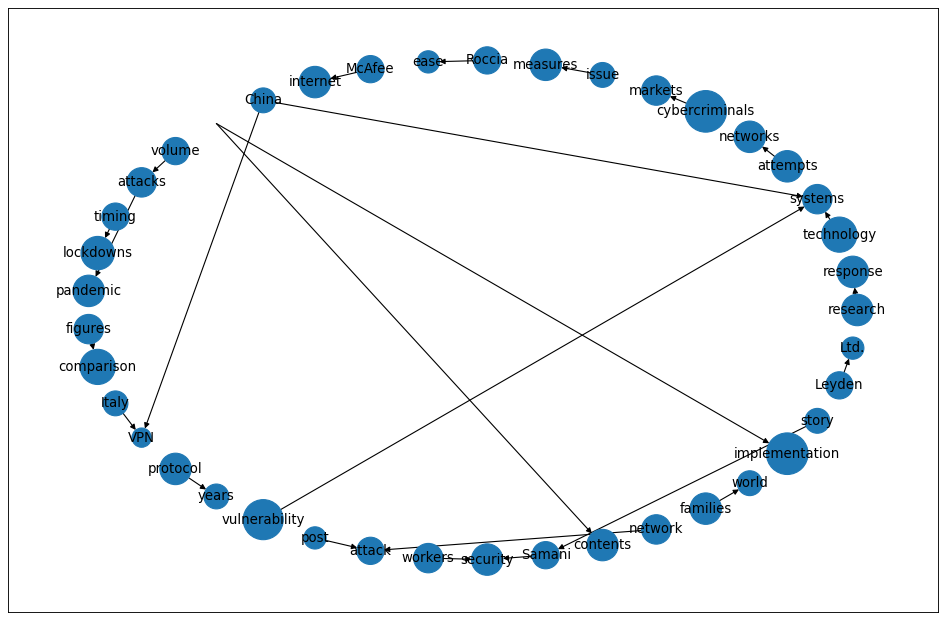

In [122]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

plt.tight_layout()

node_size = [100*len(i) for i in nodes]
pos = nx.circular_layout(graph_ex)
nx.draw_networkx(graph_ex, pos, arrows = True, node_size = node_size, with_labels = True)
plt.savefig("C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/output/dg_ex.png", format="PNG")

plt.show()